In [1]:
import torch
import gpytorch
import numpy as np
import pandas as pd

from bo_functions import ExactGPModel
from bo_functions import test_train_split
from bo_functions import bo_iter
from bo_functions import bo_iter_w_runs
from bo_functions import find_train_doc_path
from datetime import datetime

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#Set Date and Time
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print("Date and Time: ", timestampStr)
# DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M-%S%p")
DateTime = None ##For Testing

#Set Parameters
Theta_True = np.array([1,-1])
BO_iters = 3
train_iter = 300
noise_std = 0.1
runs = 3
explore_bias = torch.tensor([1])
shuffle_seed = 9
set_lengthscale = np.array([None])
emulator = False
sparse_grid = False
verbose = True
save_fig = False

#Pull Experimental data from CSV
exp_data_doc = 'Input_CSVs/Exp_Data/n=5.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays

Date and Time:  22-Aug-2022 (13:29:37)


Runs: 3
BO Iters: 3
------------------------------
Lengthscale Set To: [None]
Explore Bias: tensor(1)
Run Number:  1


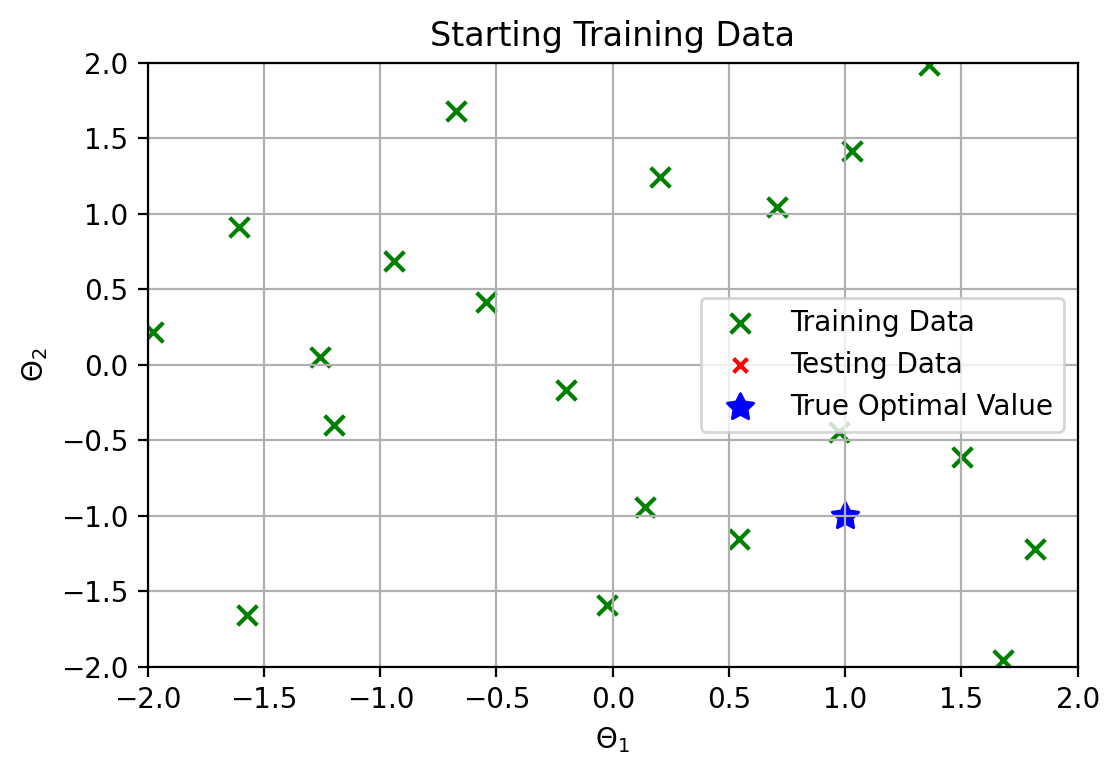

BO Iteration =  1
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 1.03637291 -1.71409254]
Argmax Theta Best =  [ 0.94736842 -1.78947368]
Scipy Theta Opt =  [ 1.03694711 -1.70442803]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.78947368]
EI_max = 0.47918430711214455 



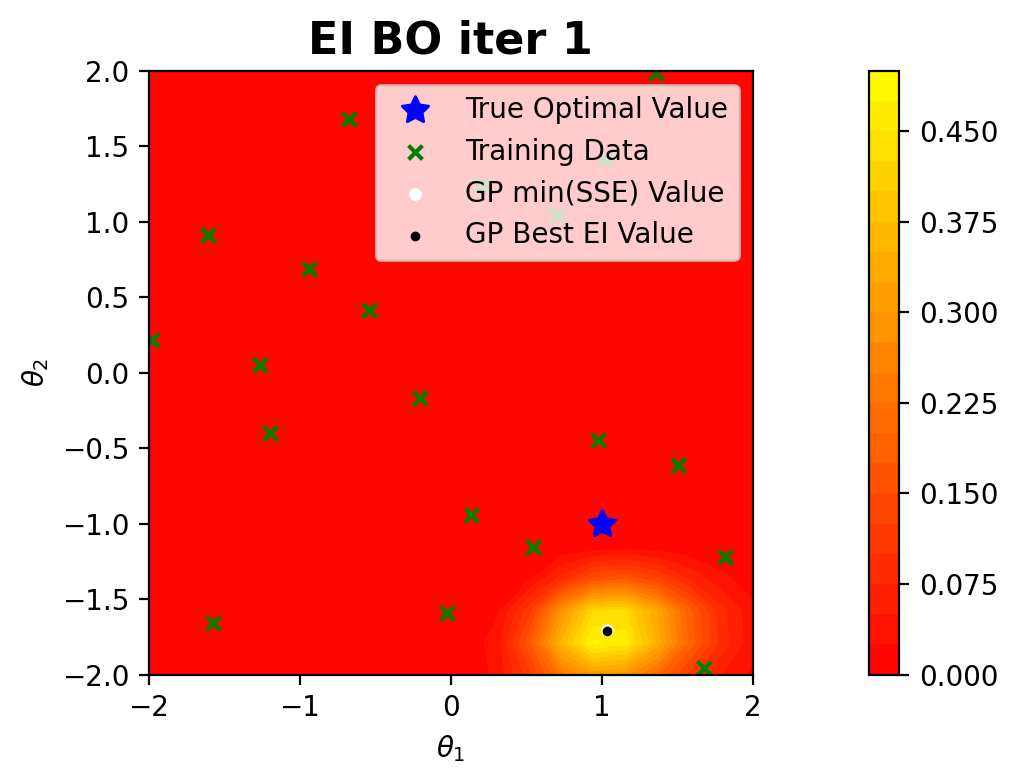

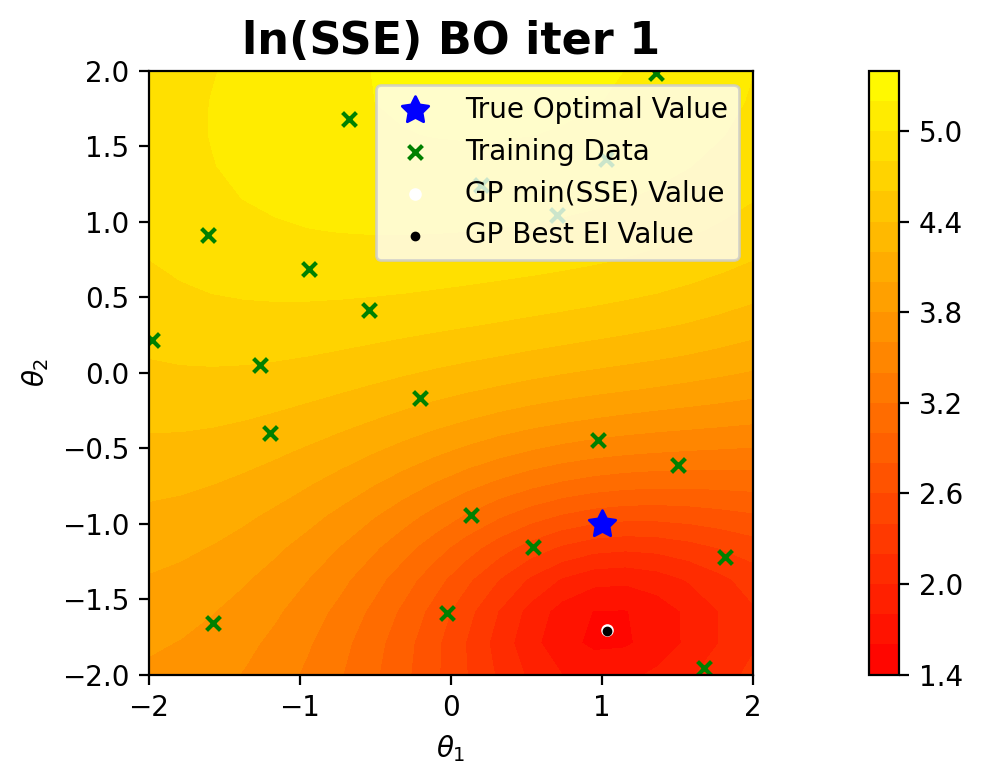

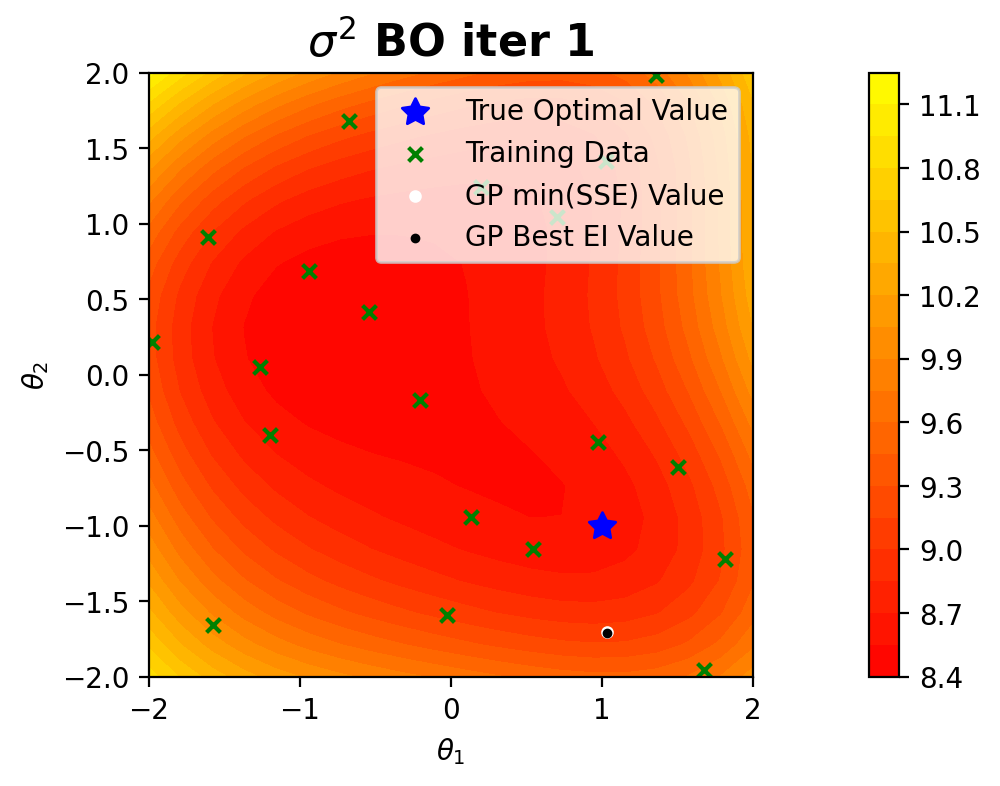

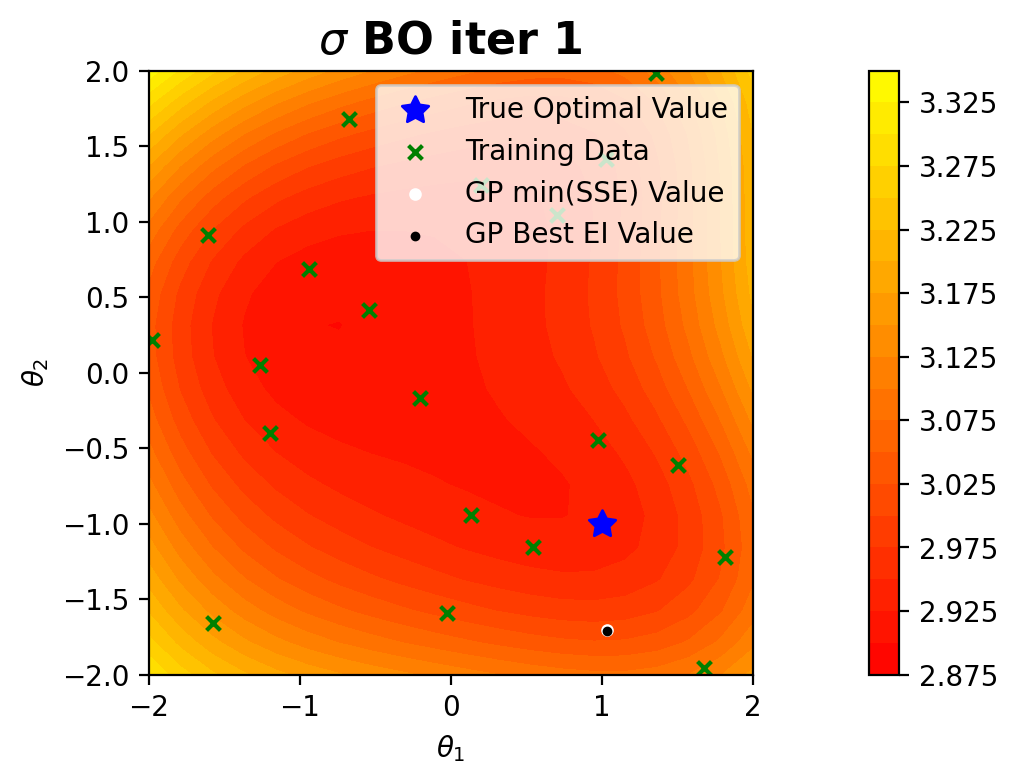

Best Error is: 2.8225


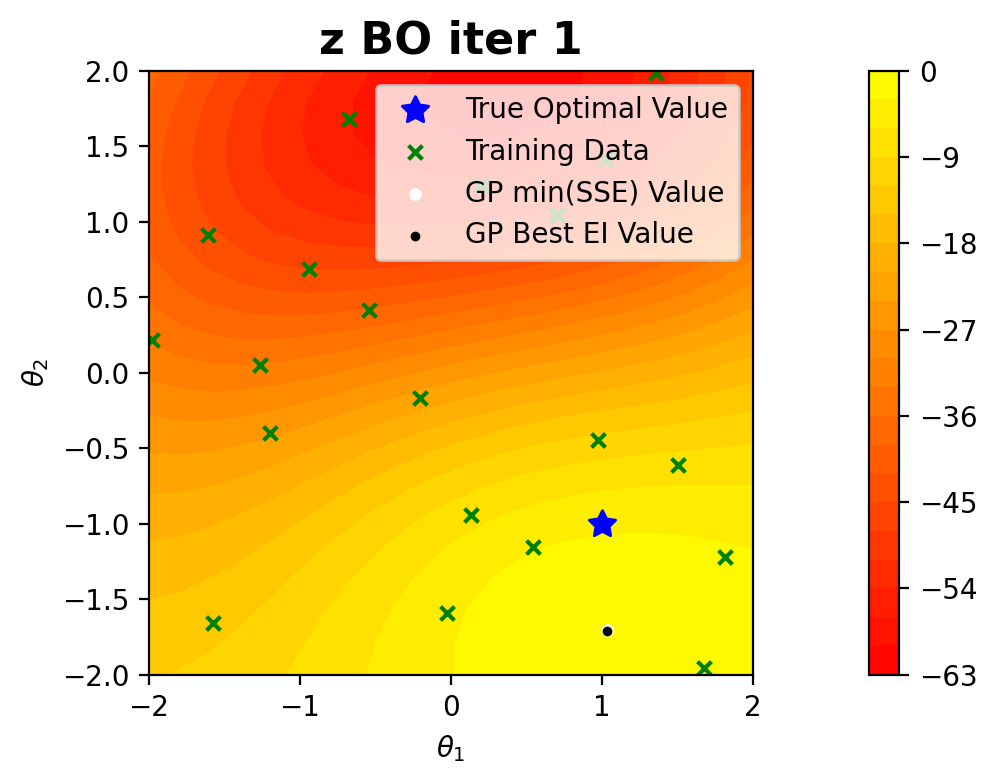

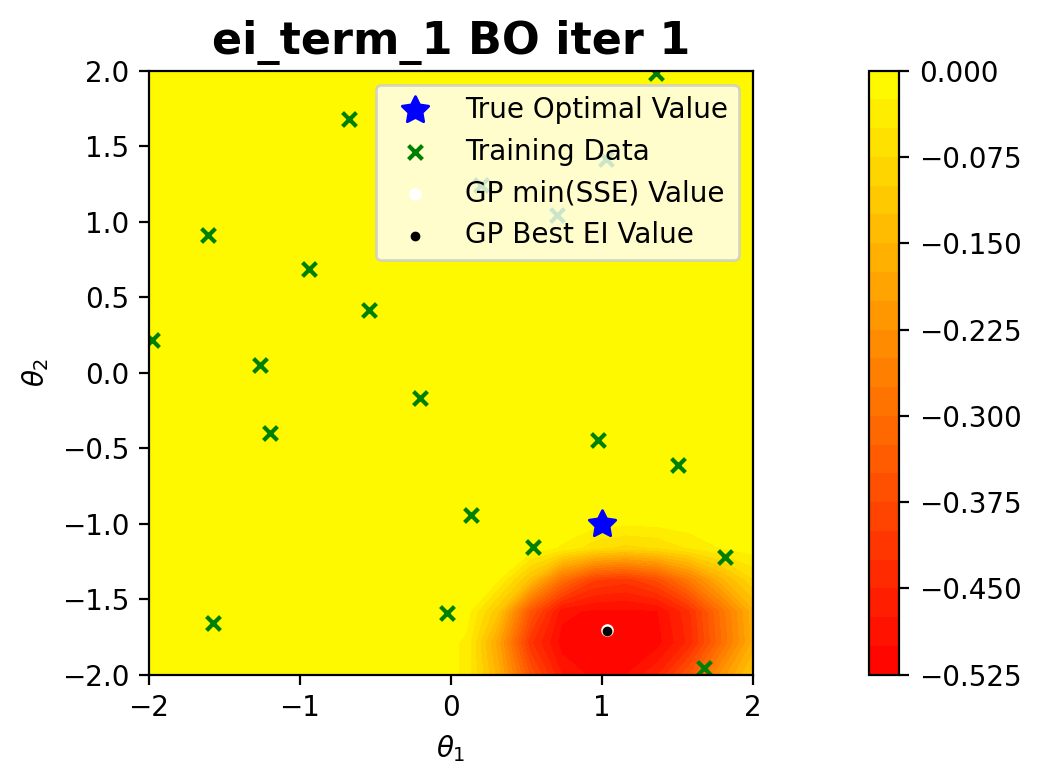

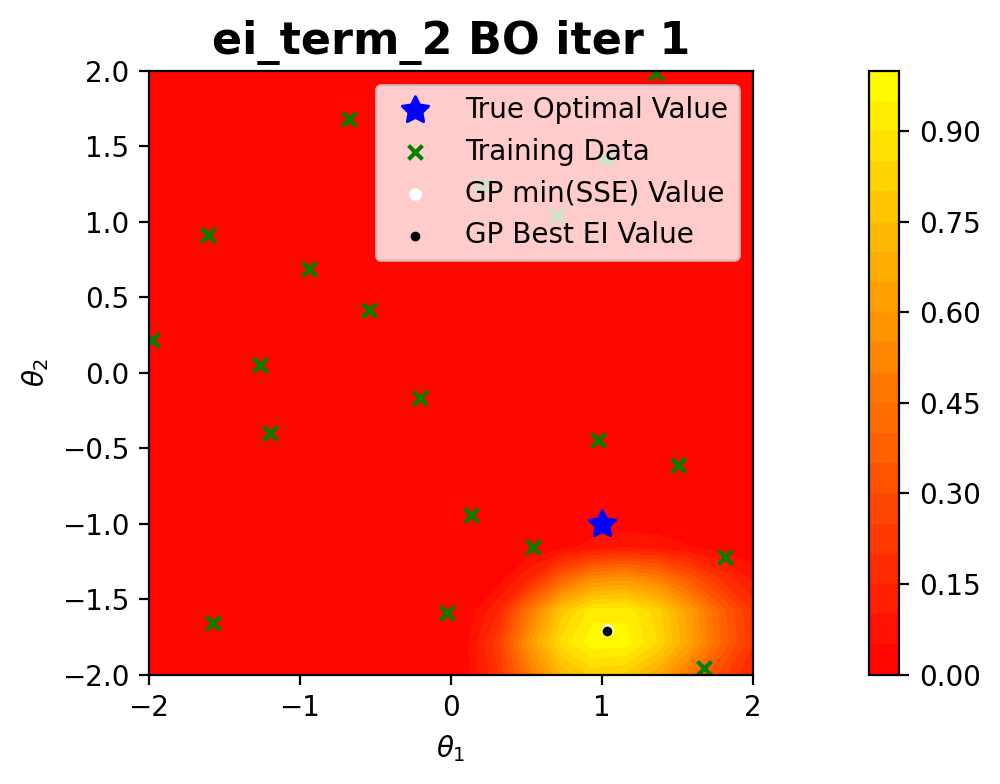

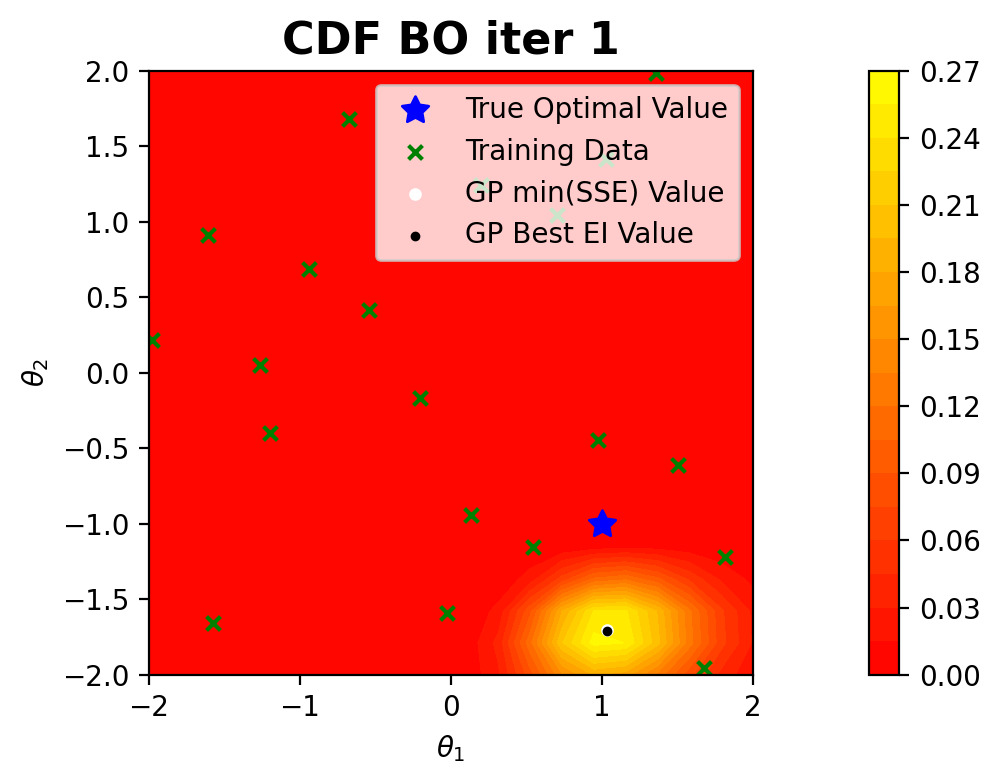

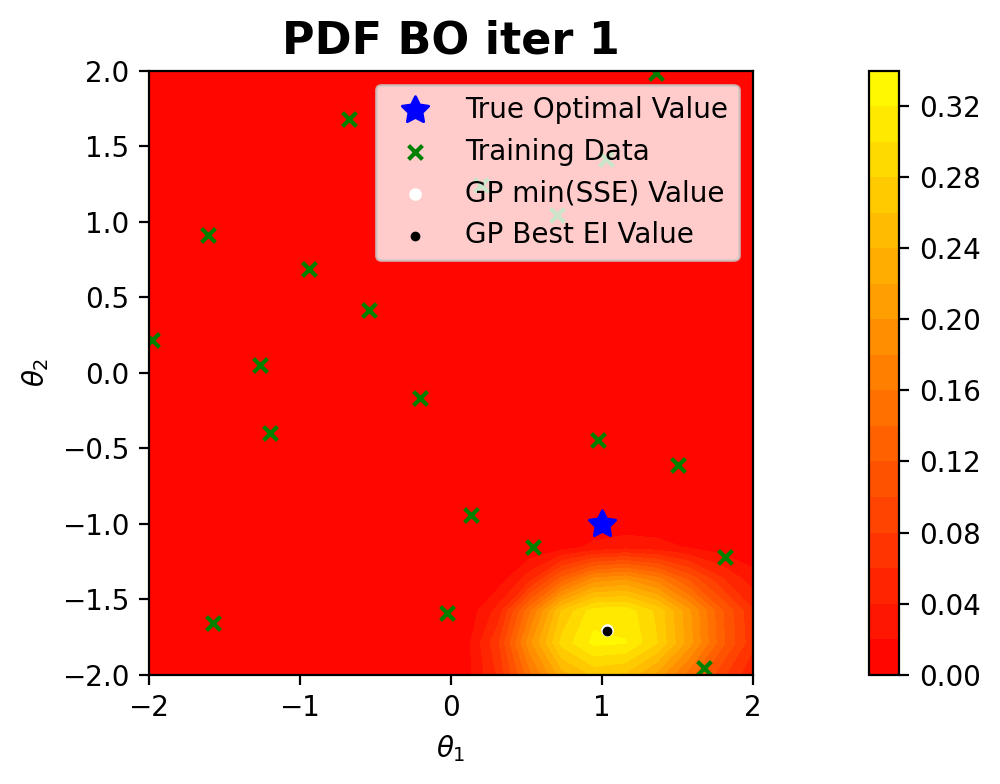

Magnitude of ln(SSE) given Theta_Opt =  [ 1.03694711 -1.70442803] is 2.8172e+00
BO Iteration =  2
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 1.03475305 -1.66995141]
Argmax Theta Best =  [ 1.15789474 -1.57894737]
Scipy Theta Opt =  [ 1.03531909 -1.65881425]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.57894737]
EI_max = 0.09860037213884915 



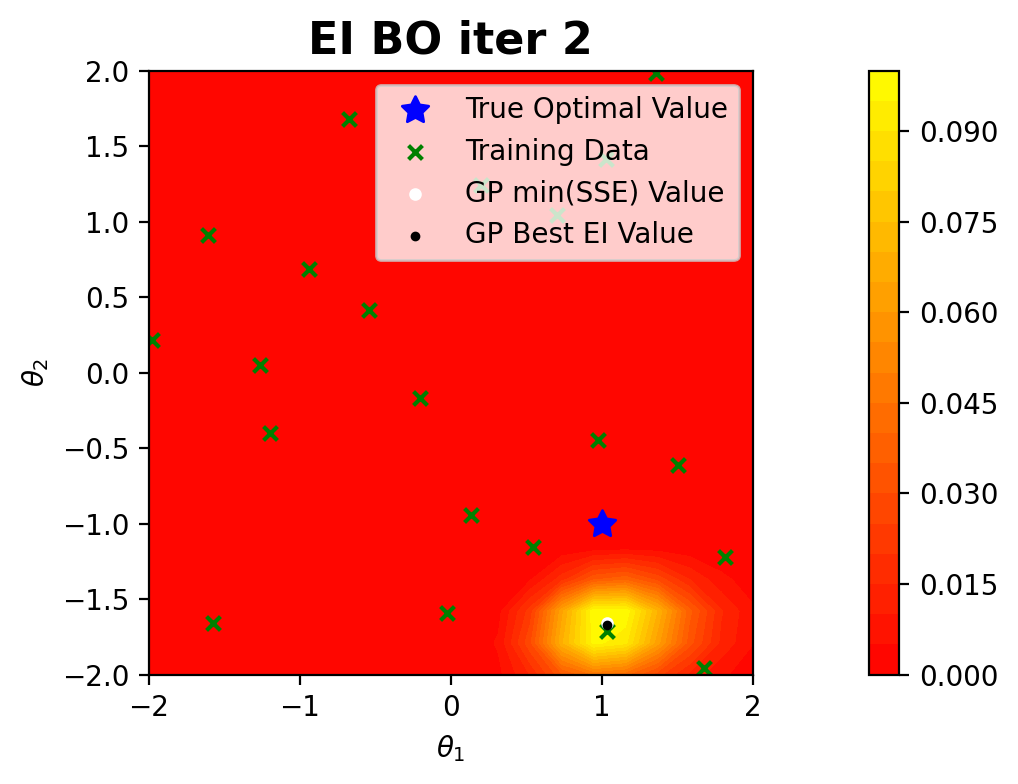

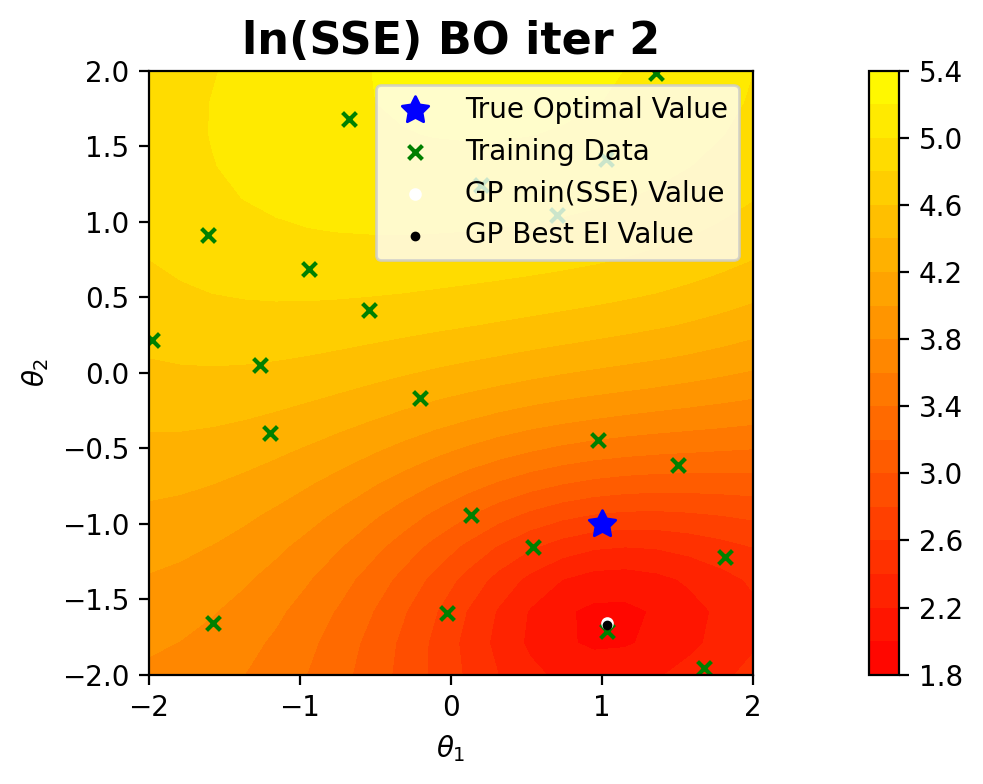

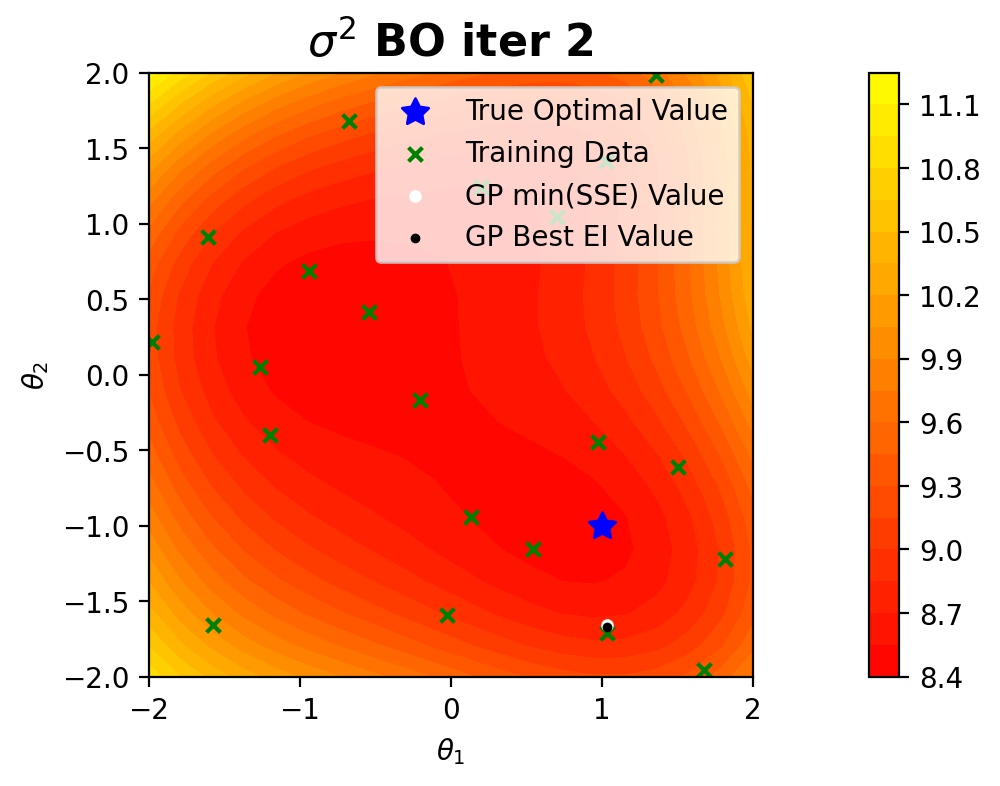

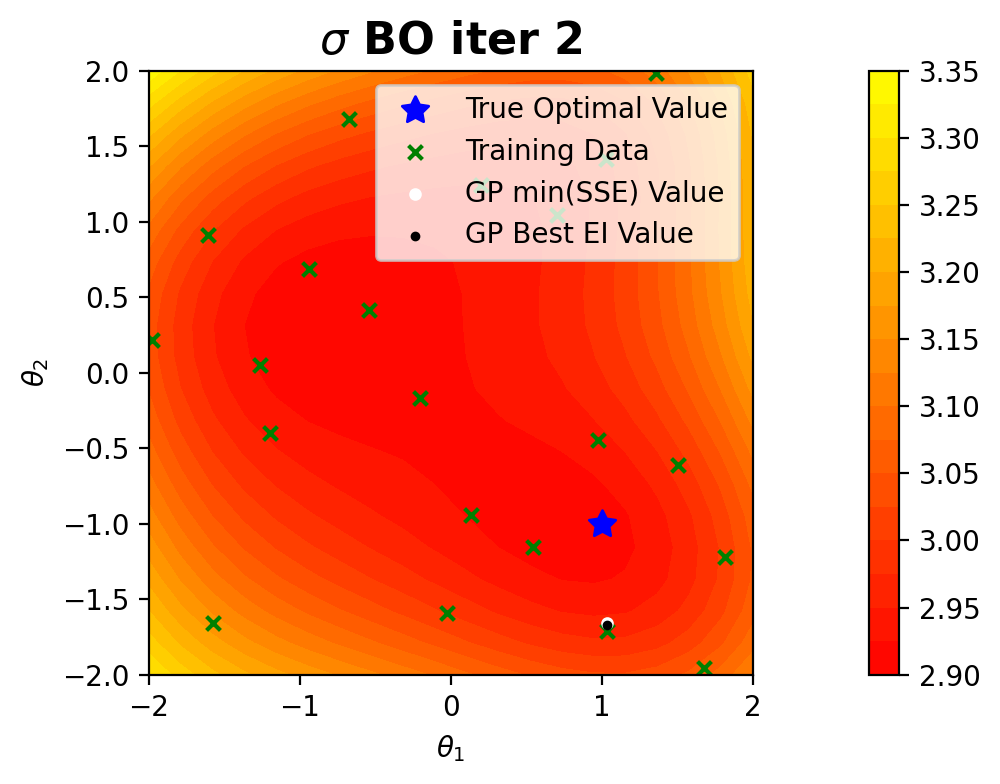

Best Error is: 2.8225


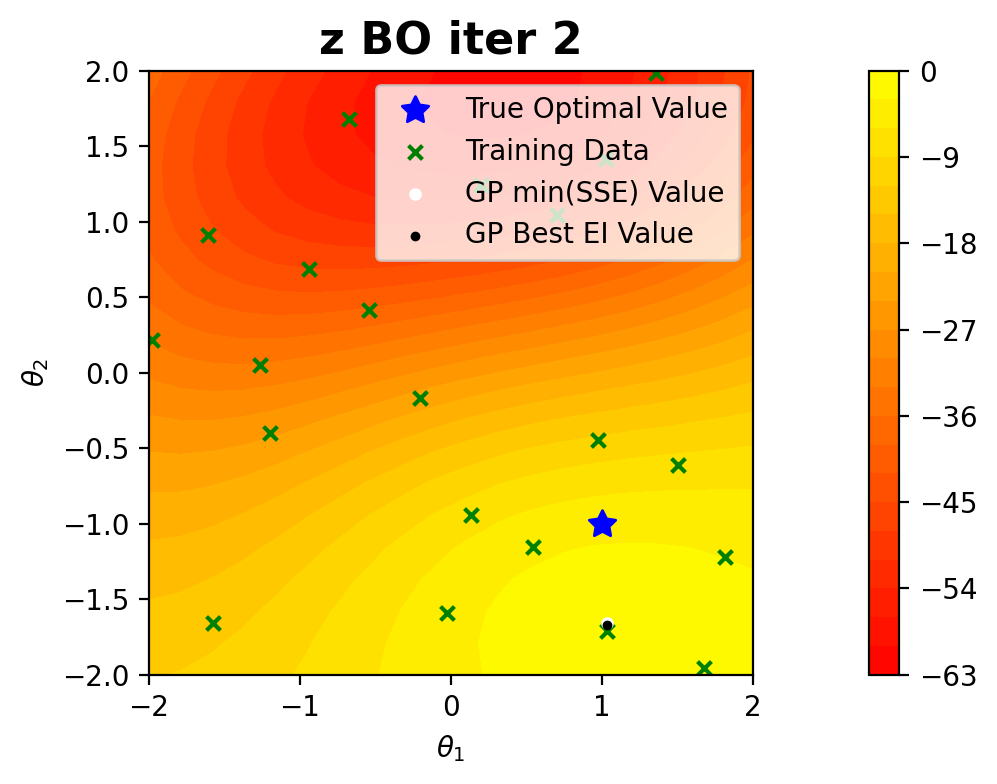

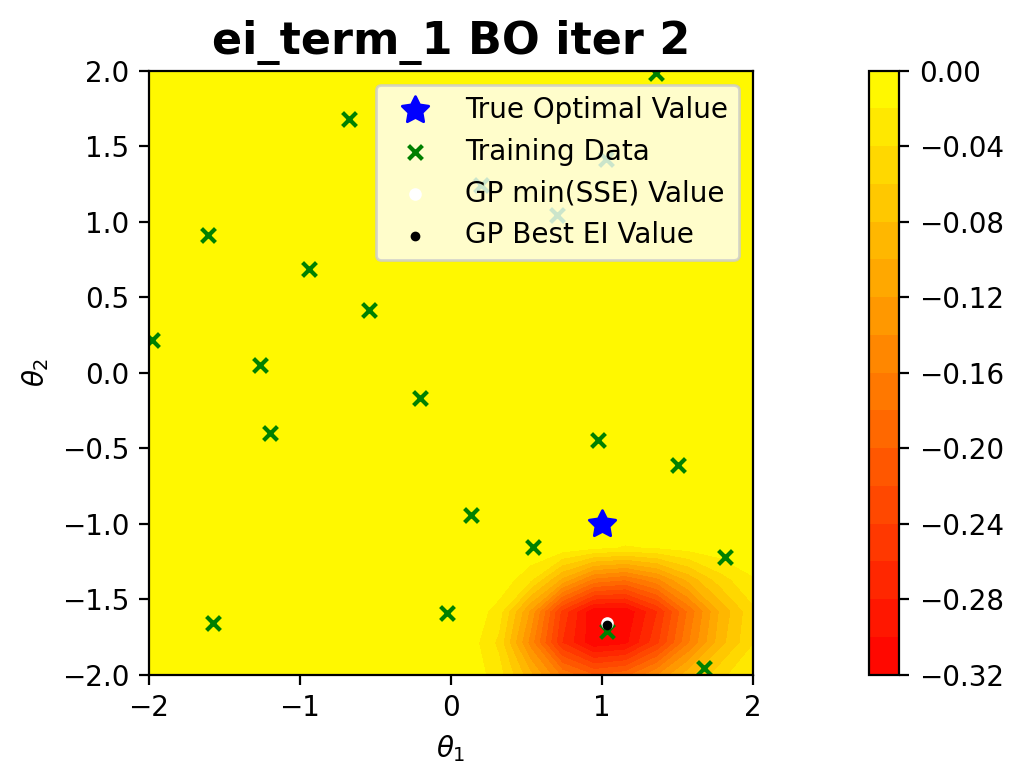

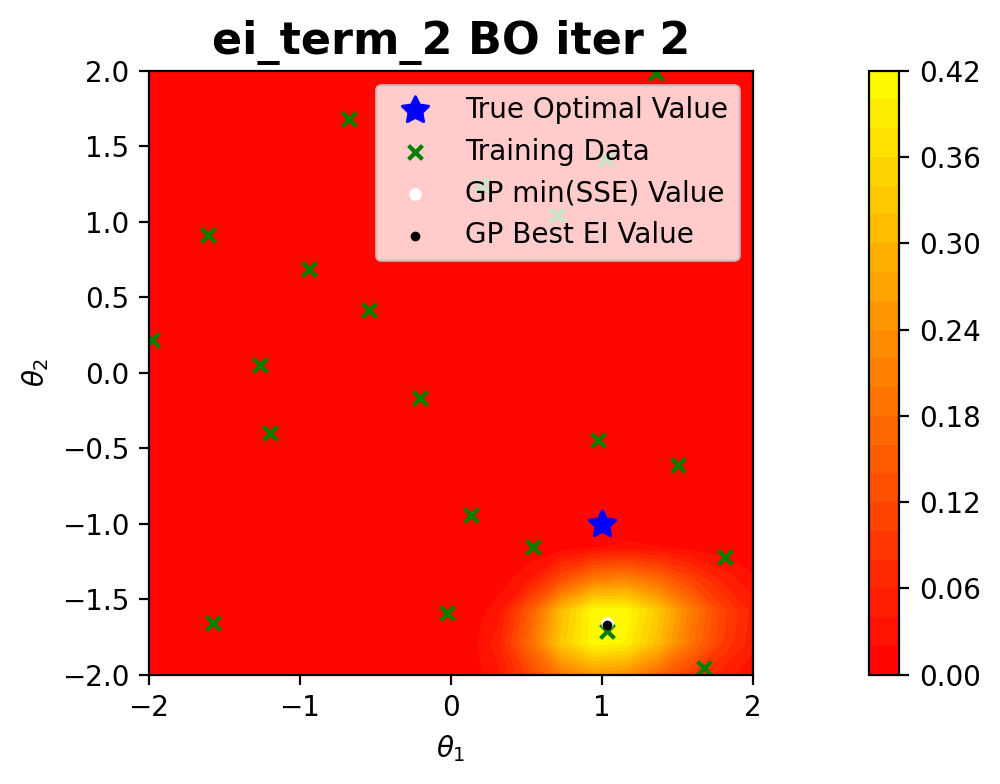

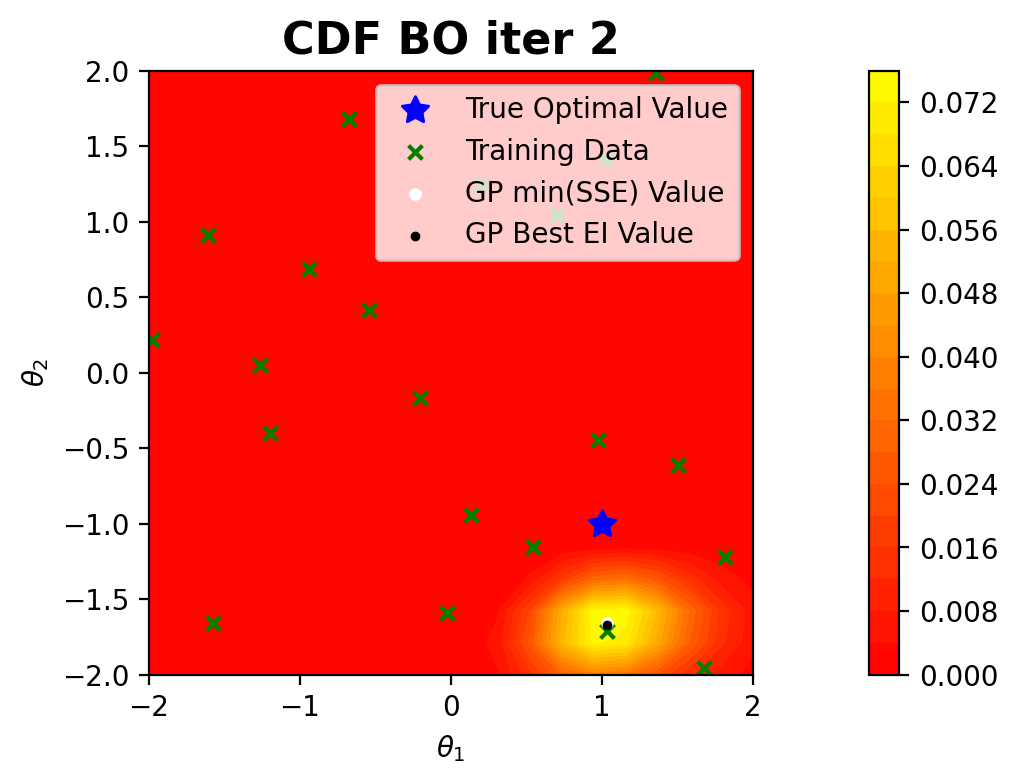

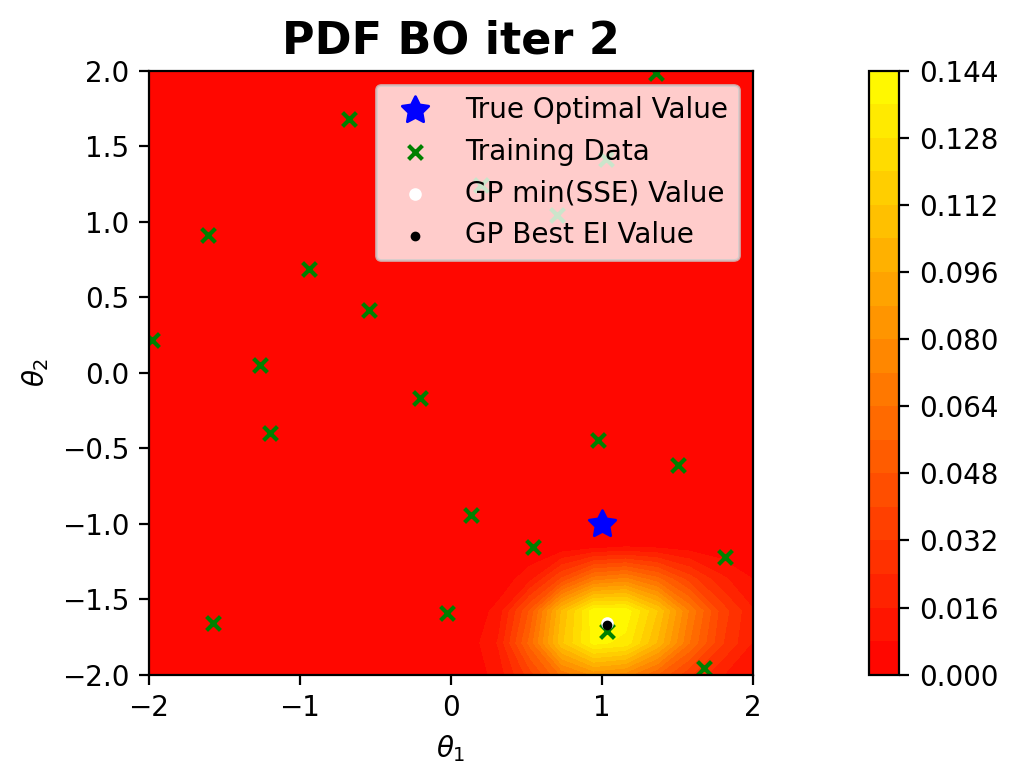

Magnitude of ln(SSE) given Theta_Opt =  [ 1.03531909 -1.65881425] is 2.6827e+00
BO Iteration =  3
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 1.03359819 -1.64635028]
Argmax Theta Best =  [ 0.94736842 -1.57894737]
Scipy Theta Opt =  [ 1.03404982 -1.63552934]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.57894737]
EI_max = 0.03570383140339439 



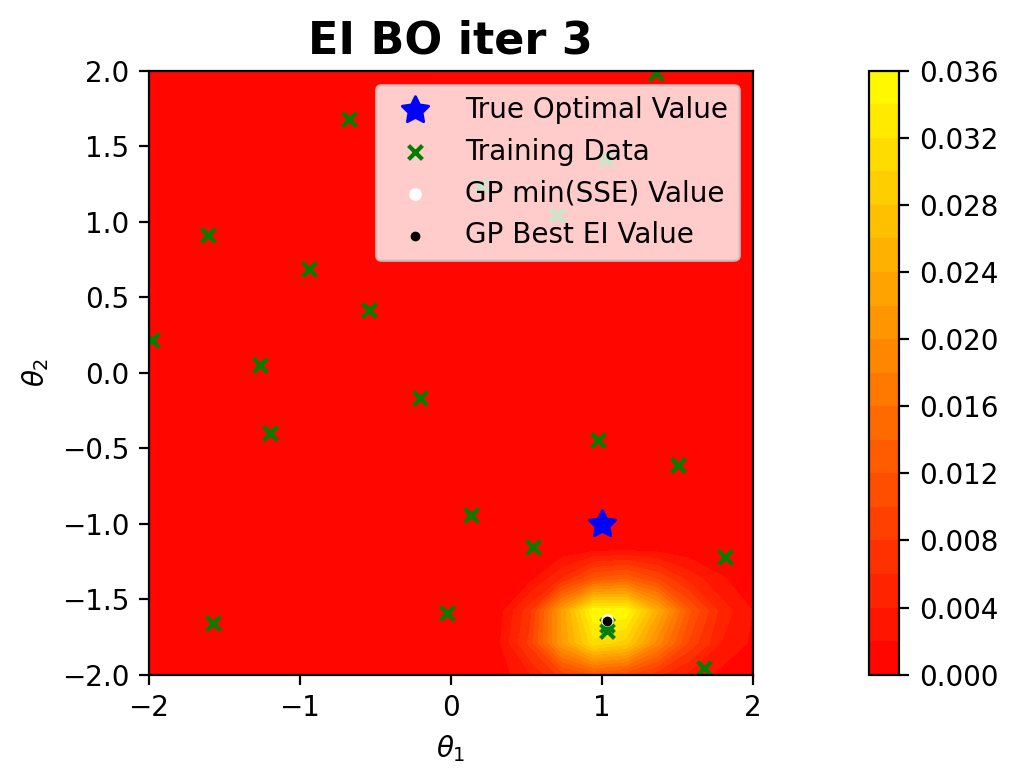

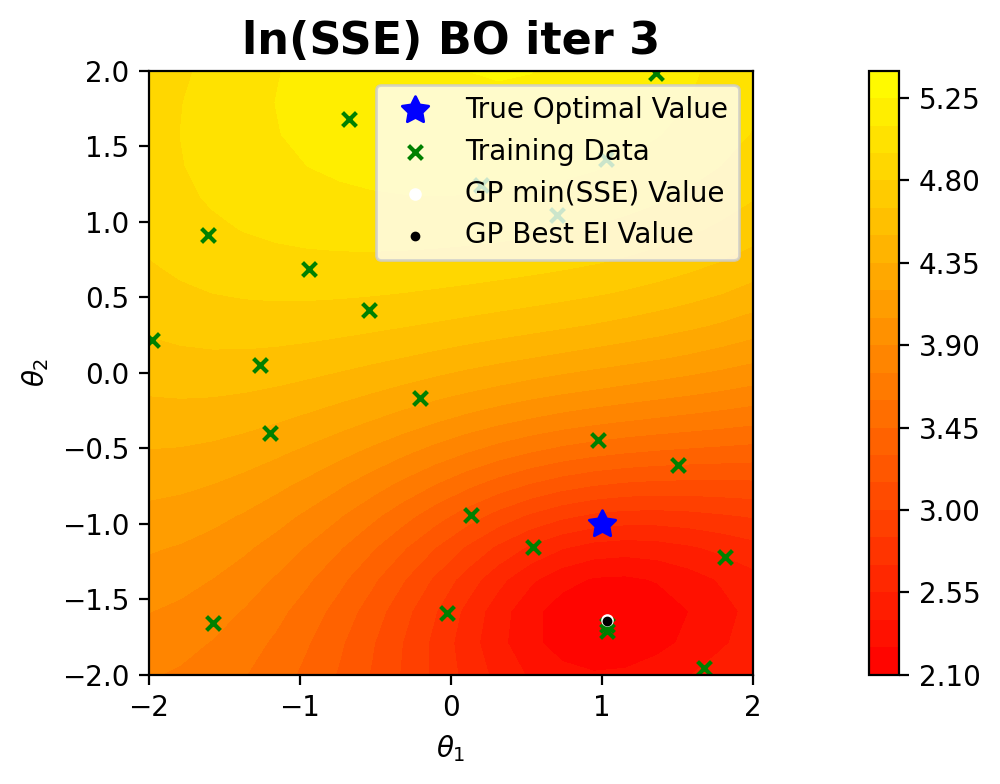

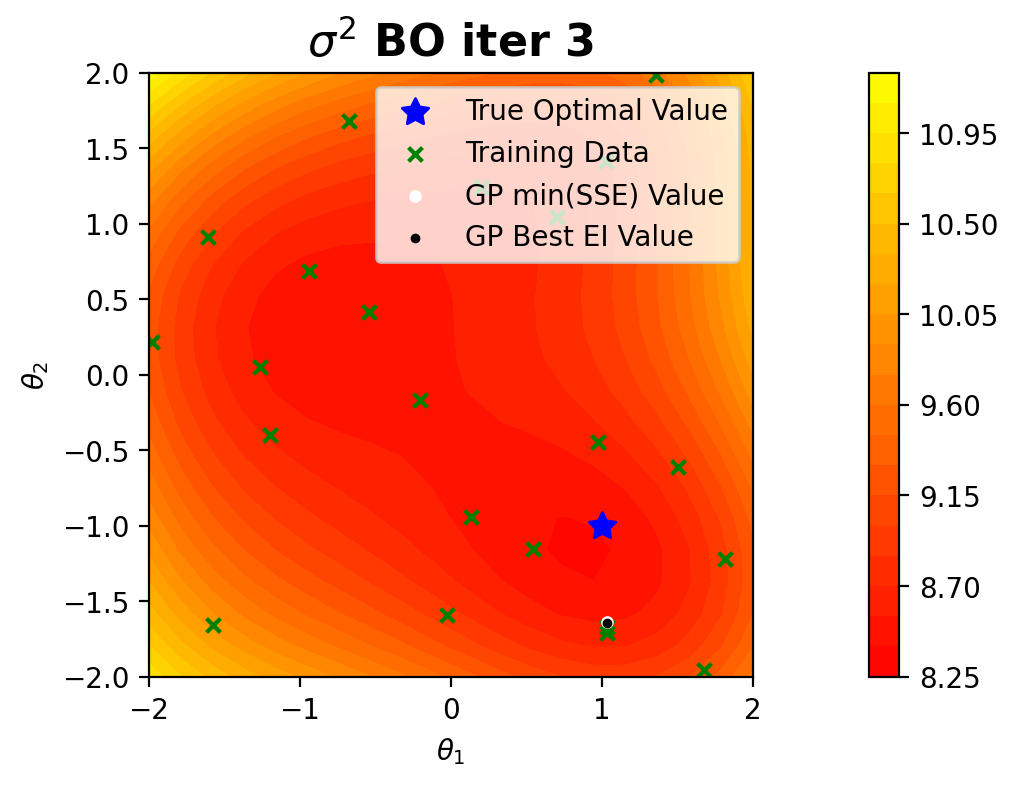

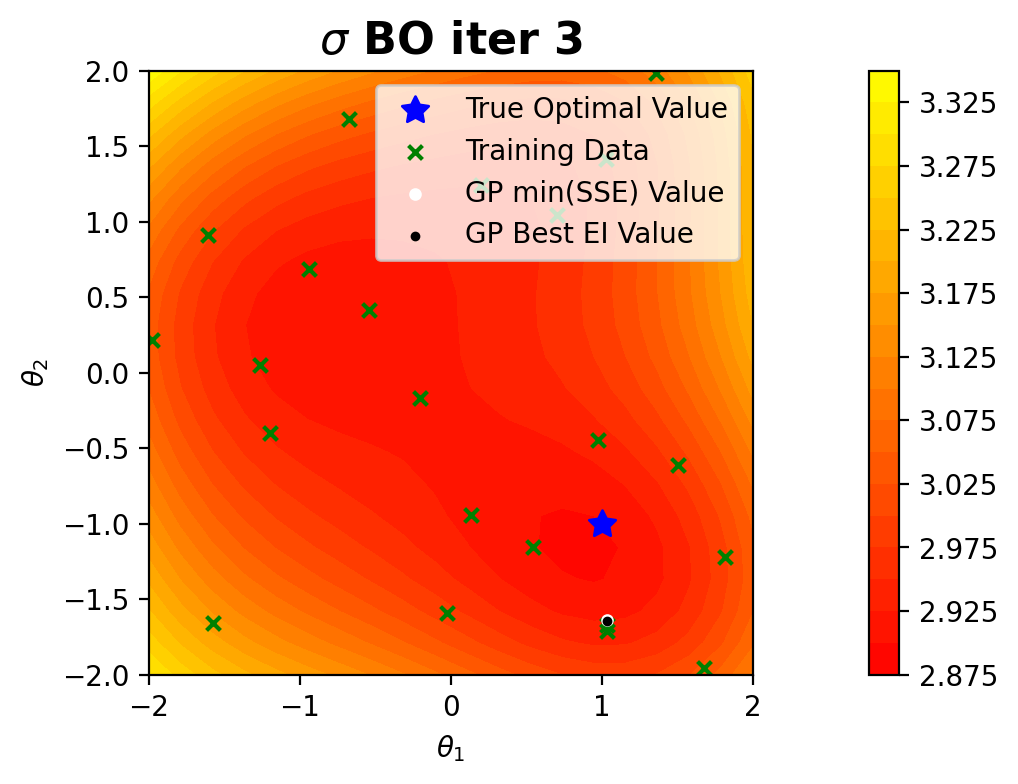

Best Error is: 2.8225


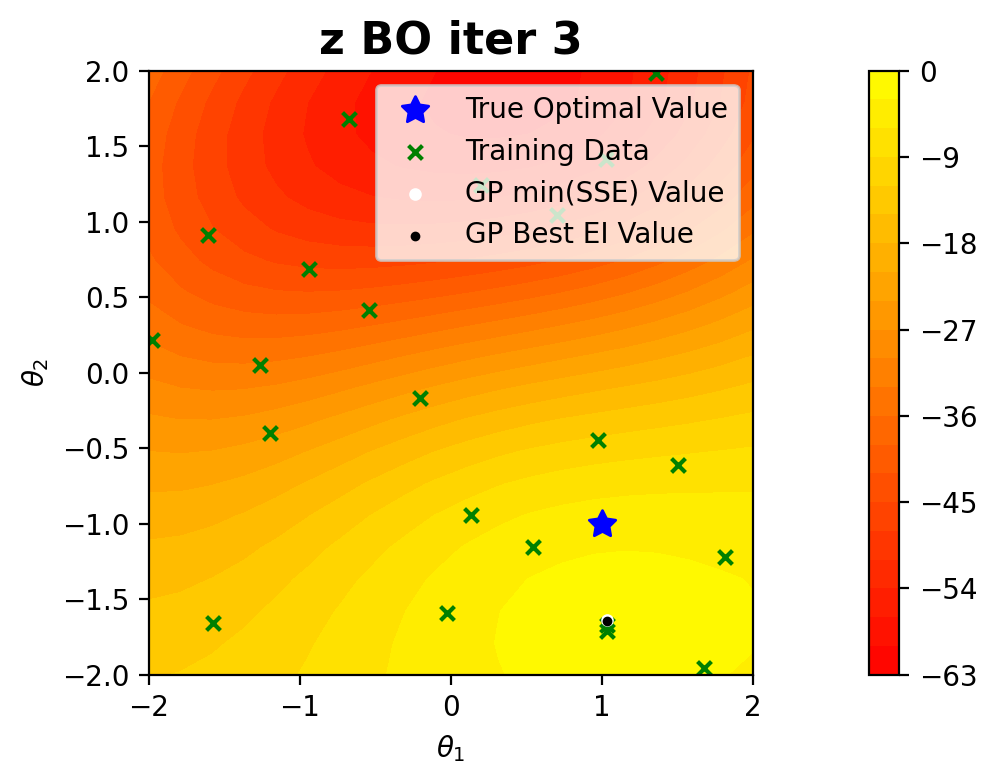

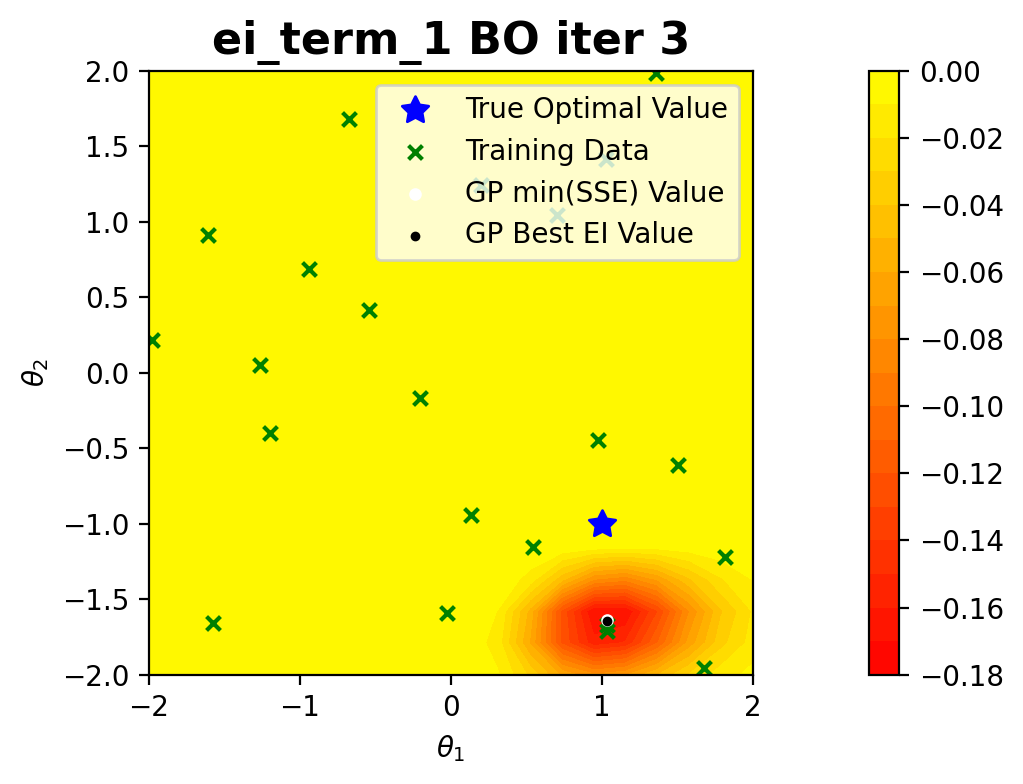

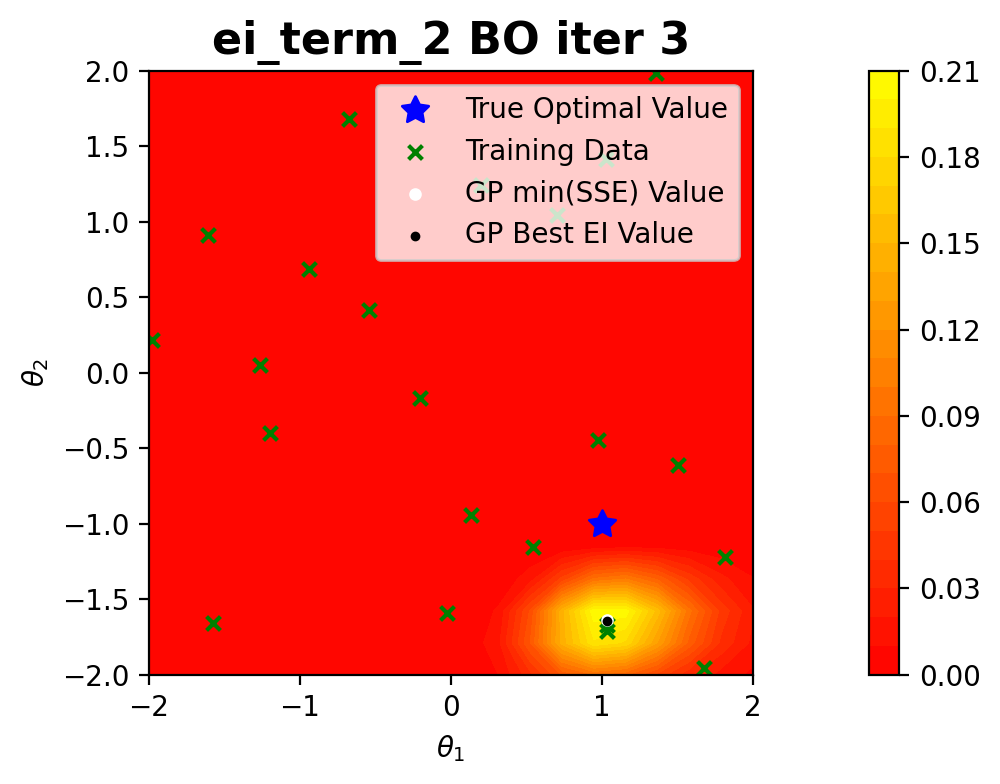

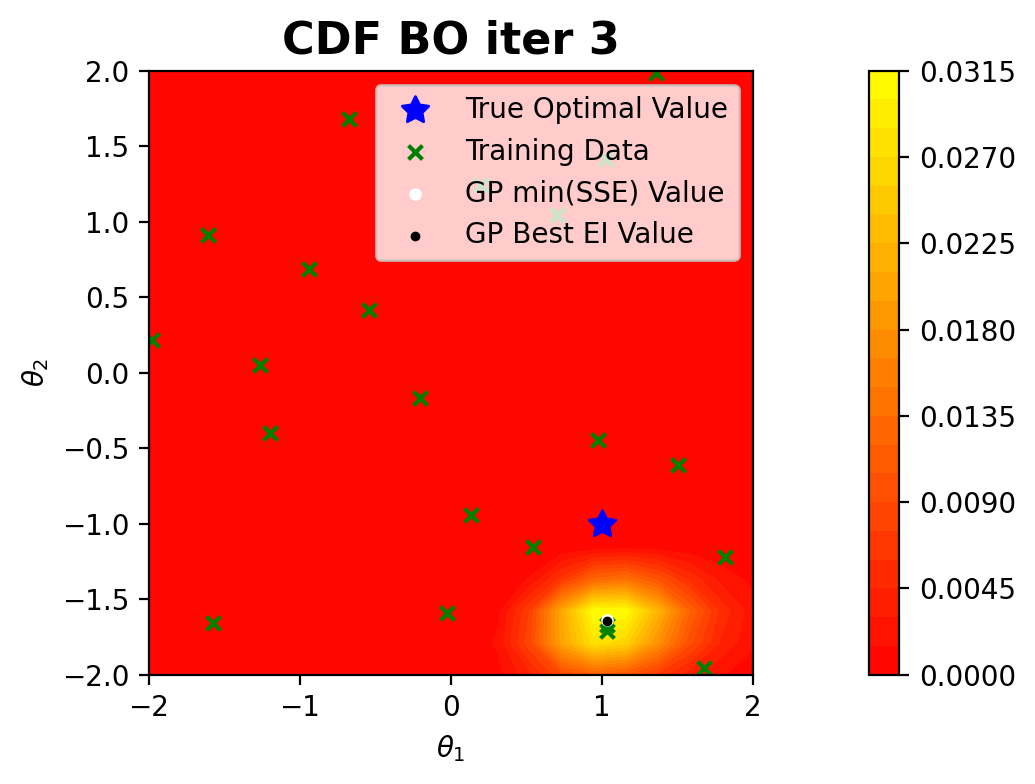

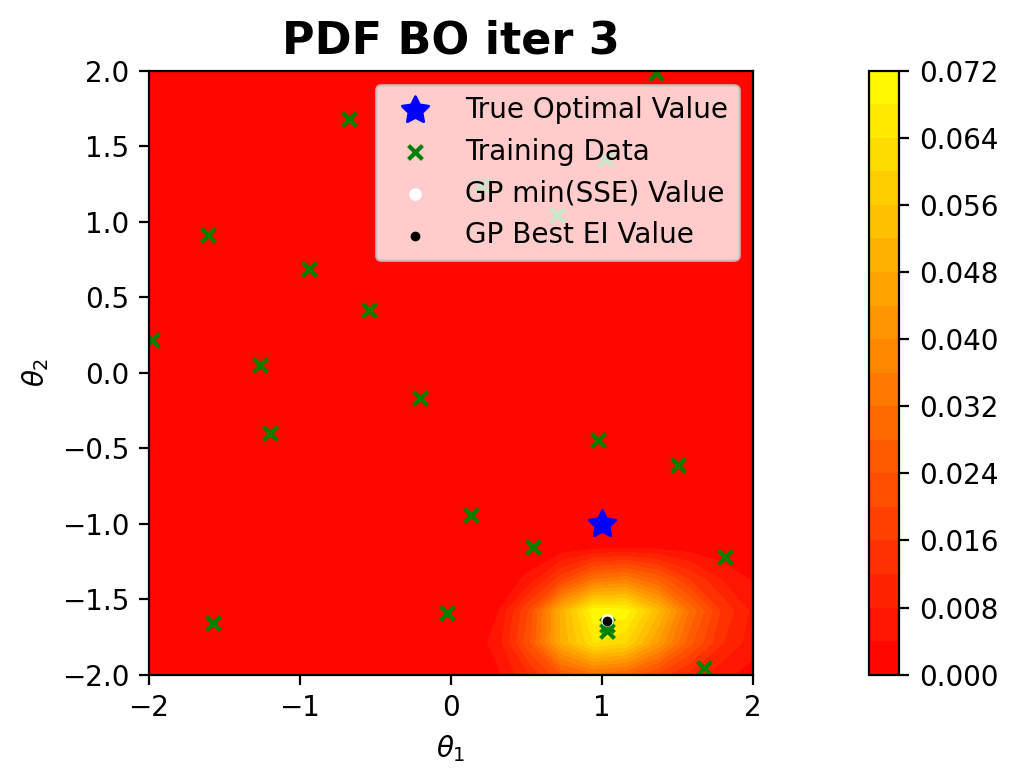

Magnitude of ln(SSE) given Theta_Opt =  [ 1.03404982 -1.63552934] is 2.6104e+00
Run Number:  2


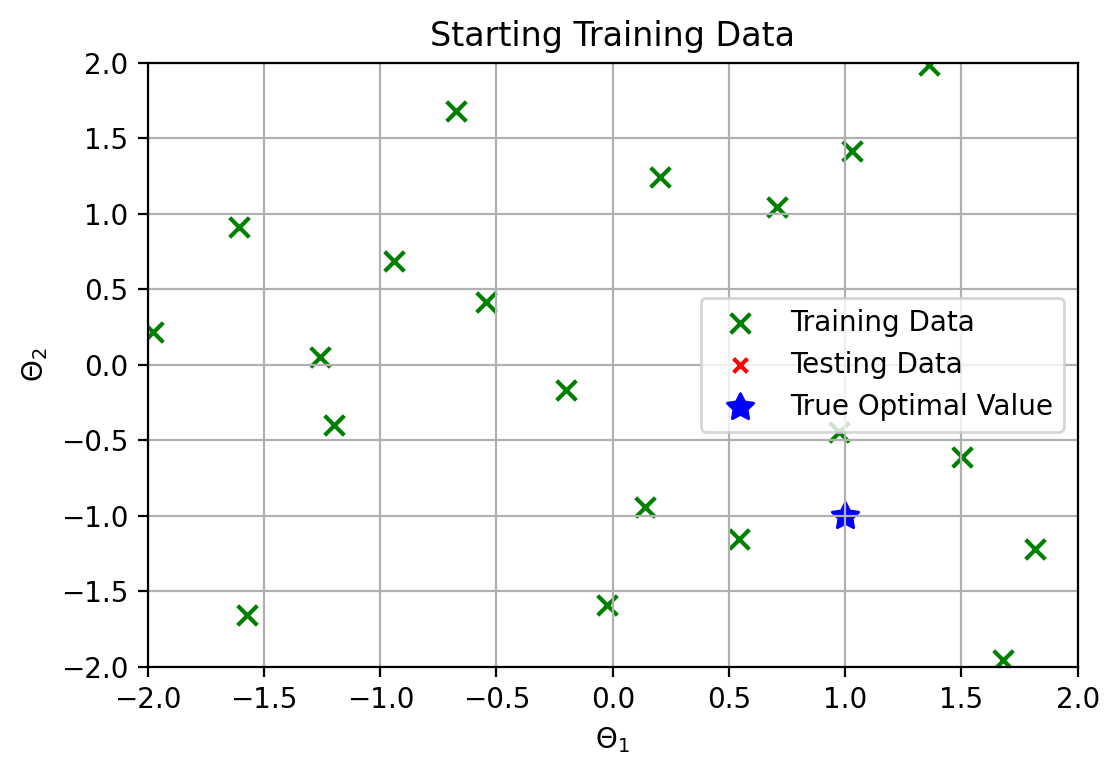

BO Iteration =  1
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 1.03637289 -1.71409251]
Argmax Theta Best =  [ 0.94736842 -1.78947368]
Scipy Theta Opt =  [ 1.03694709 -1.70442809]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.78947368]
EI_max = 0.4791843071121431 



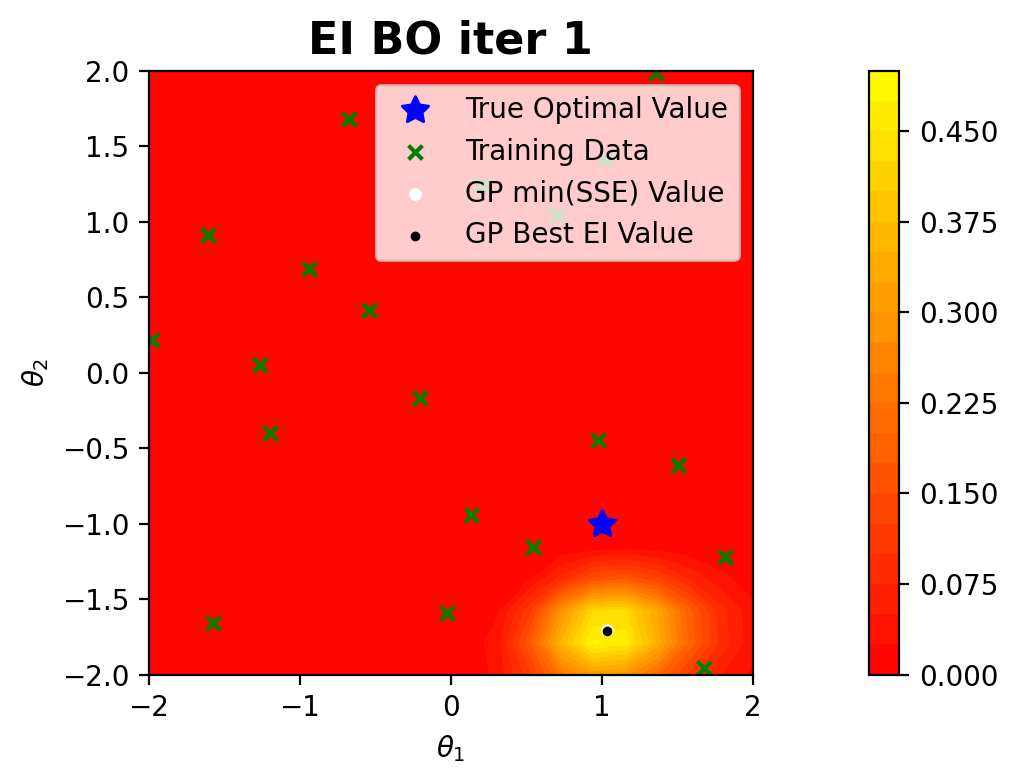

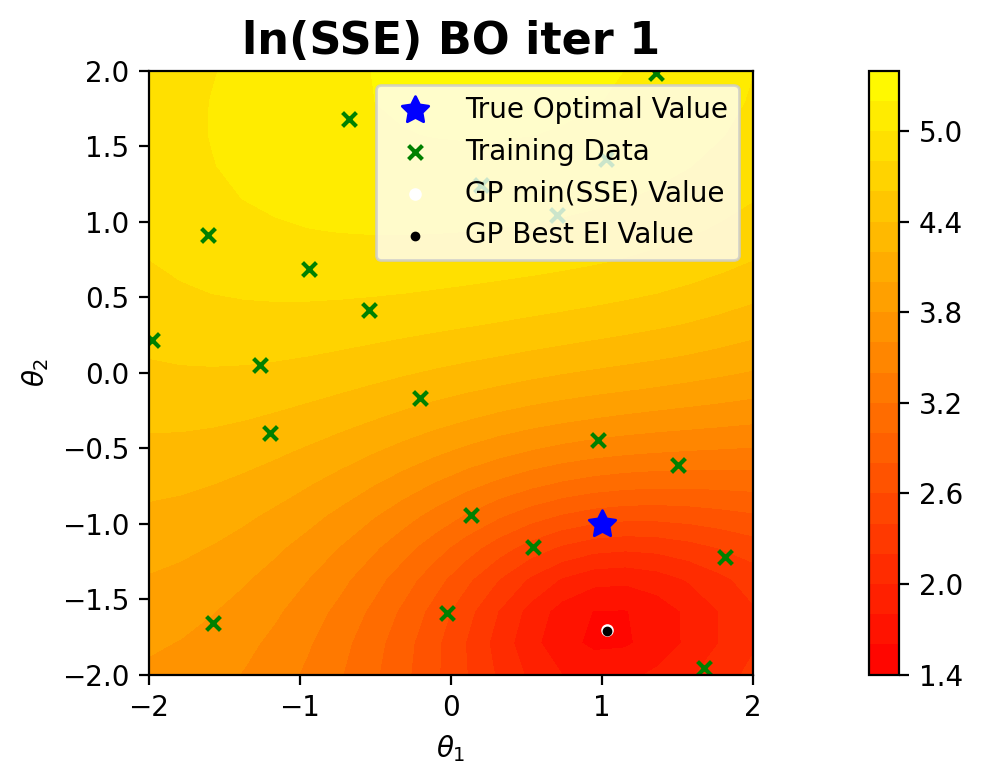

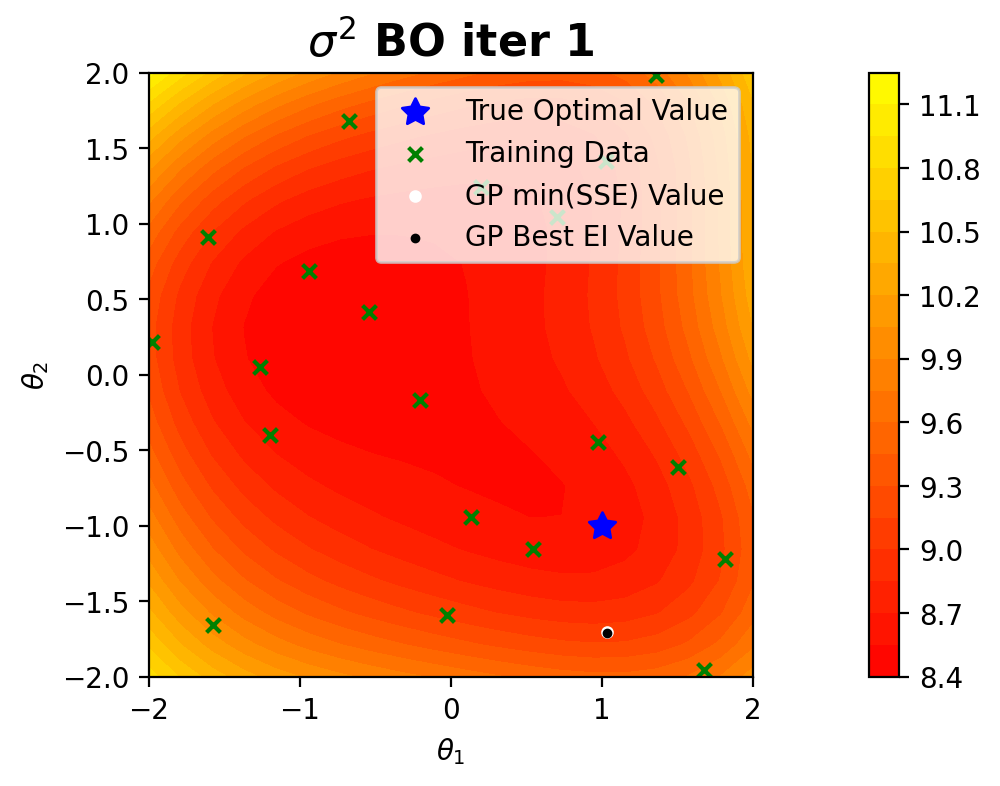

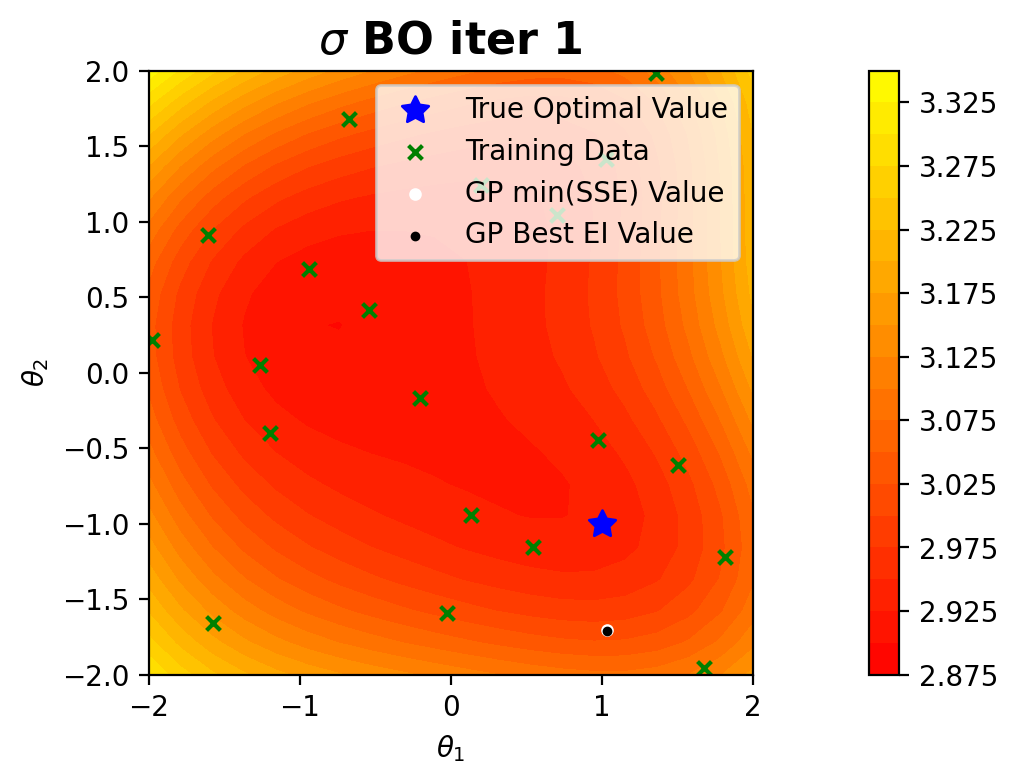

Best Error is: 2.8225


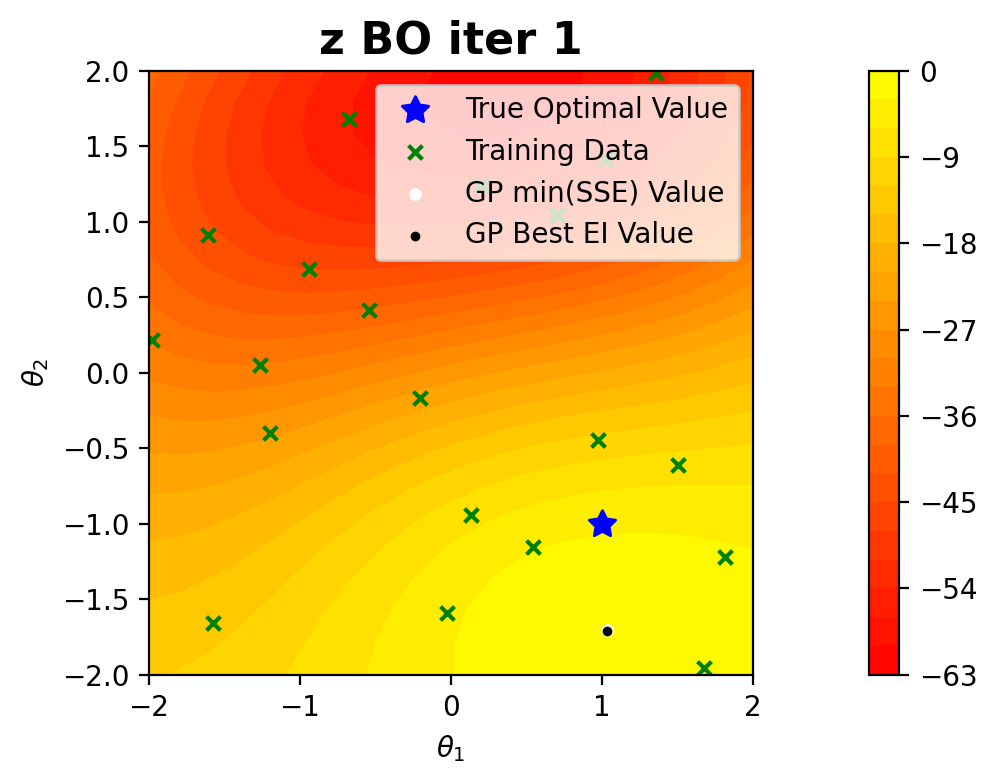

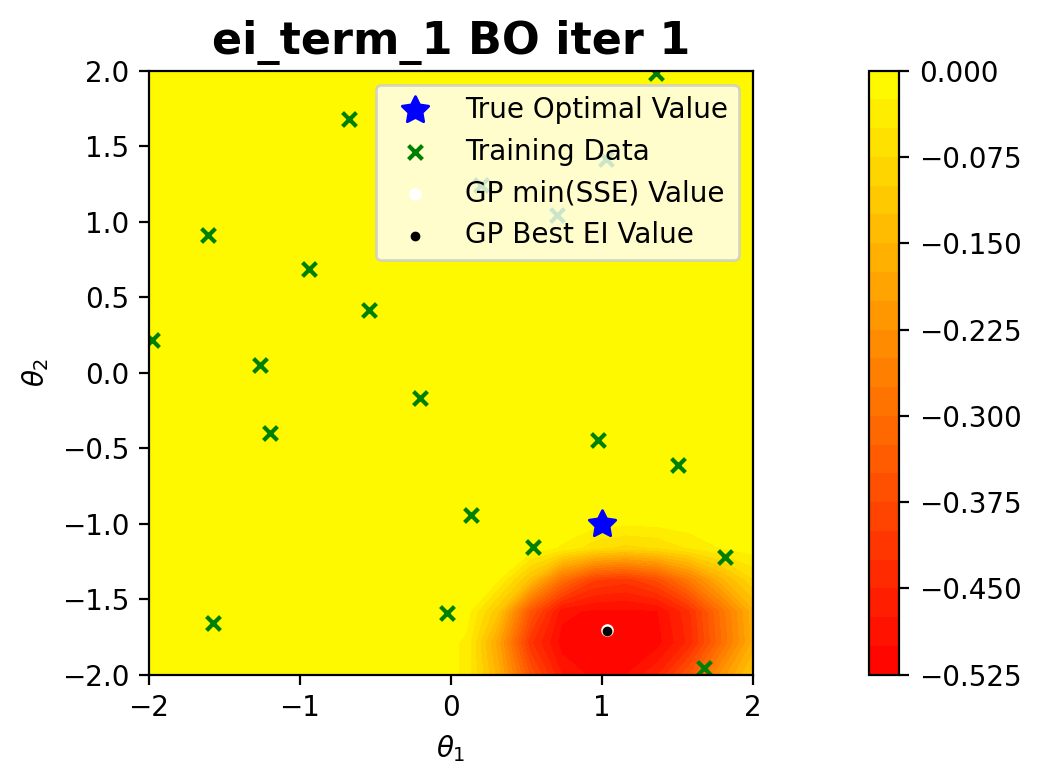

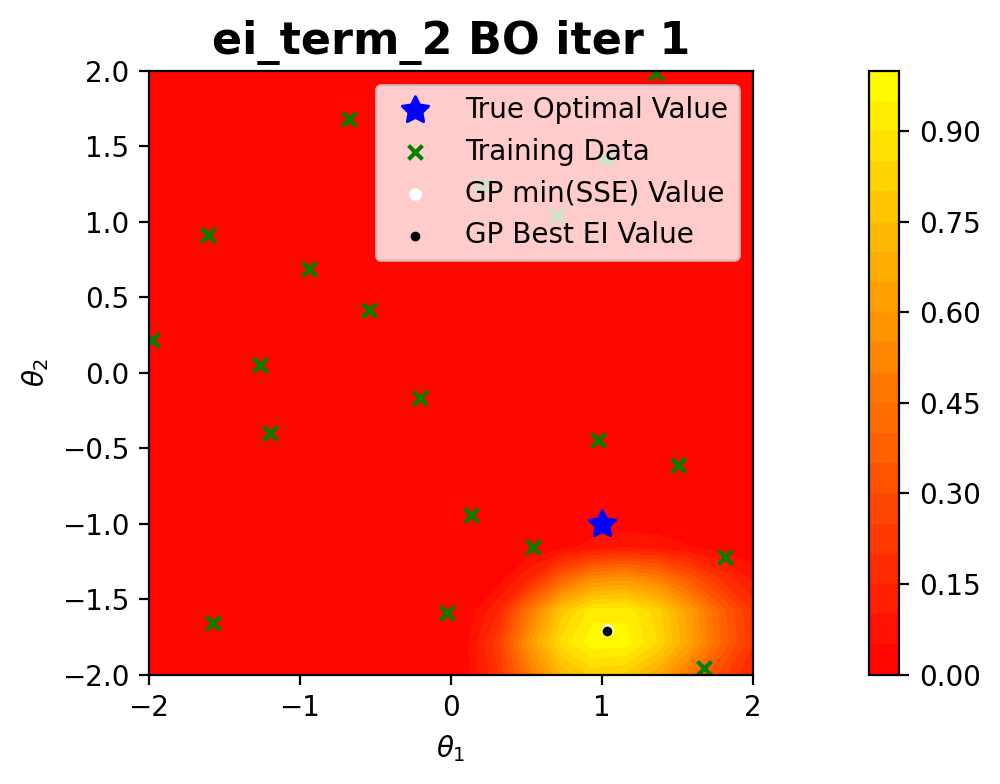

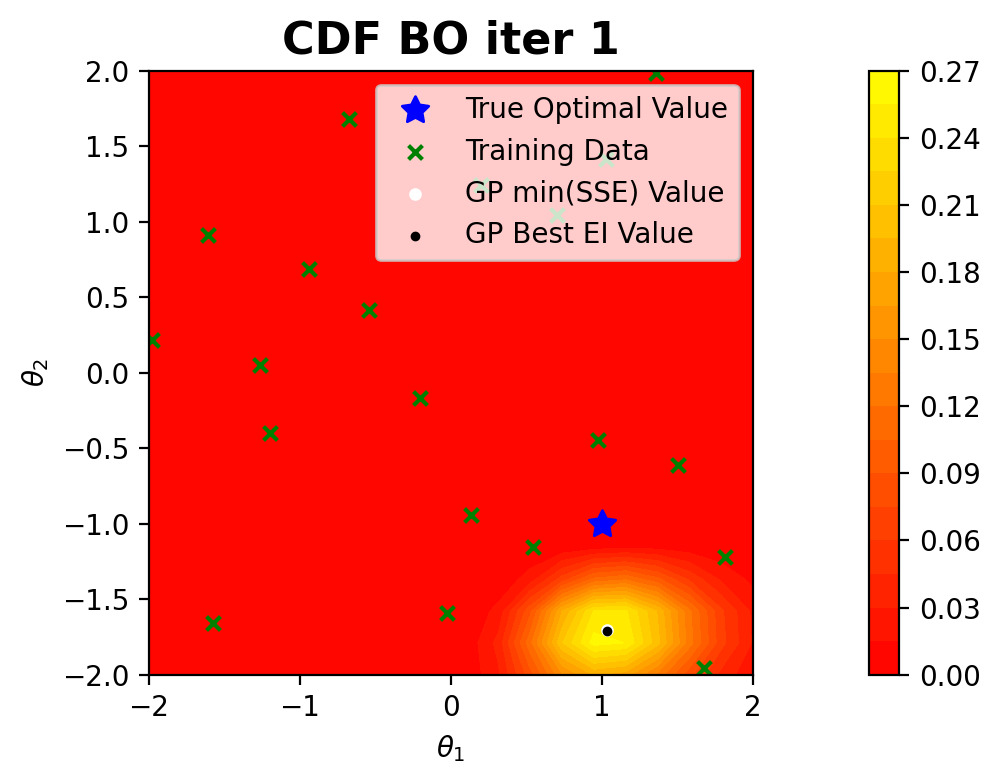

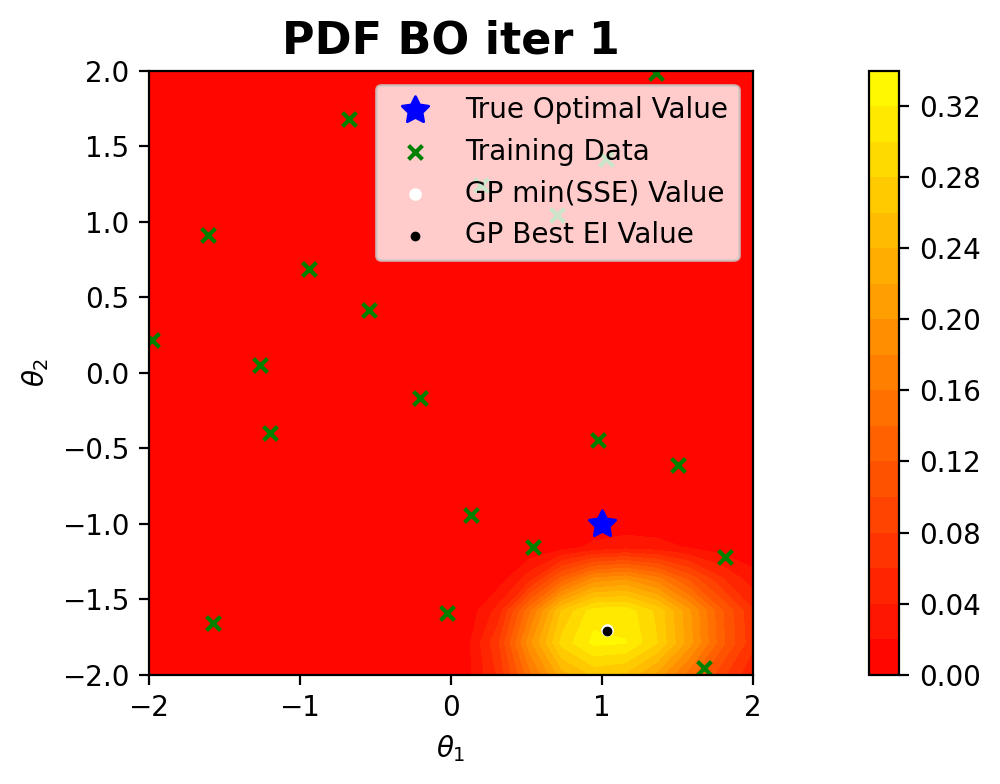

Magnitude of ln(SSE) given Theta_Opt =  [ 1.03694709 -1.70442809] is 2.8172e+00
BO Iteration =  2
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 1.03475311 -1.66995134]
Argmax Theta Best =  [ 1.15789474 -1.57894737]
Scipy Theta Opt =  [ 1.03531883 -1.65881434]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.57894737]
EI_max = 0.09860039395611686 



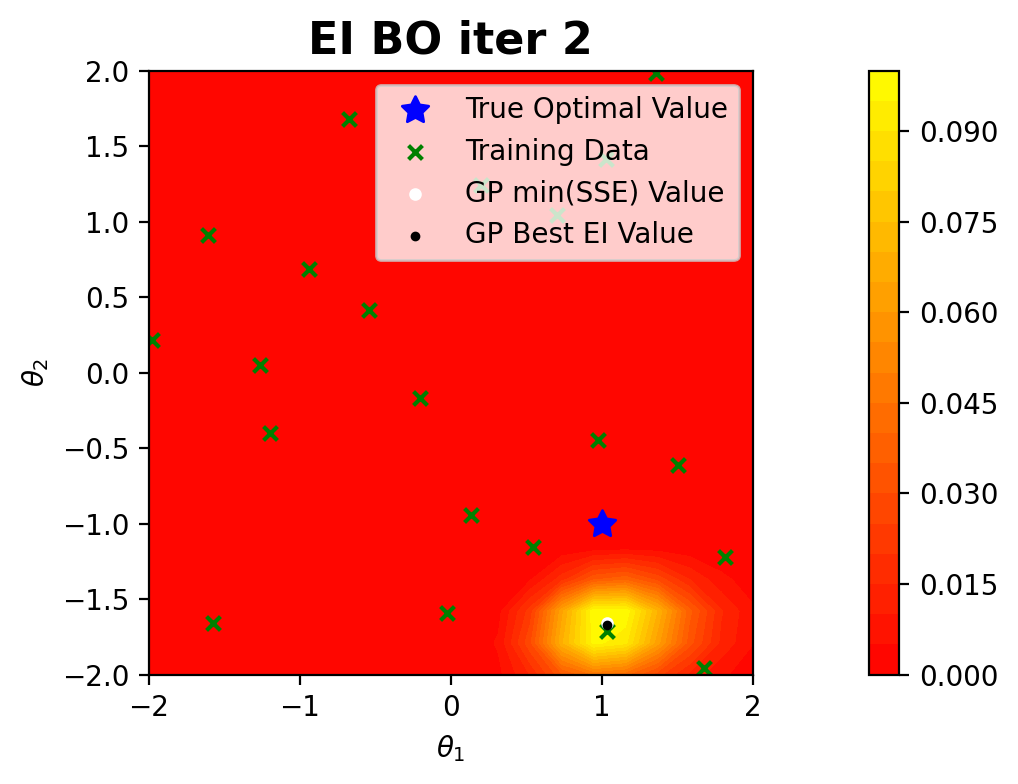

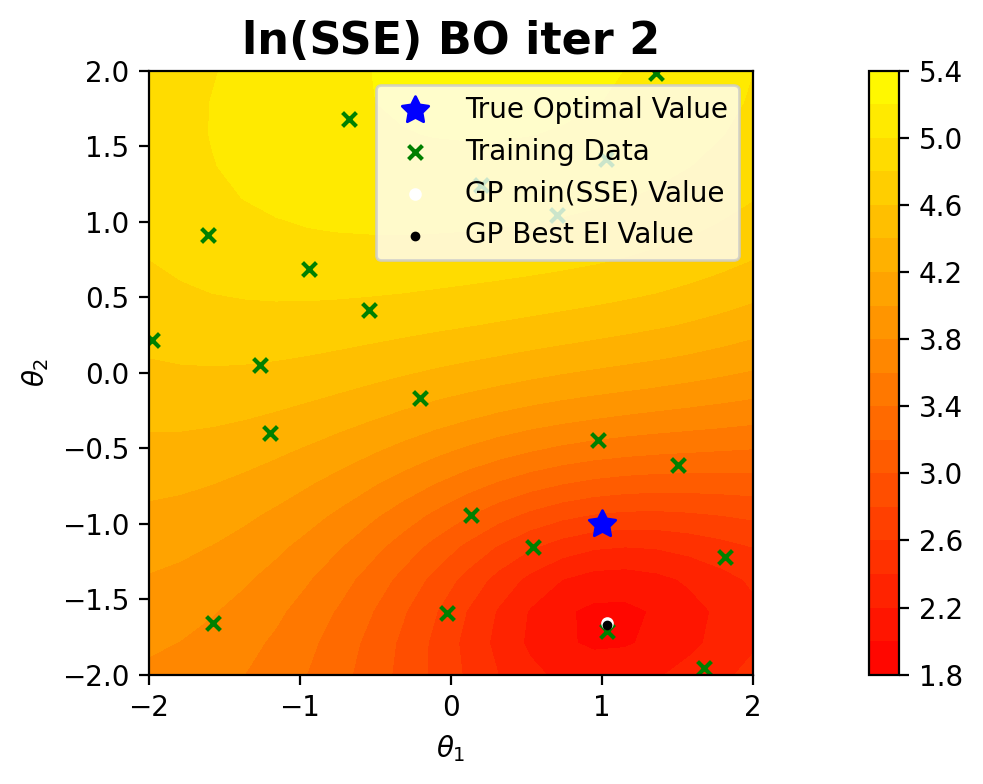

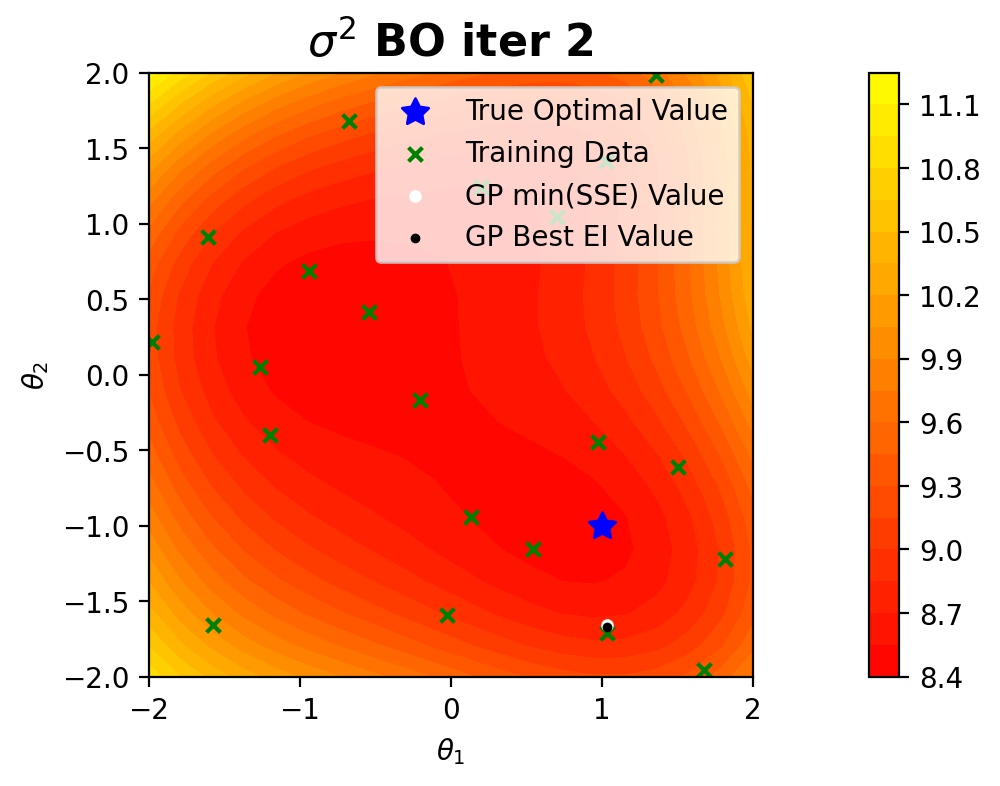

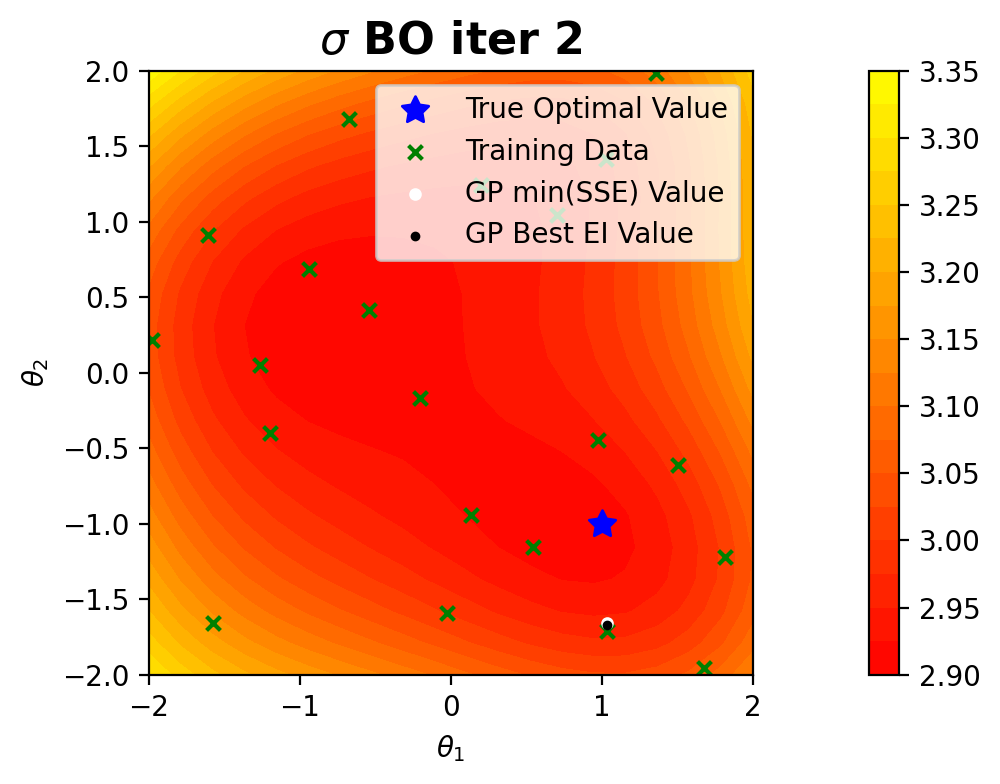

Best Error is: 2.8225


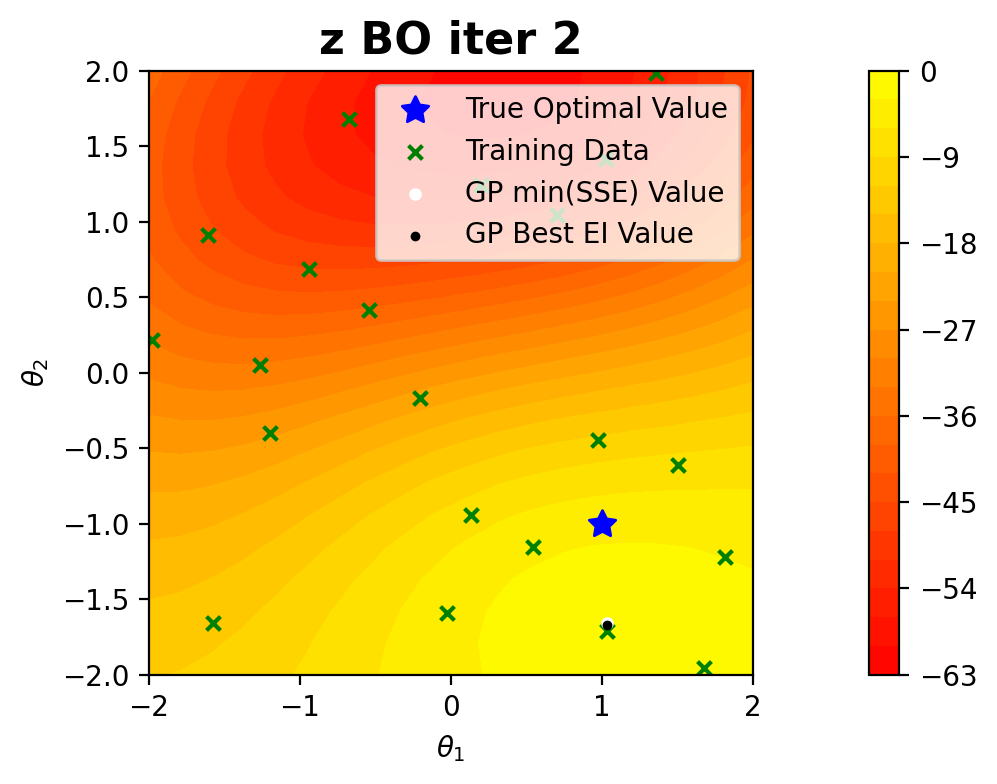

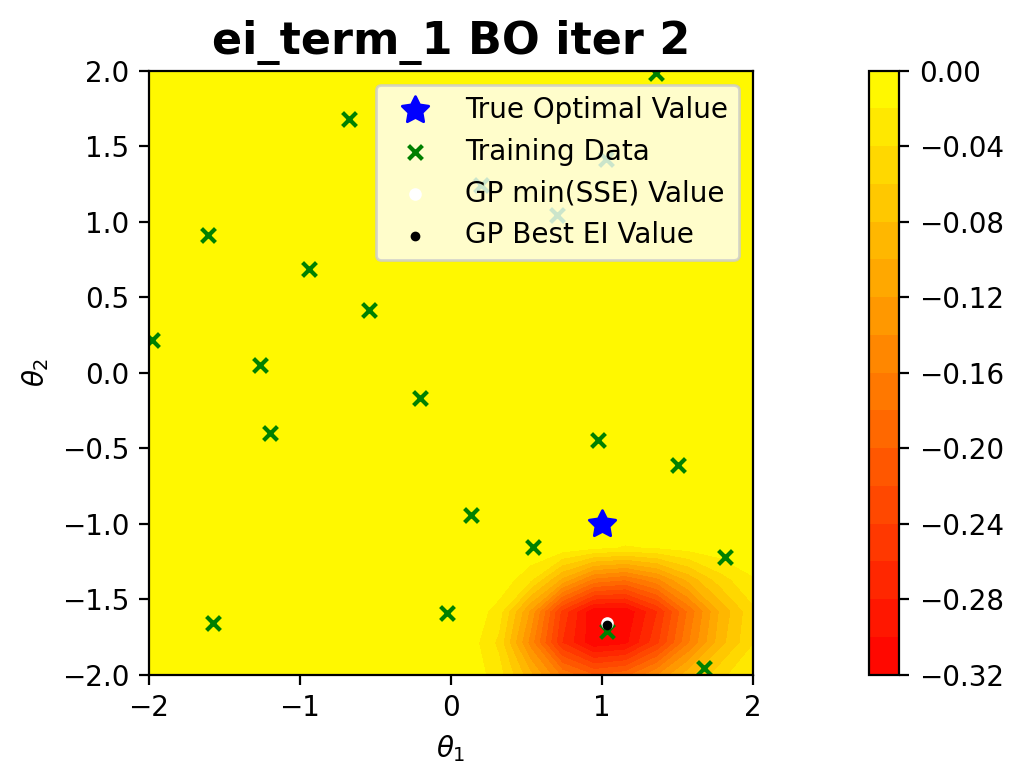

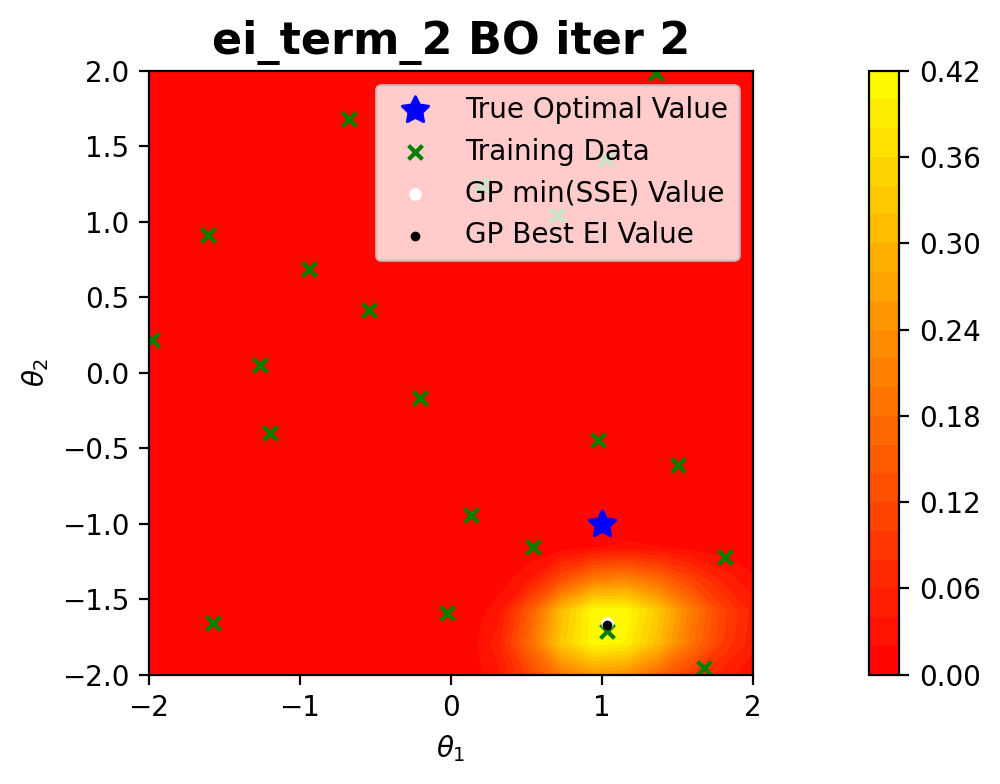

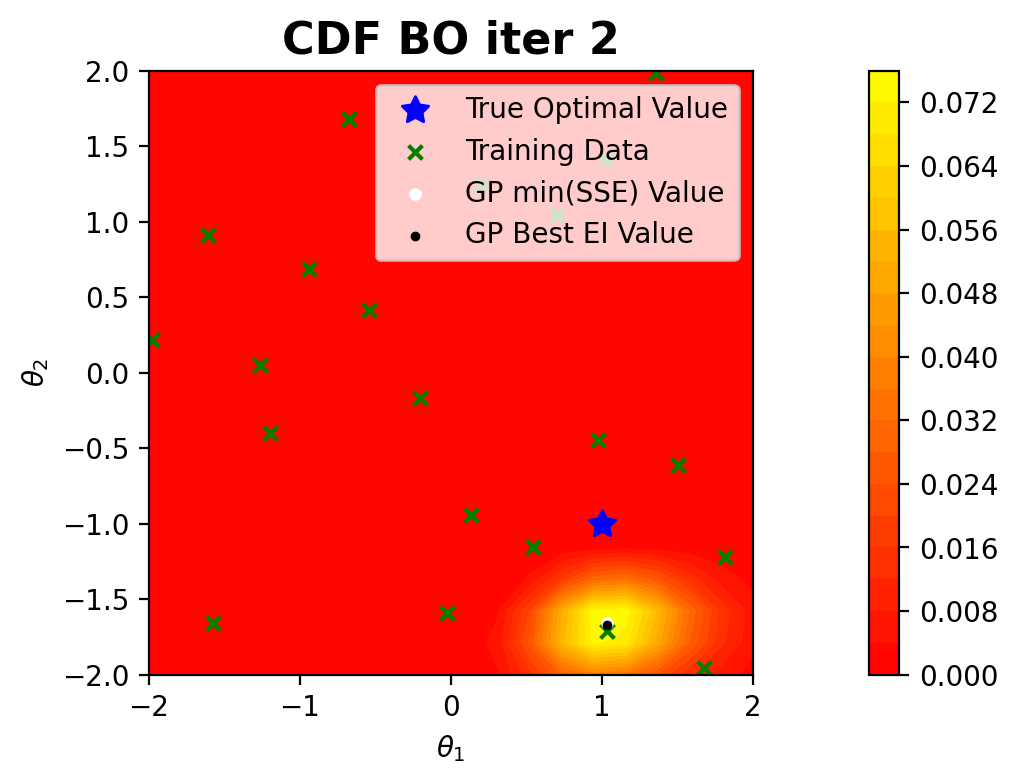

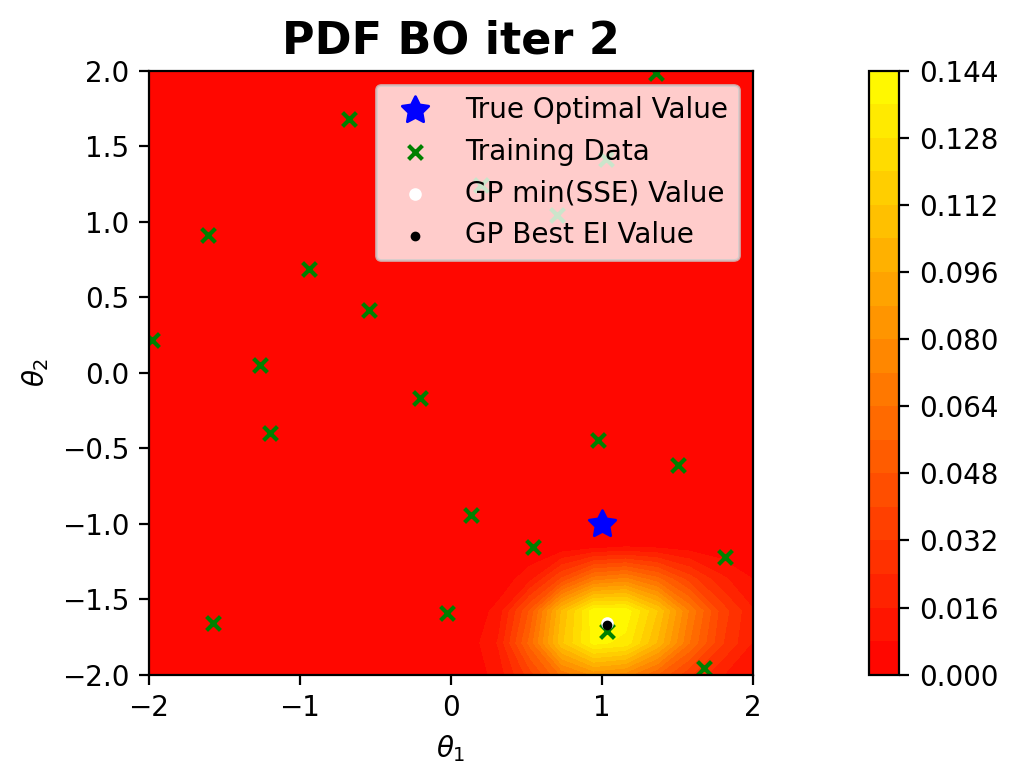

Magnitude of ln(SSE) given Theta_Opt =  [ 1.03531883 -1.65881434] is 2.6827e+00
BO Iteration =  3
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 1.03359792 -1.64635043]
Argmax Theta Best =  [ 0.94736842 -1.57894737]
Scipy Theta Opt =  [ 1.03404996 -1.63552933]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.57894737]
EI_max = 0.03570386290758257 



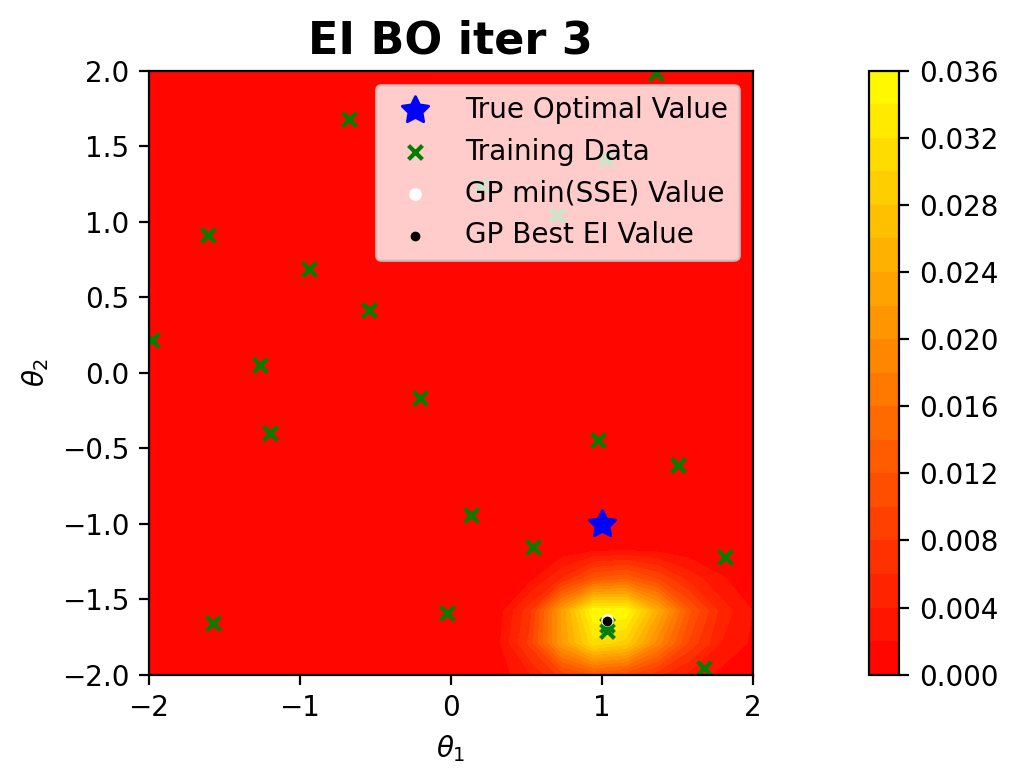

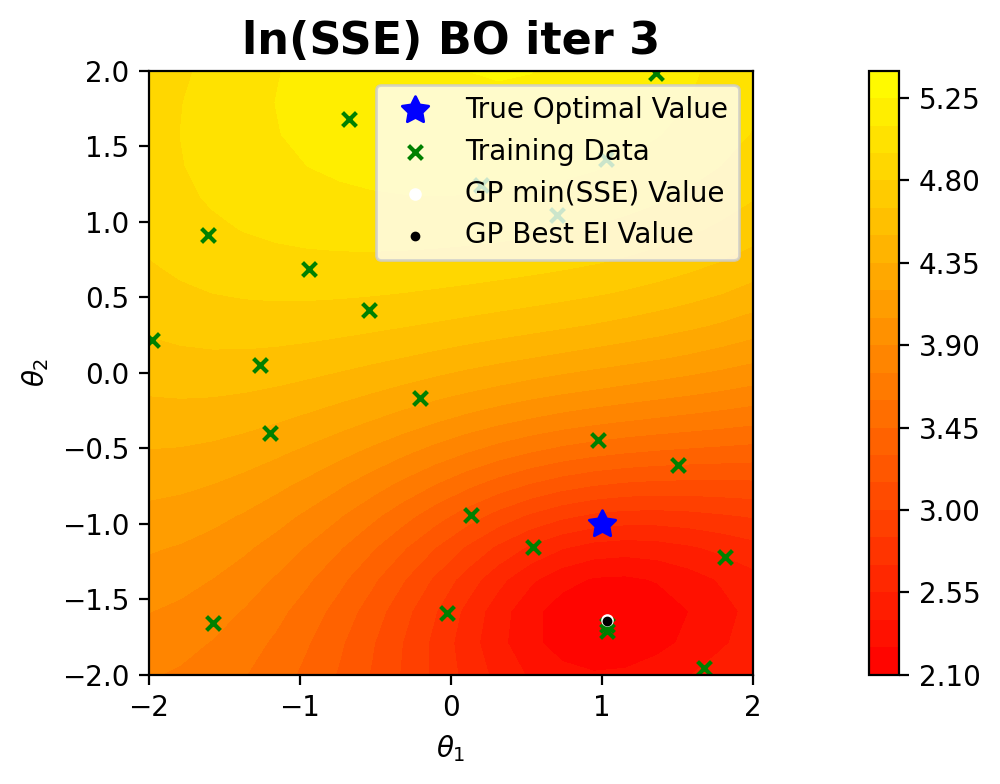

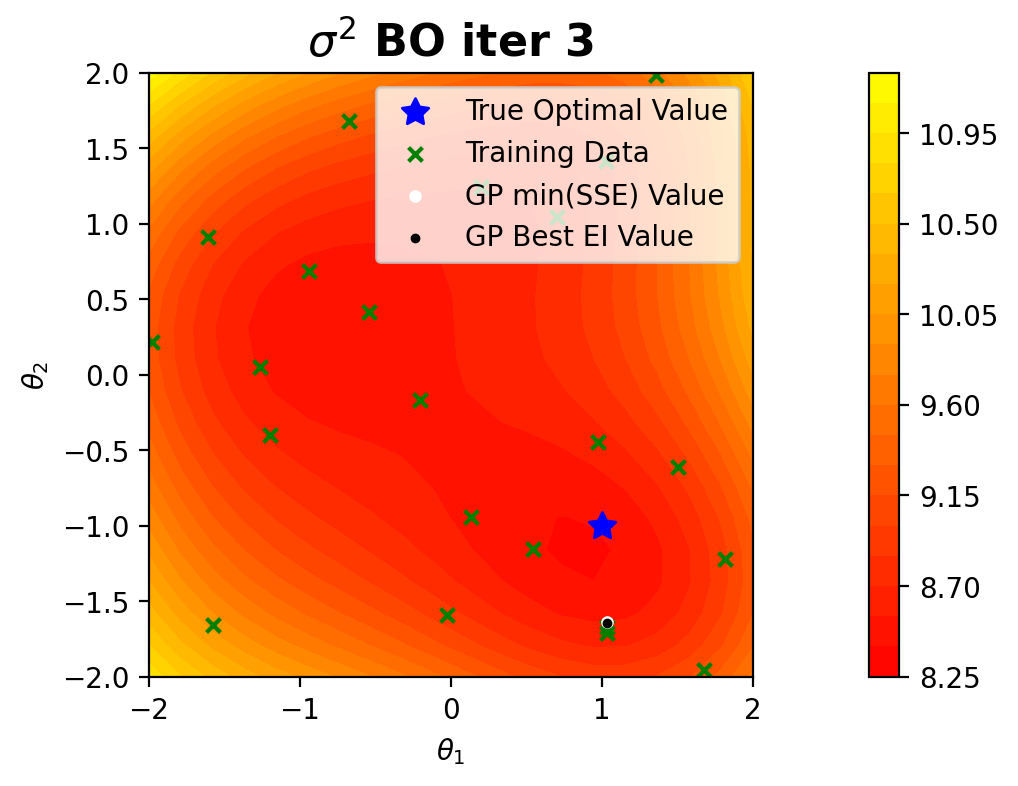

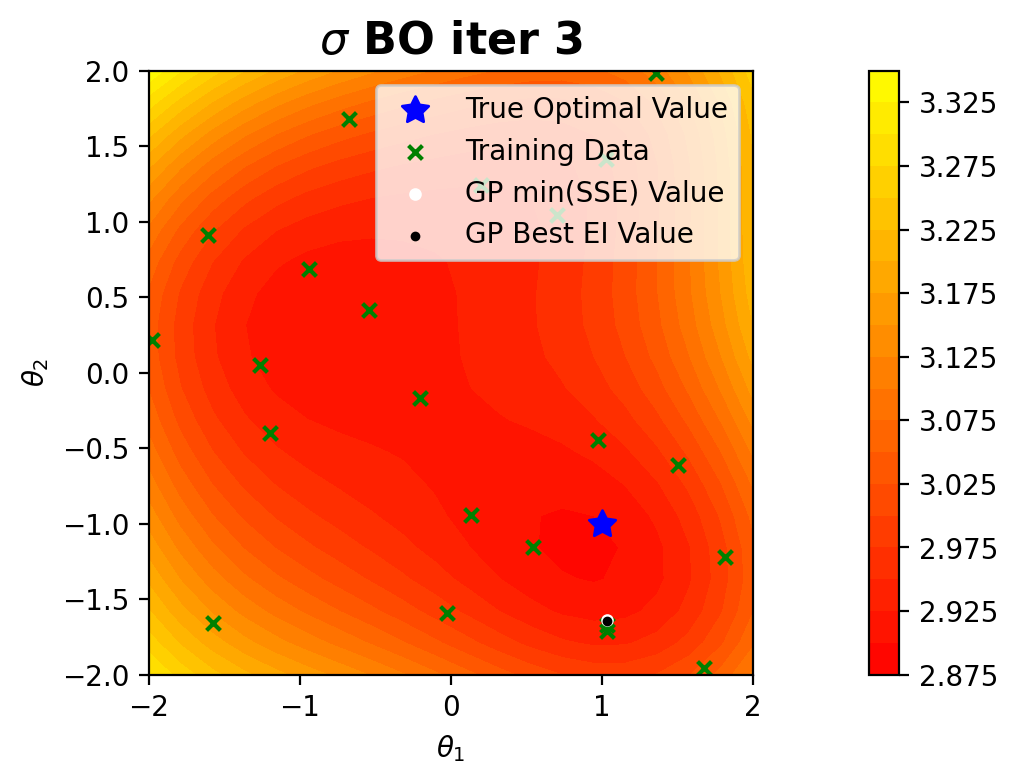

Best Error is: 2.8225


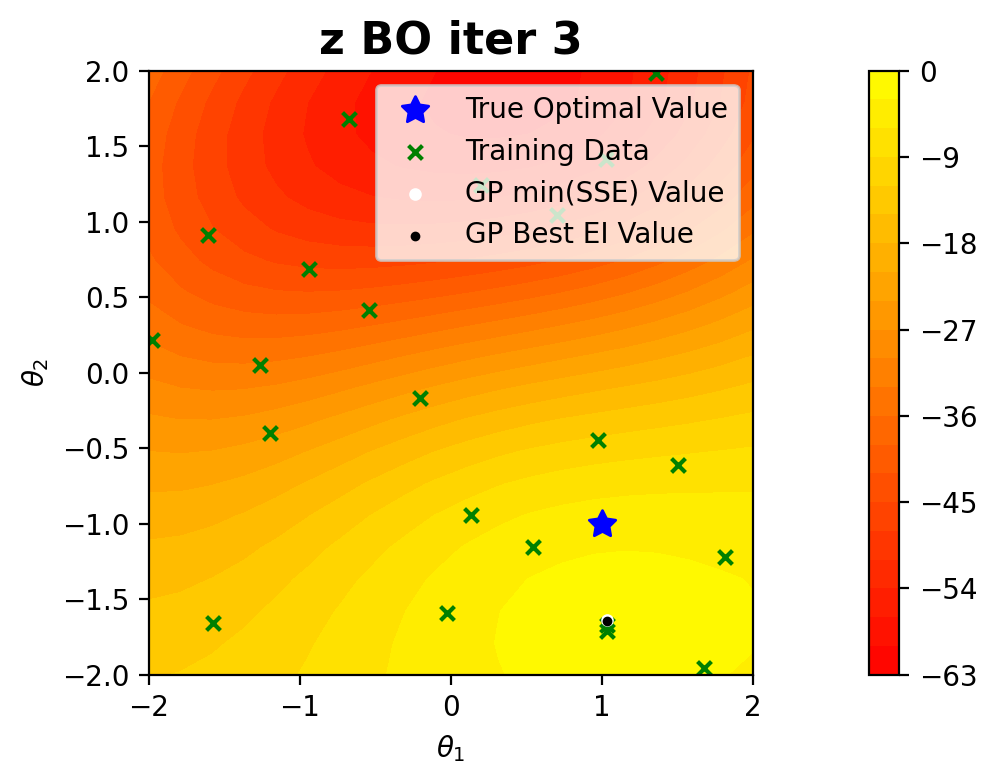

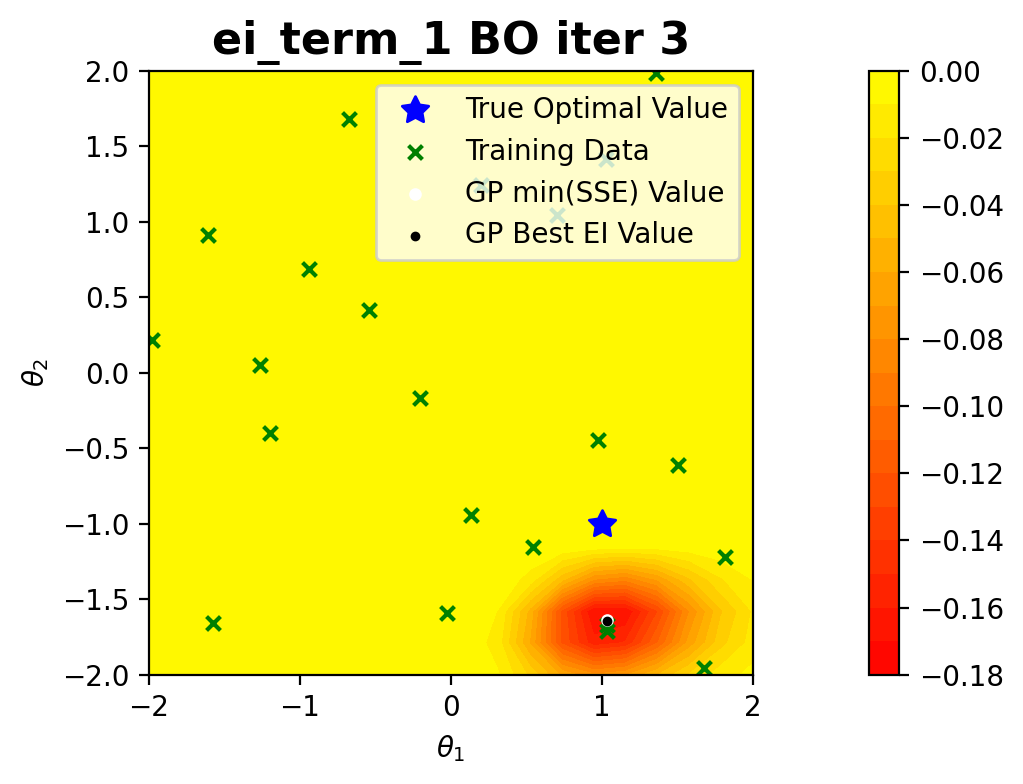

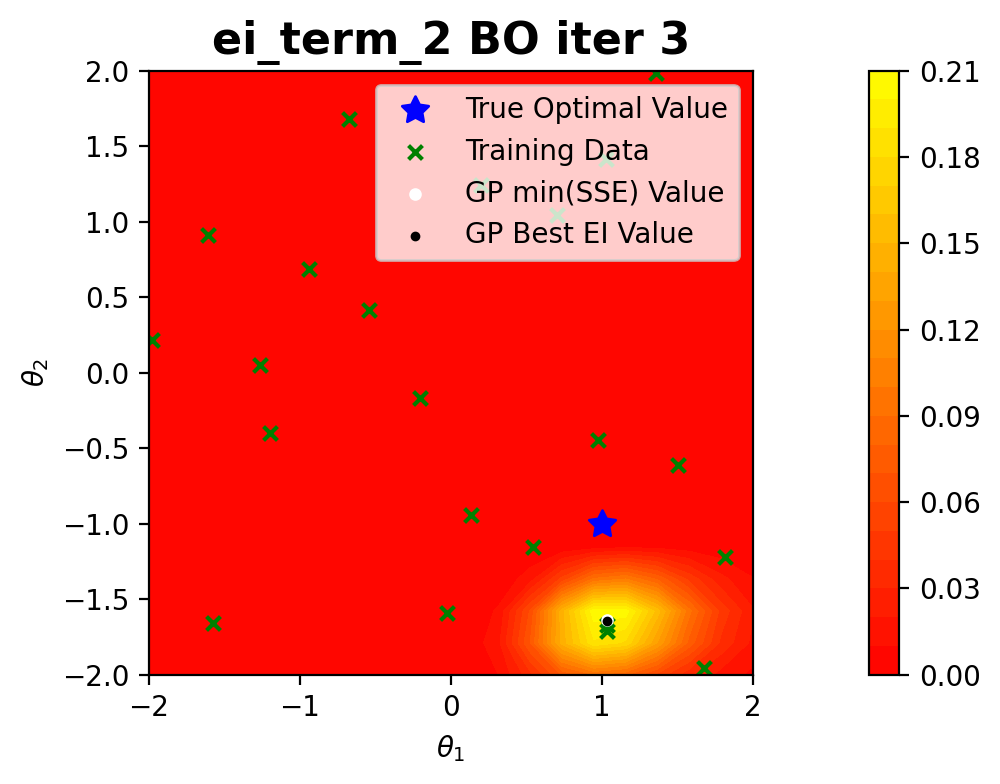

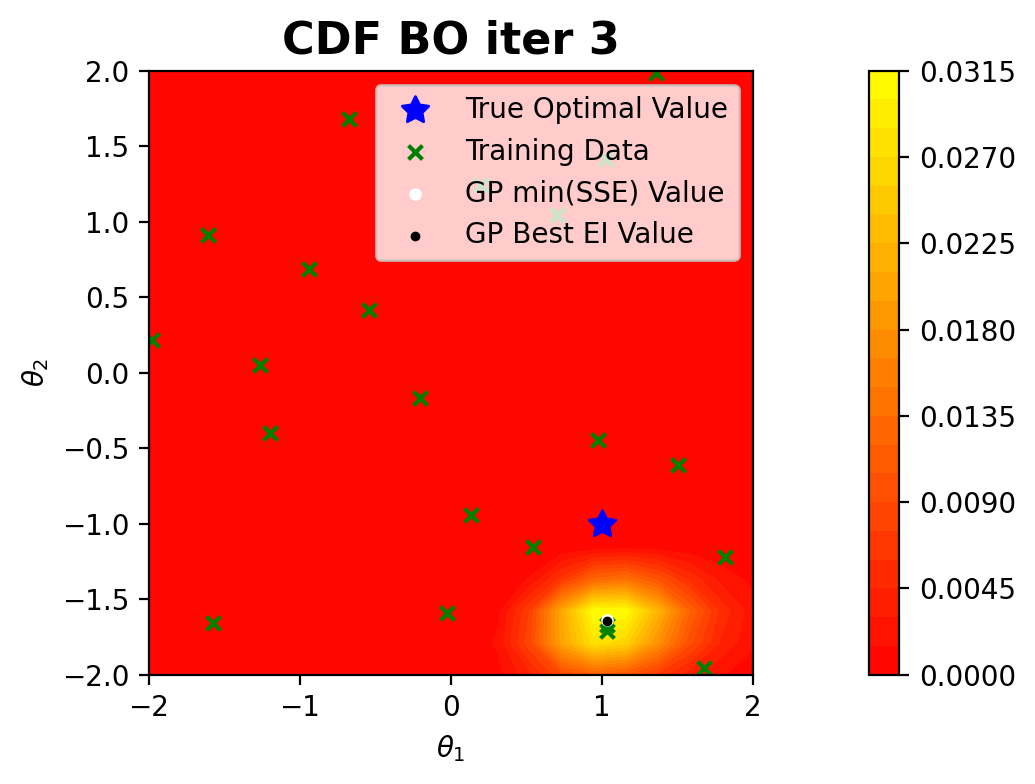

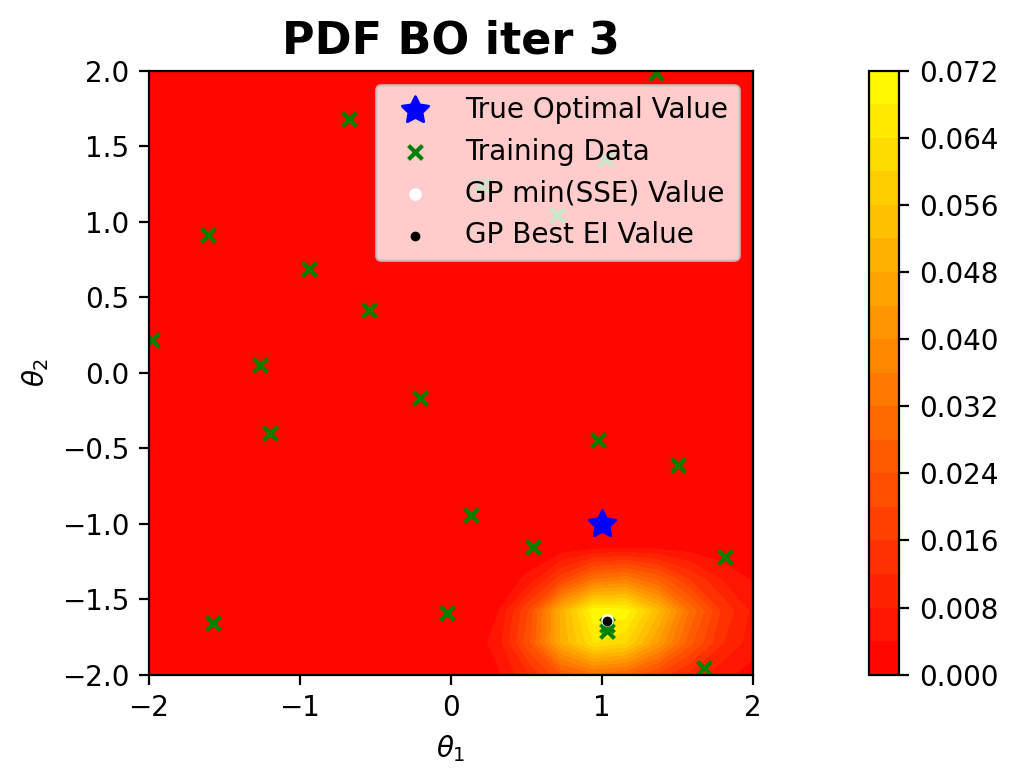

Magnitude of ln(SSE) given Theta_Opt =  [ 1.03404996 -1.63552933] is 2.6104e+00
Run Number:  3


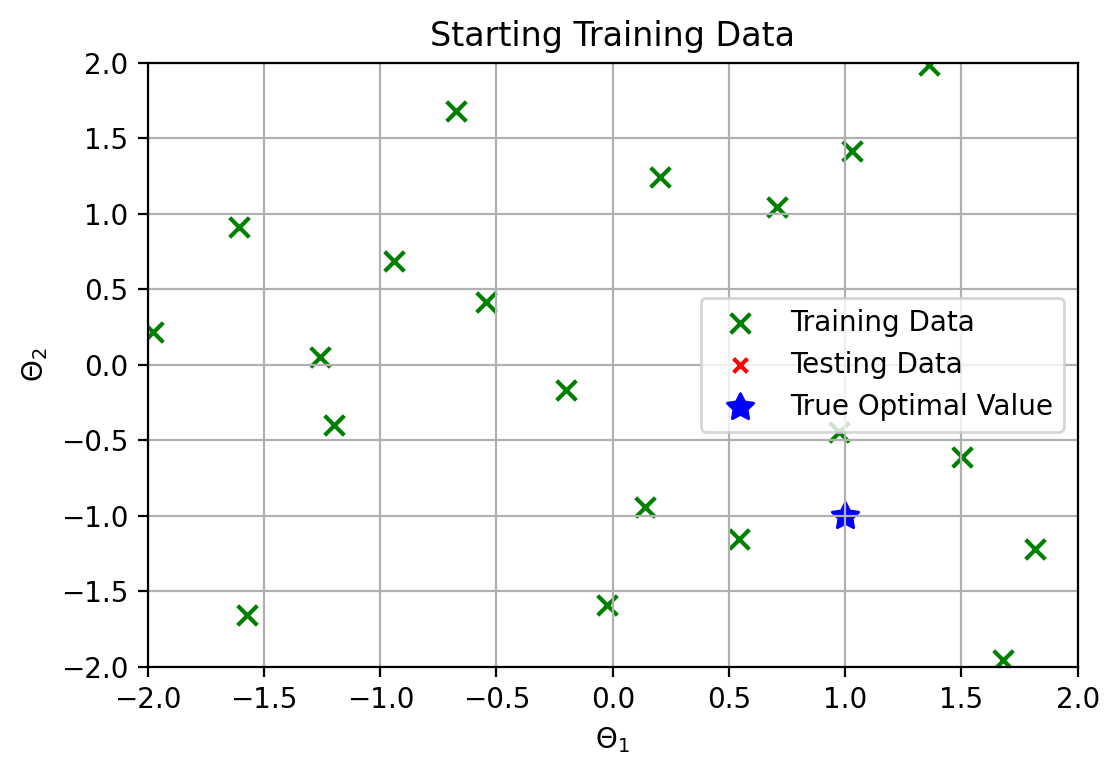

BO Iteration =  1
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 1.03637276 -1.71409257]
Argmax Theta Best =  [ 0.94736842 -1.78947368]
Scipy Theta Opt =  [ 1.03694733 -1.704428  ]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.78947368]
EI_max = 0.479184350788766 



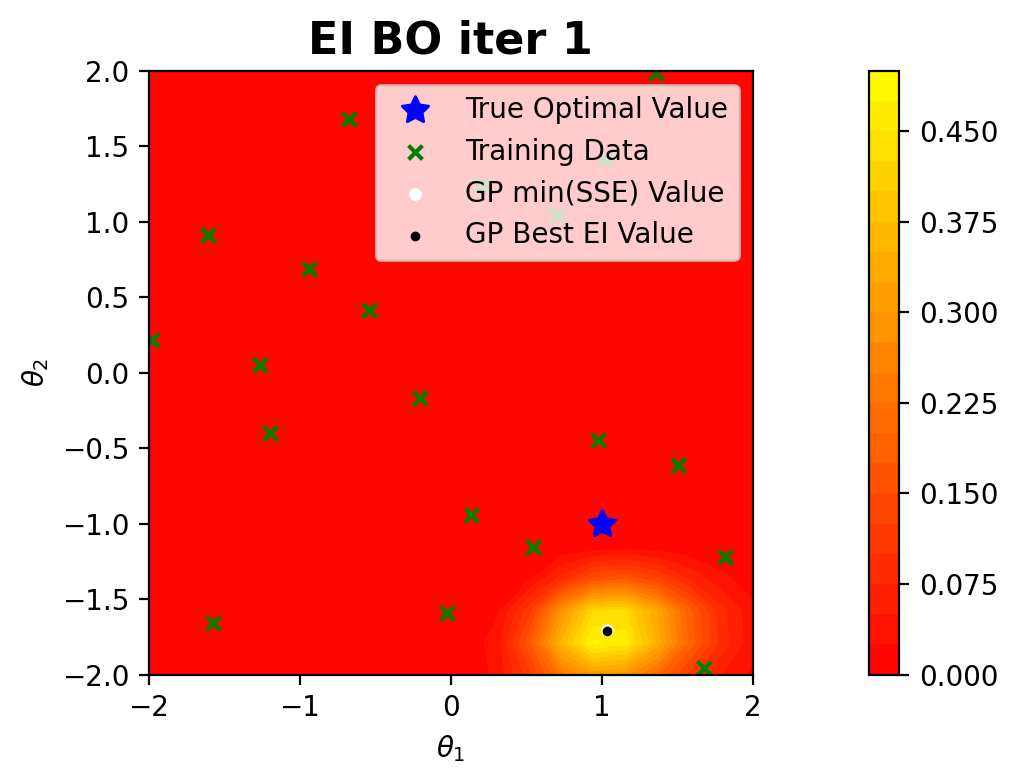

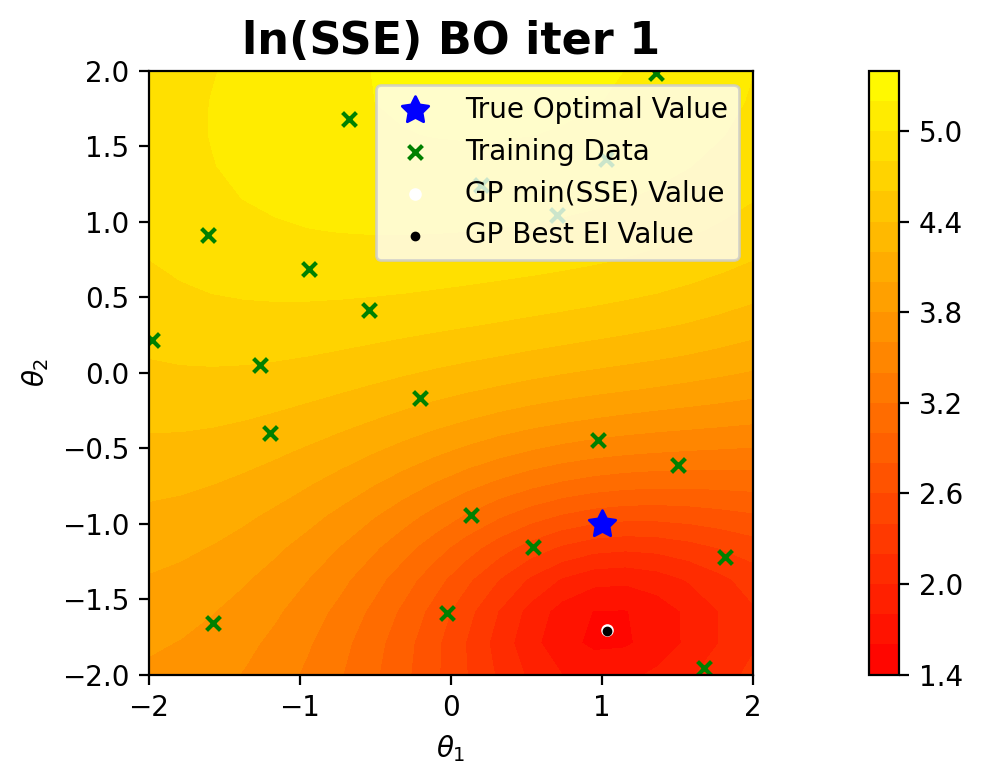

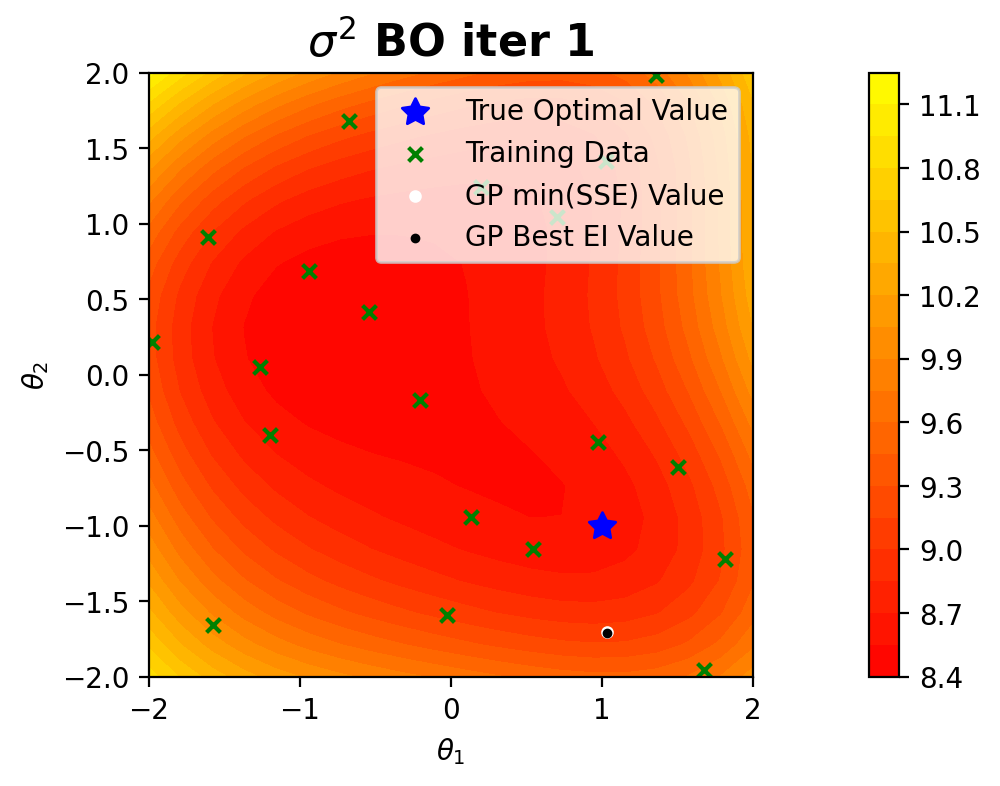

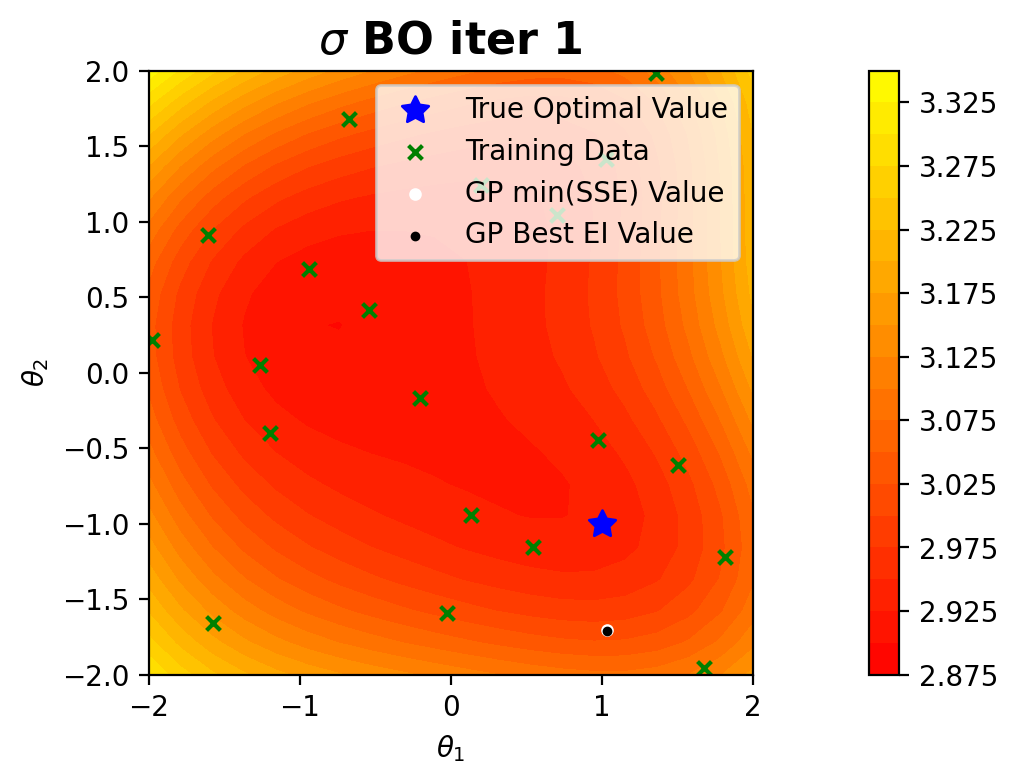

Best Error is: 2.8225


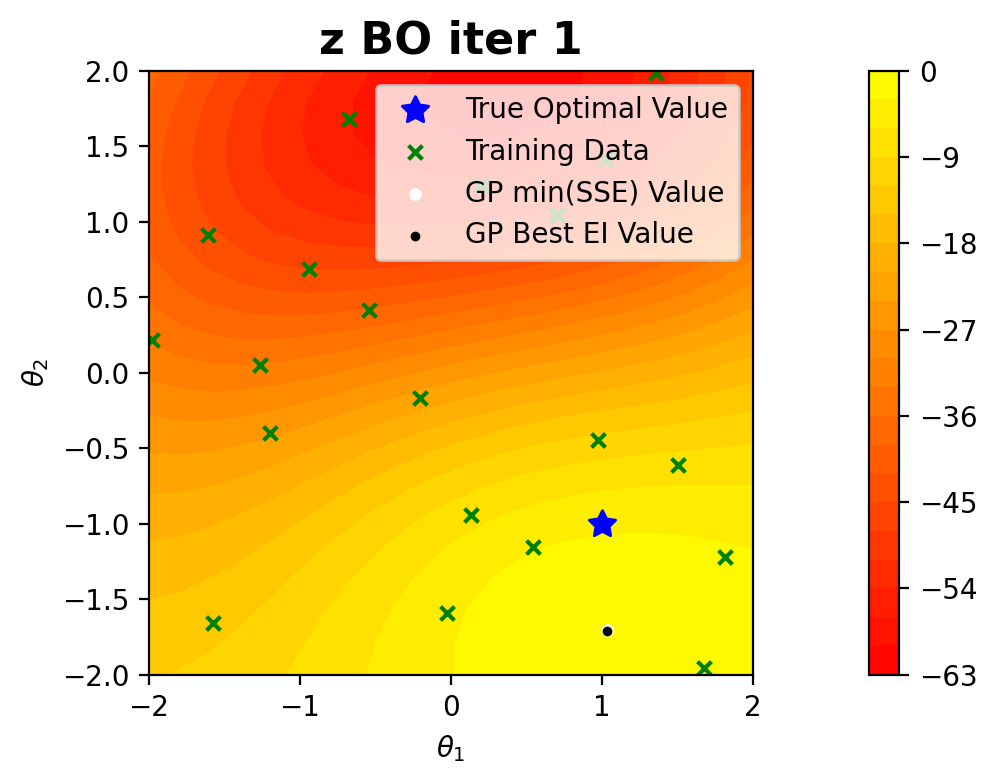

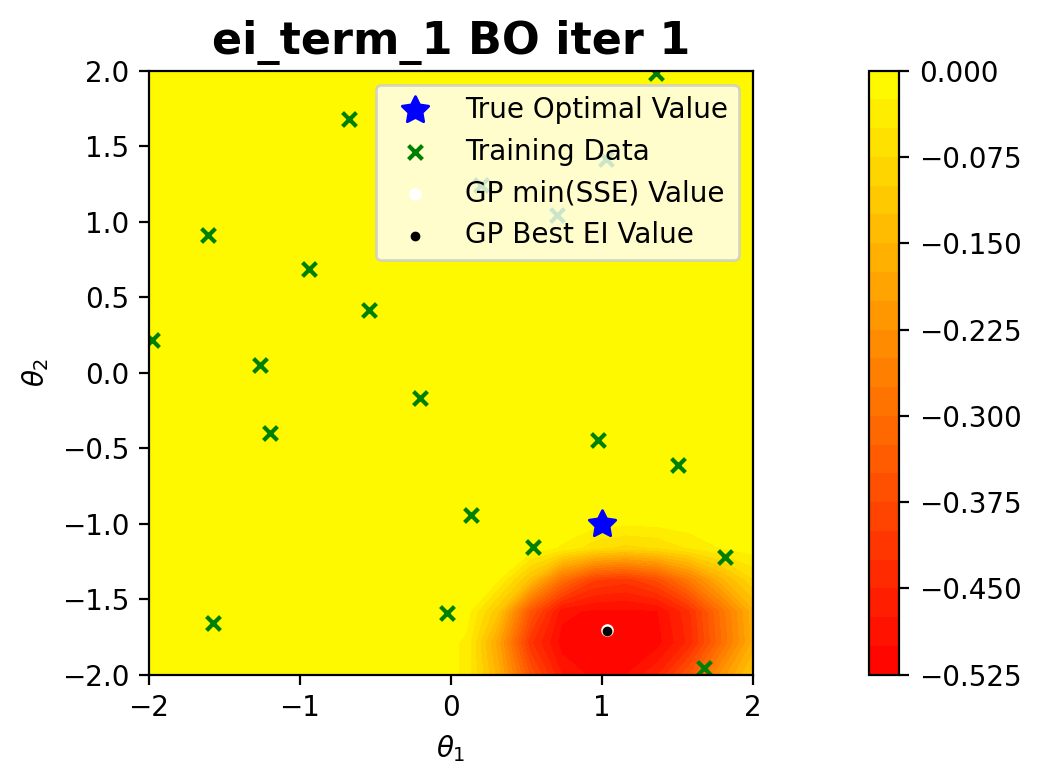

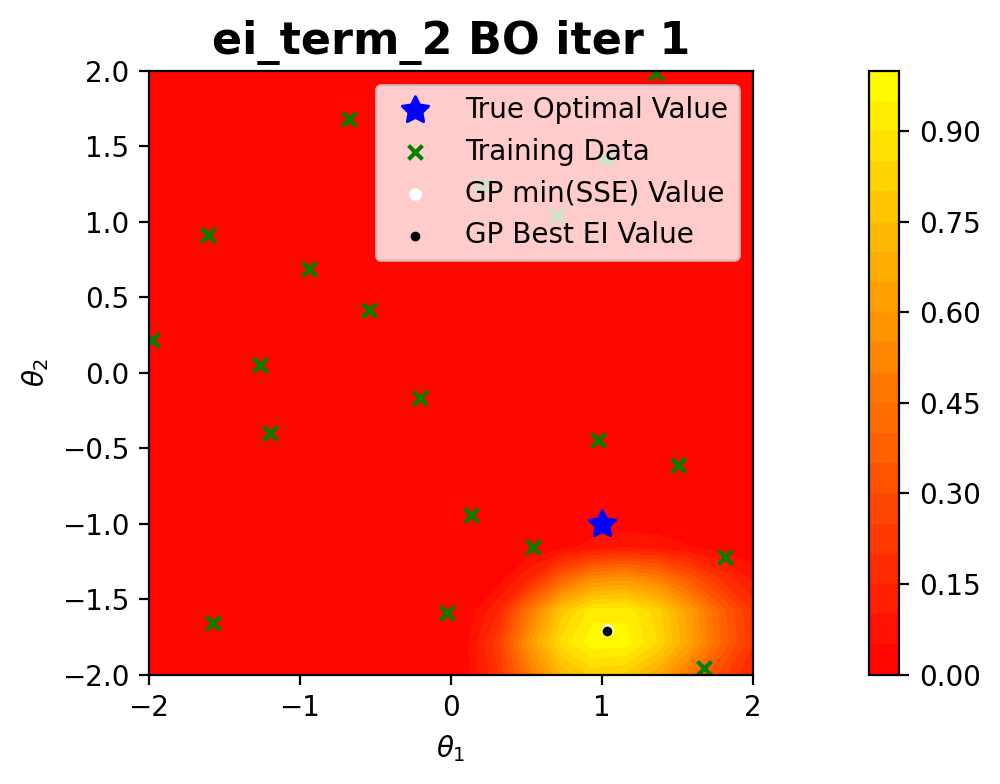

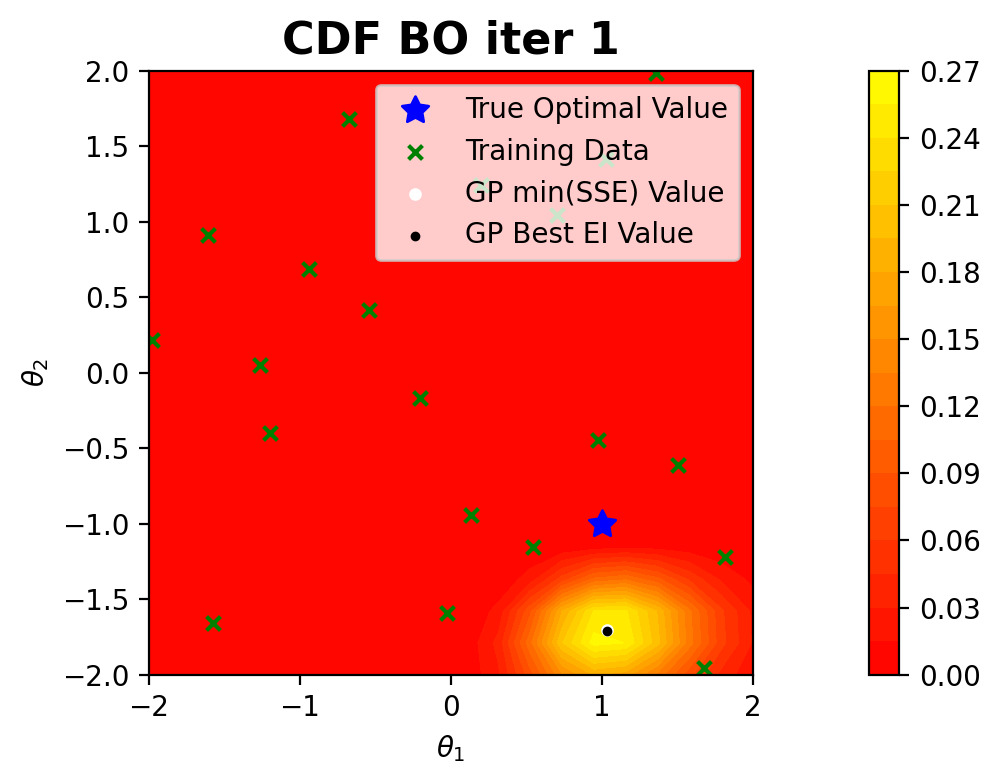

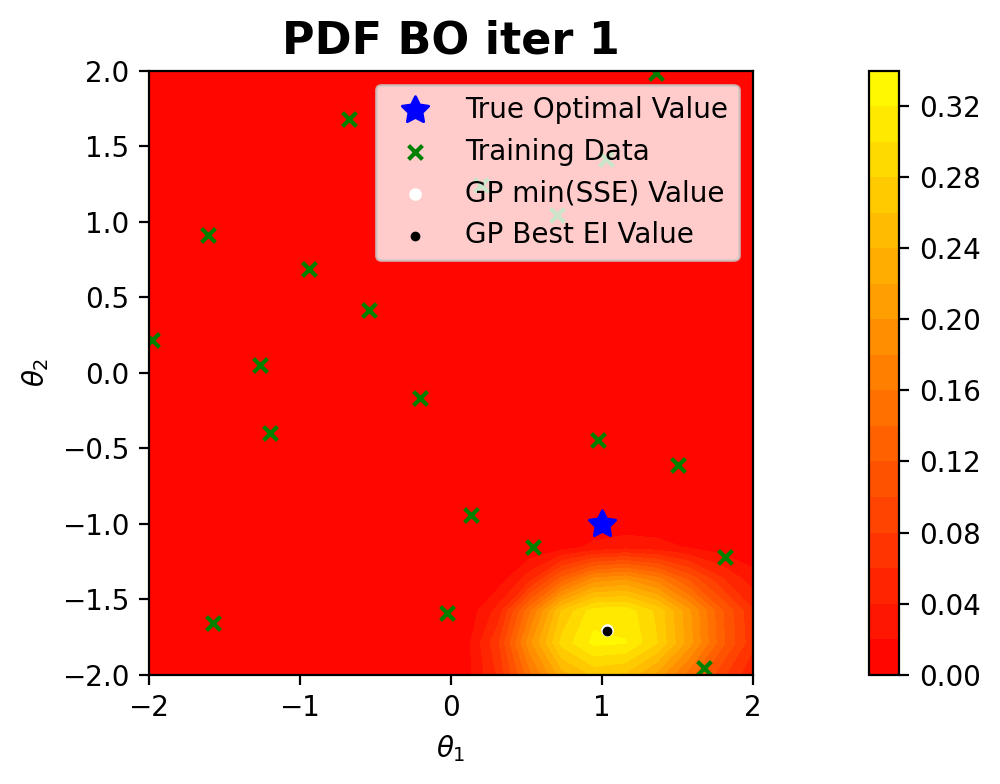

Magnitude of ln(SSE) given Theta_Opt =  [ 1.03694733 -1.704428  ] is 2.8172e+00
BO Iteration =  2
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 1.03475306 -1.66995121]
Argmax Theta Best =  [ 1.15789474 -1.57894737]
Scipy Theta Opt =  [ 1.0353189 -1.6588141]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.57894737]
EI_max = 0.09860030482185289 



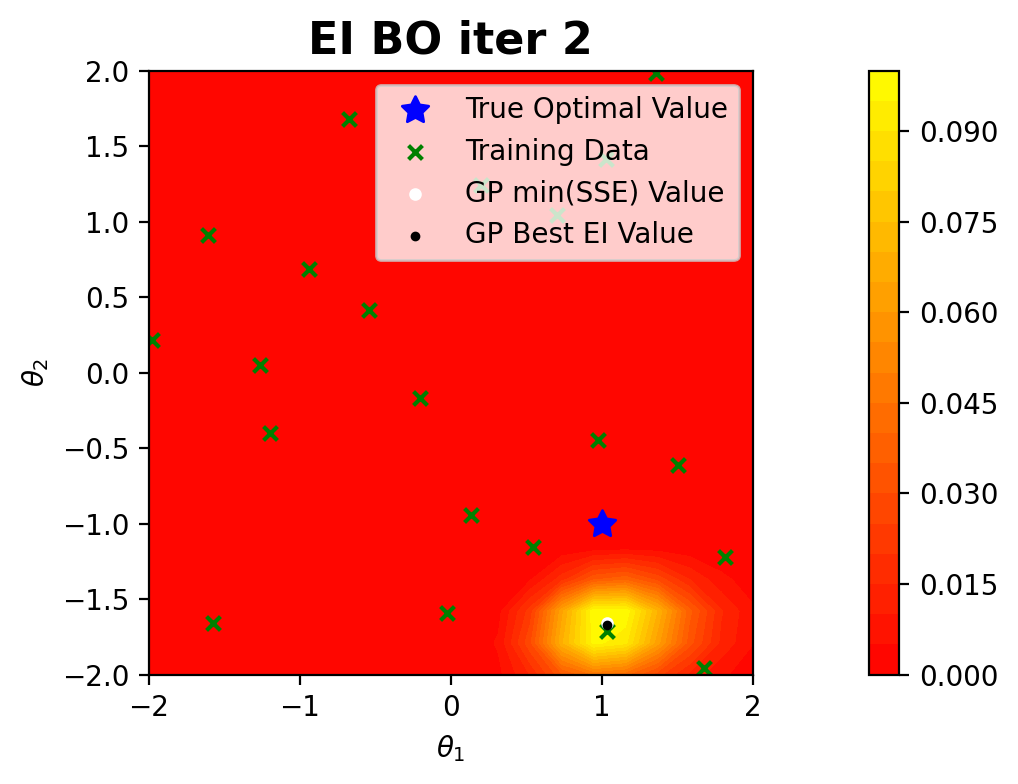

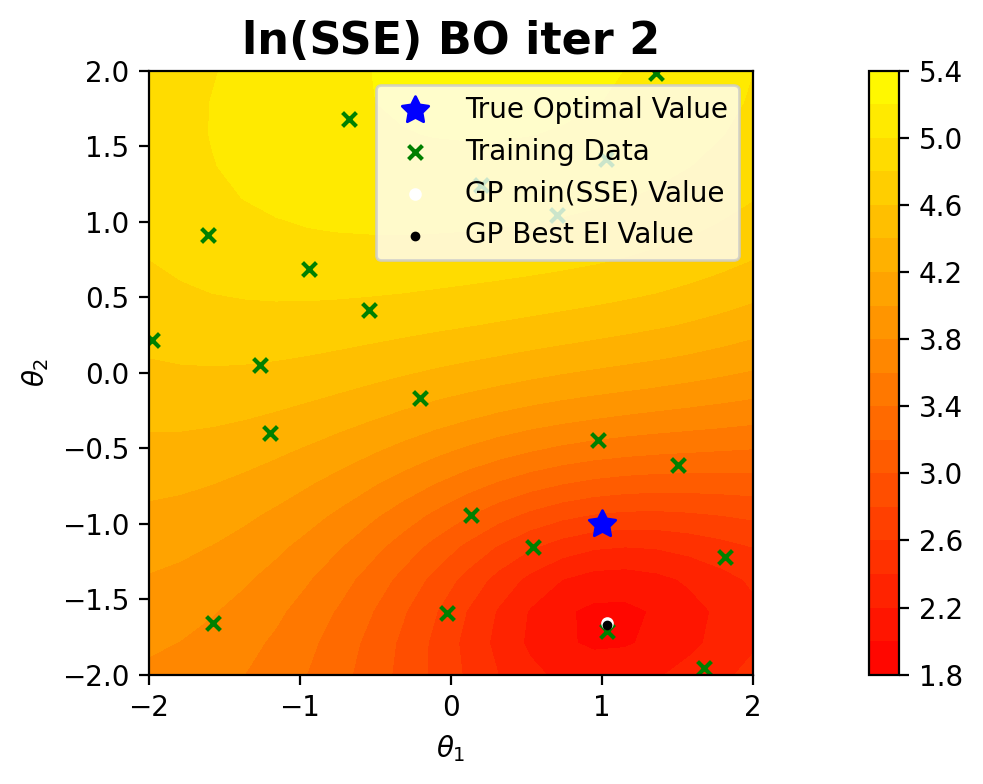

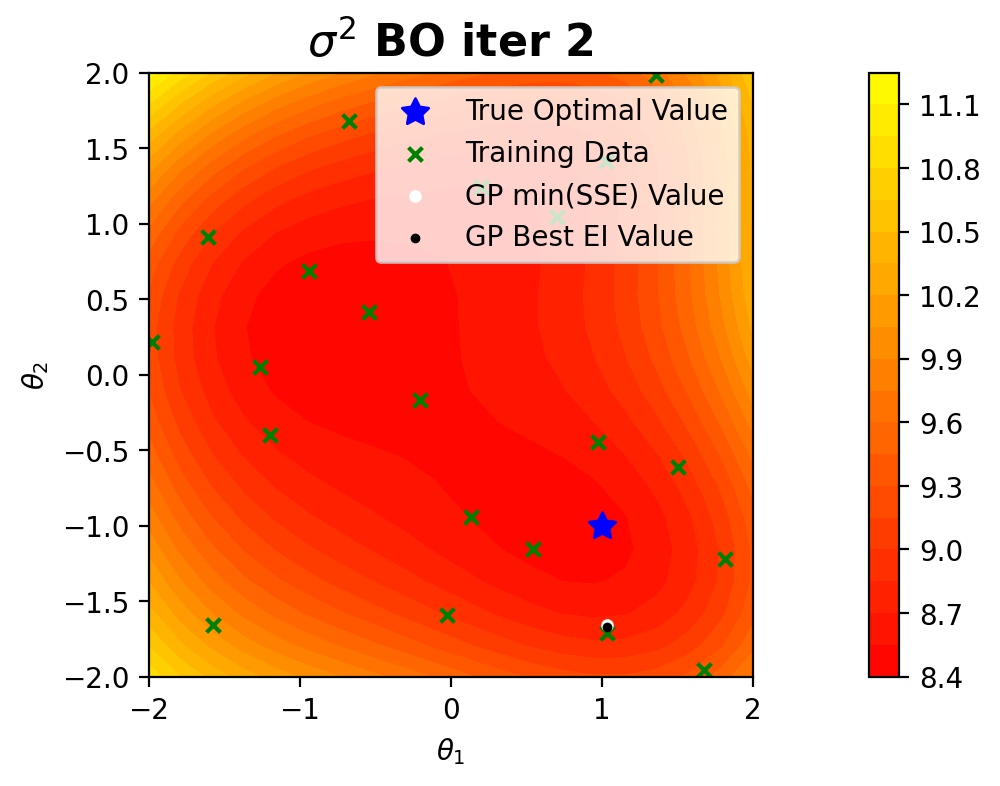

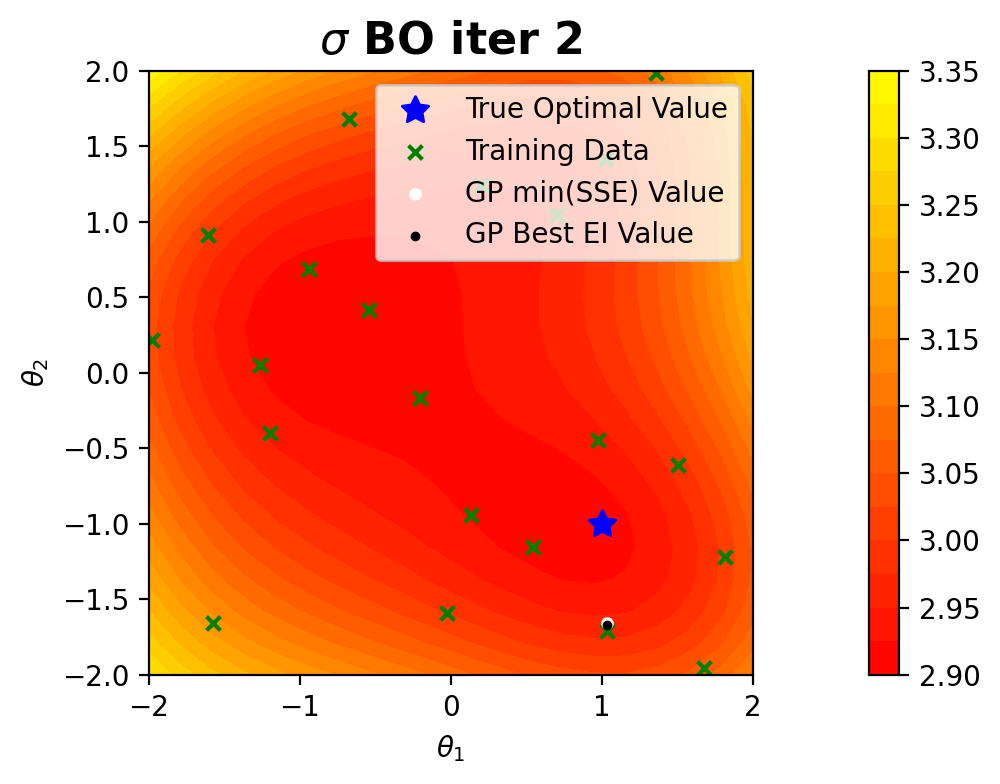

Best Error is: 2.8225


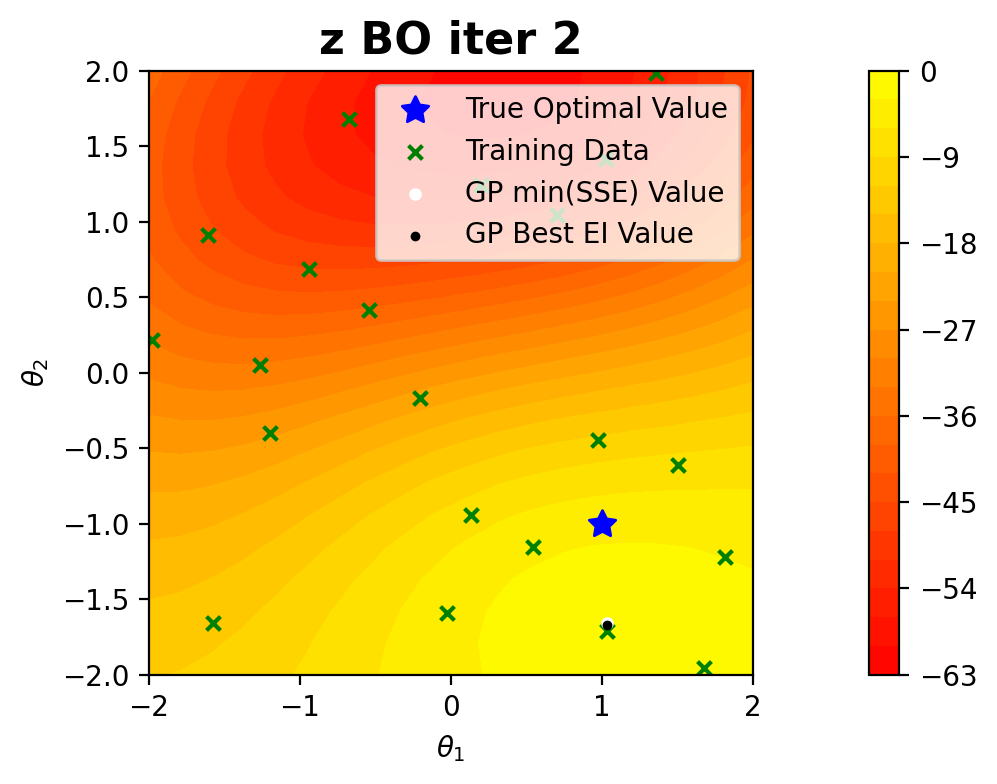

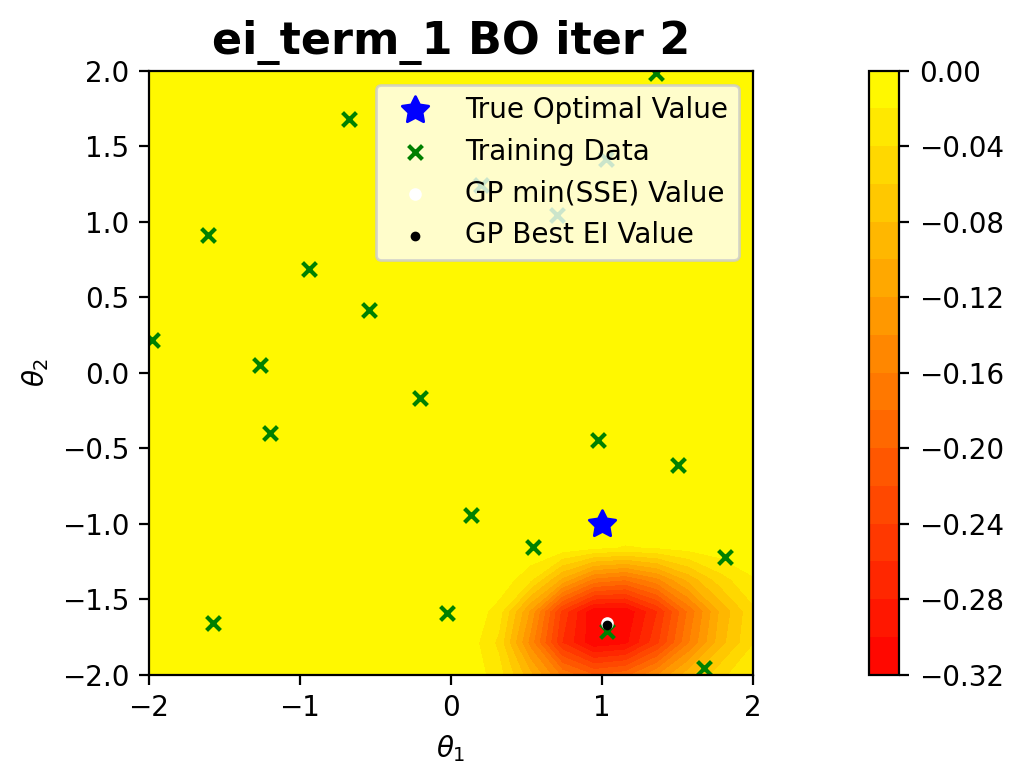

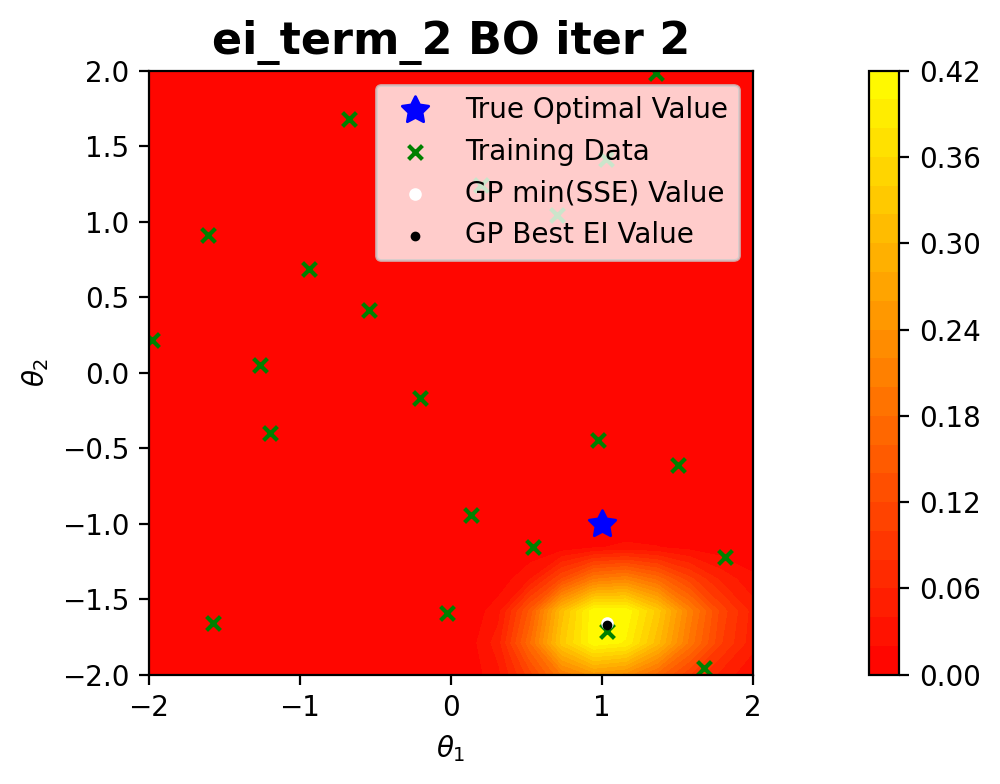

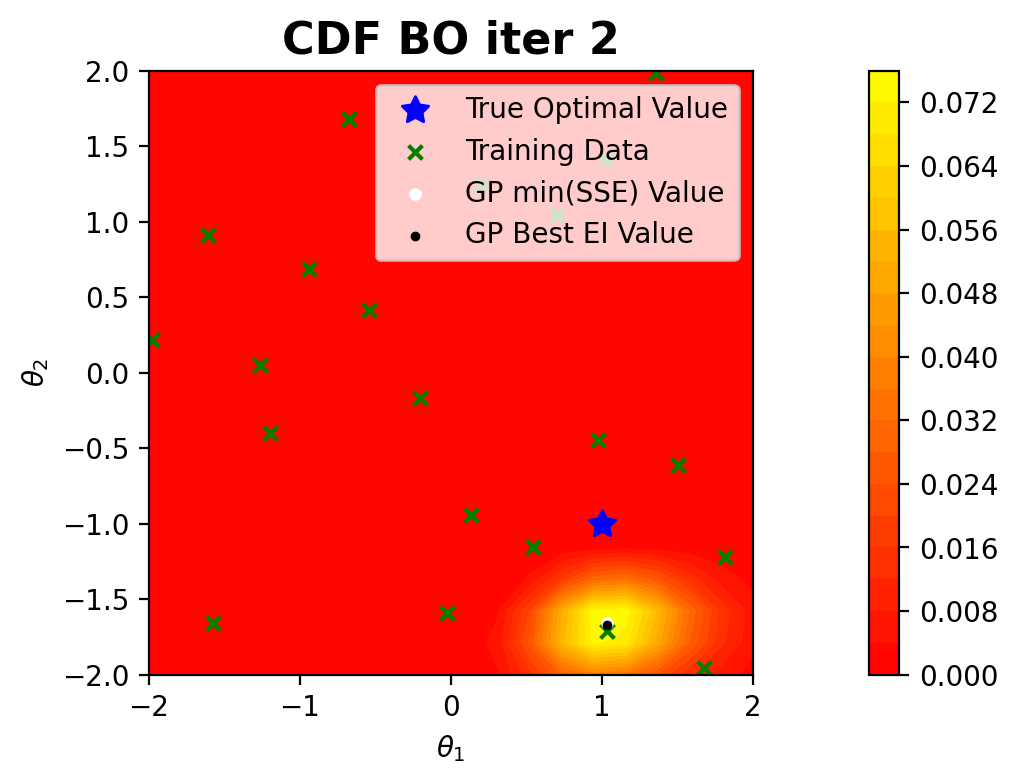

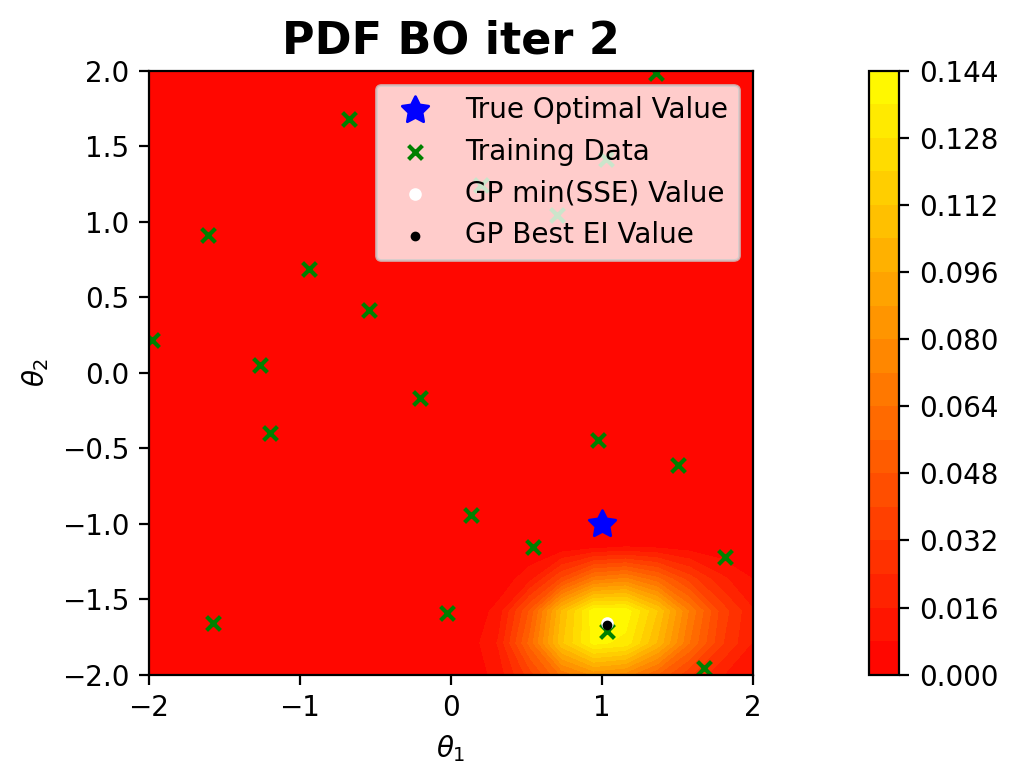

Magnitude of ln(SSE) given Theta_Opt =  [ 1.0353189 -1.6588141] is 2.6827e+00
BO Iteration =  3
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 1.03359801 -1.64635045]
Argmax Theta Best =  [ 0.94736842 -1.57894737]
Scipy Theta Opt =  [ 1.03405005 -1.63552943]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.57894737]
EI_max = 0.03570386703682507 



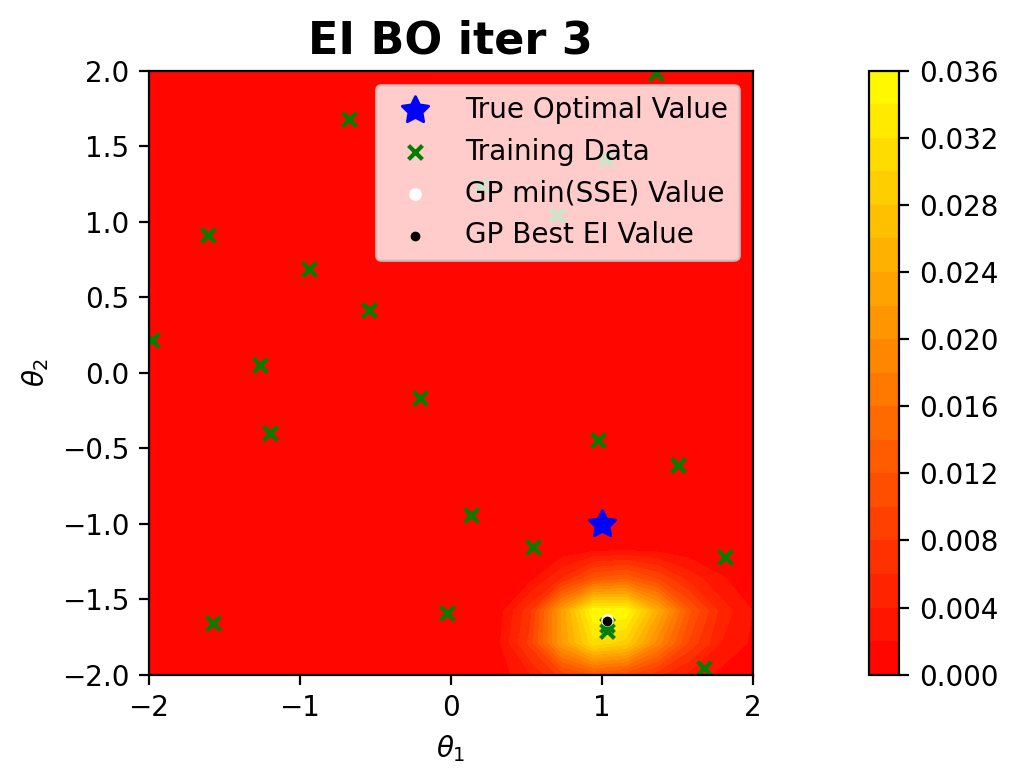

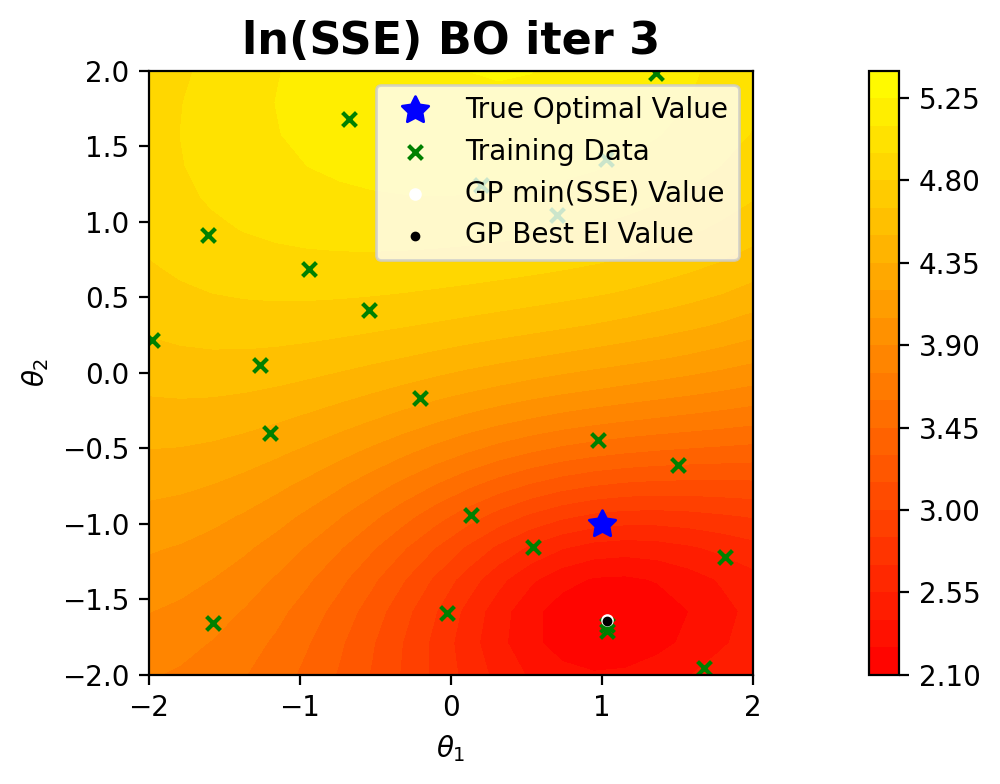

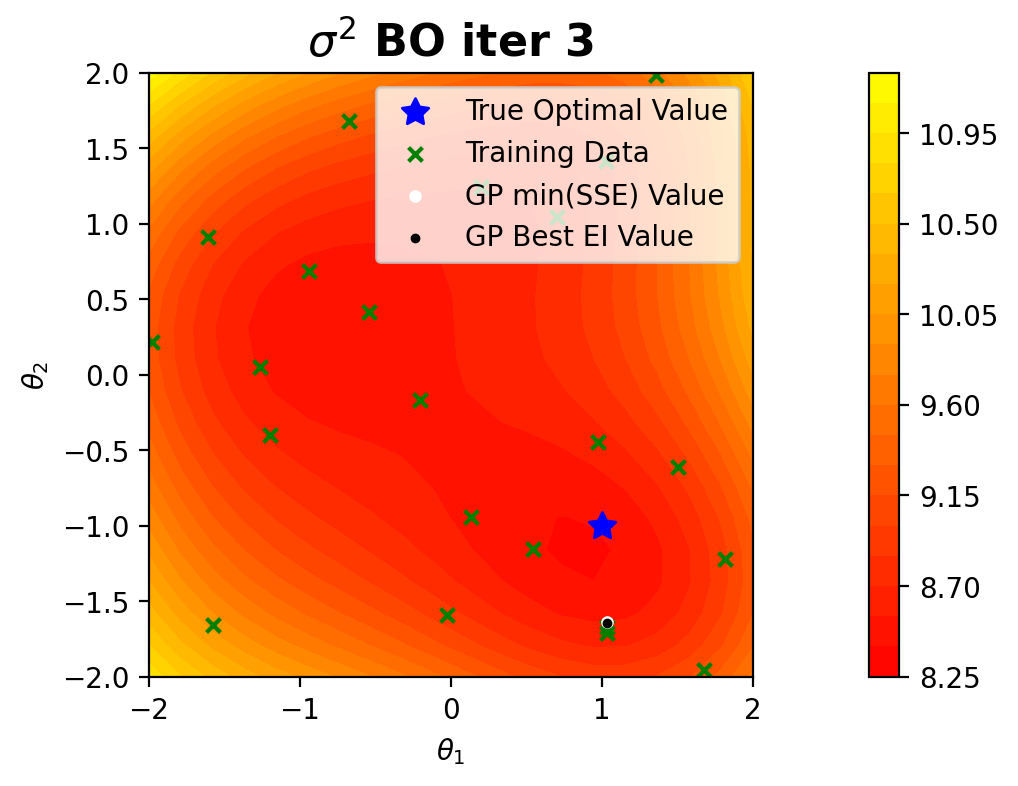

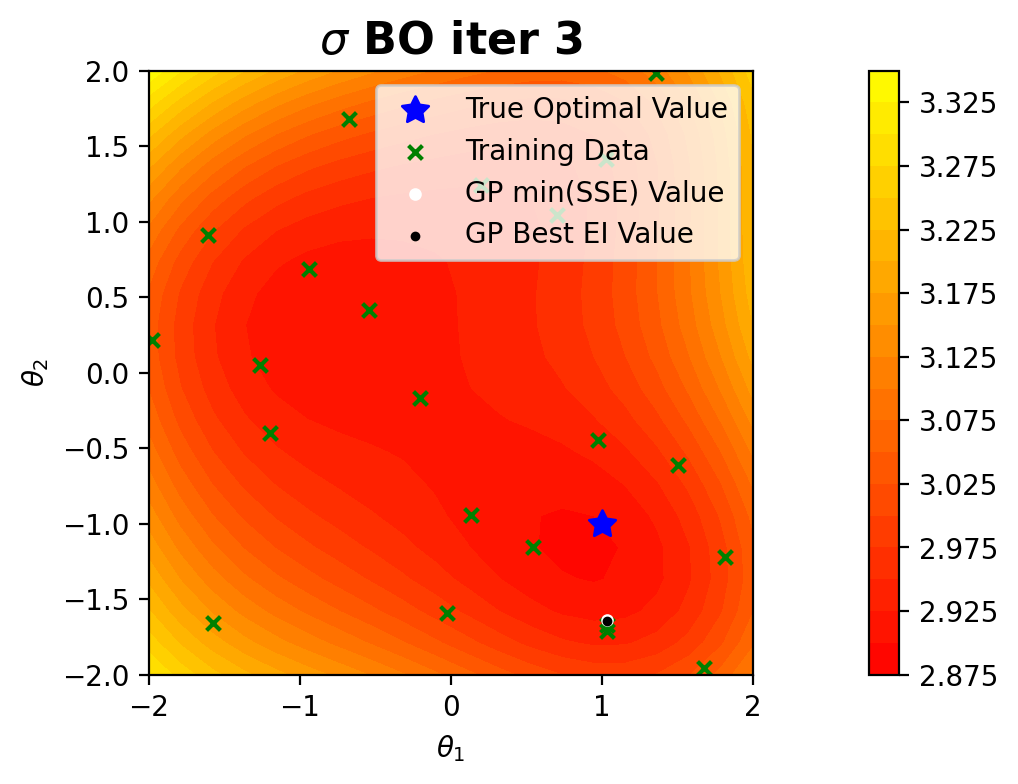

Best Error is: 2.8225


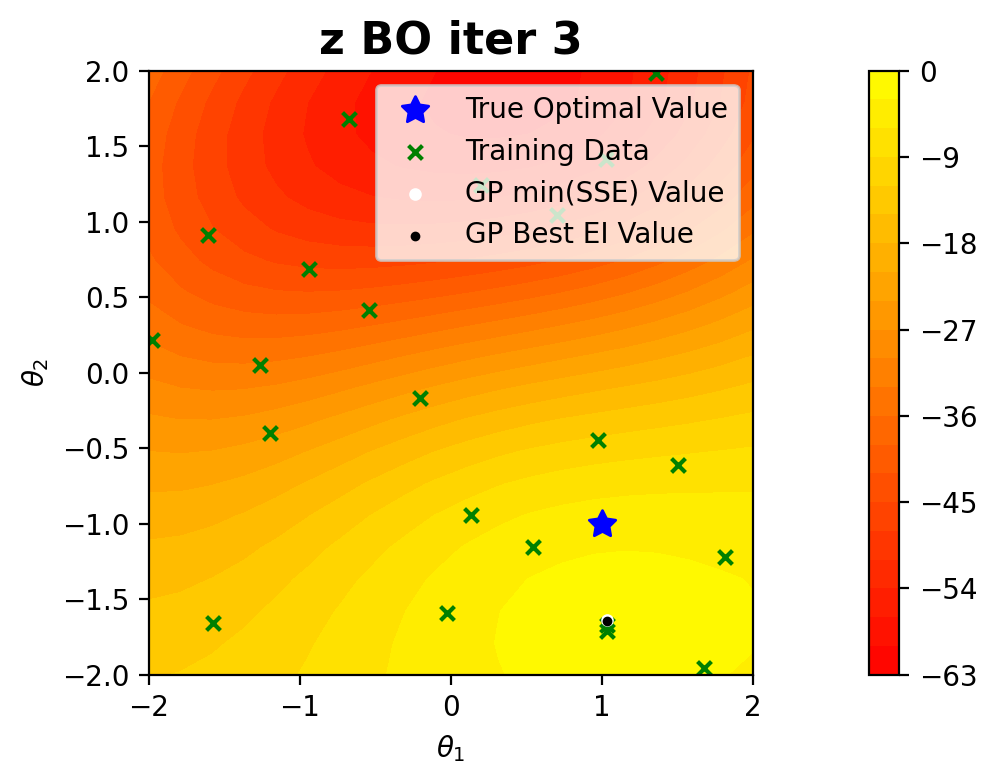

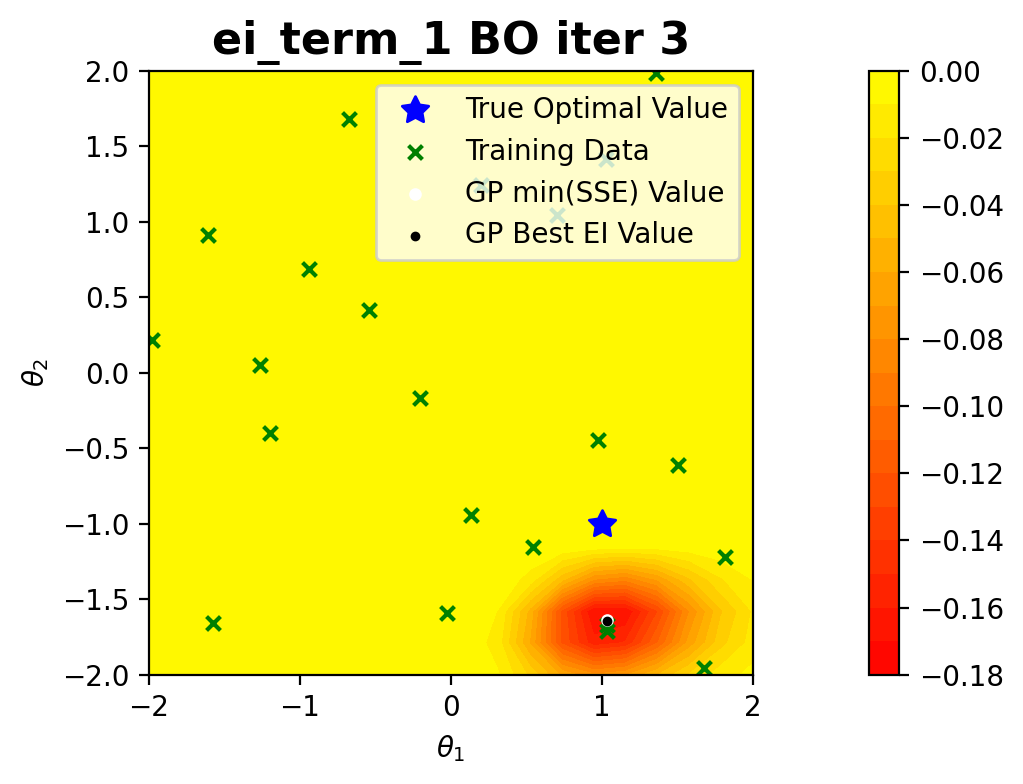

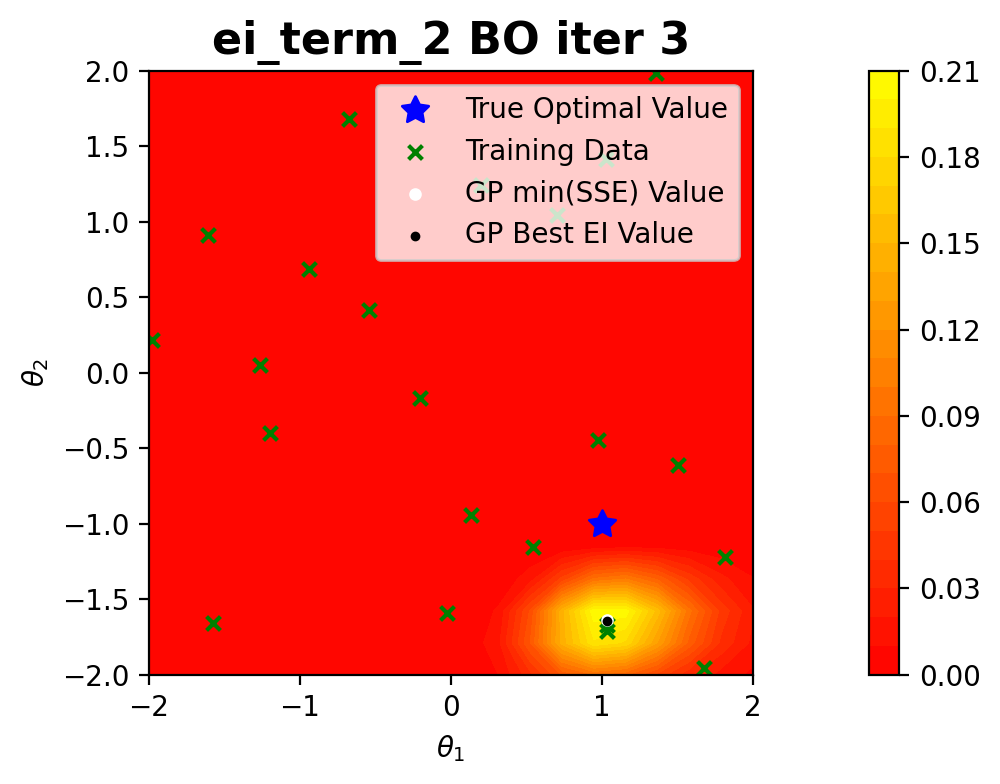

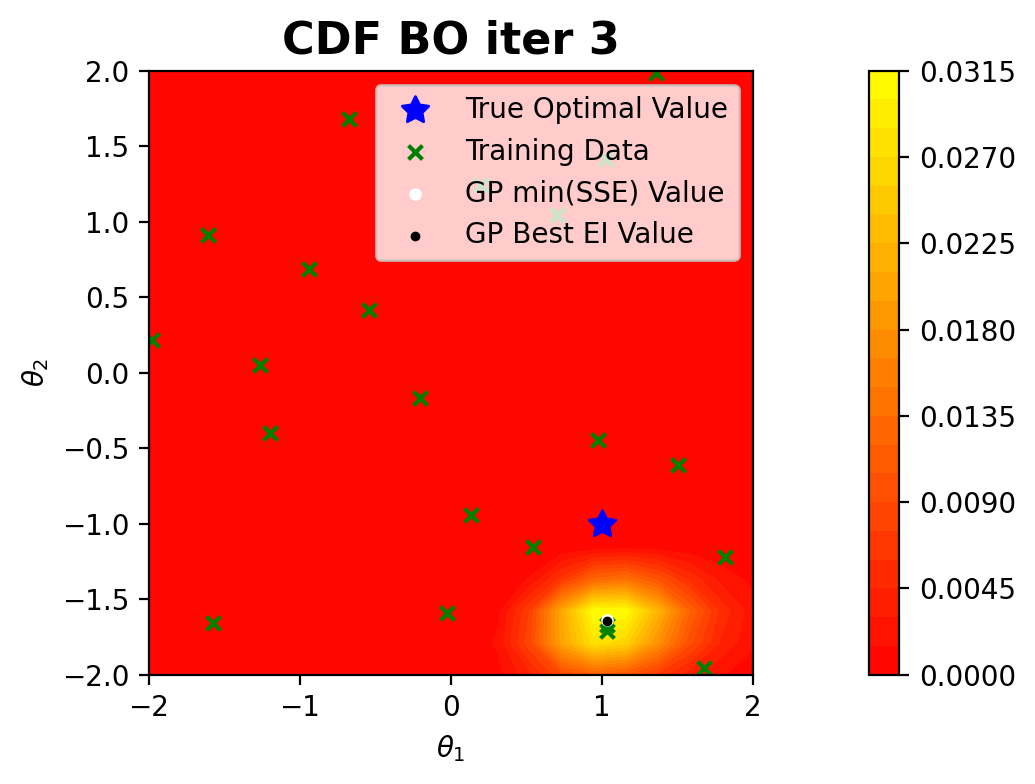

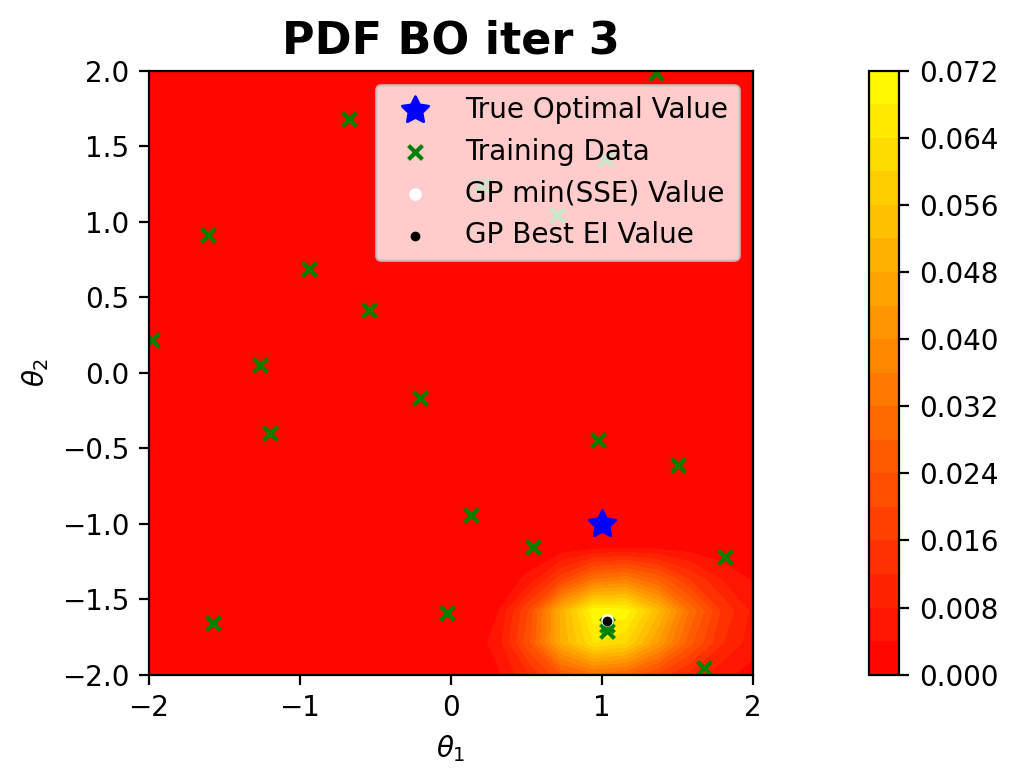

Magnitude of ln(SSE) given Theta_Opt =  [ 1.03405005 -1.63552943] is 2.6104e+00


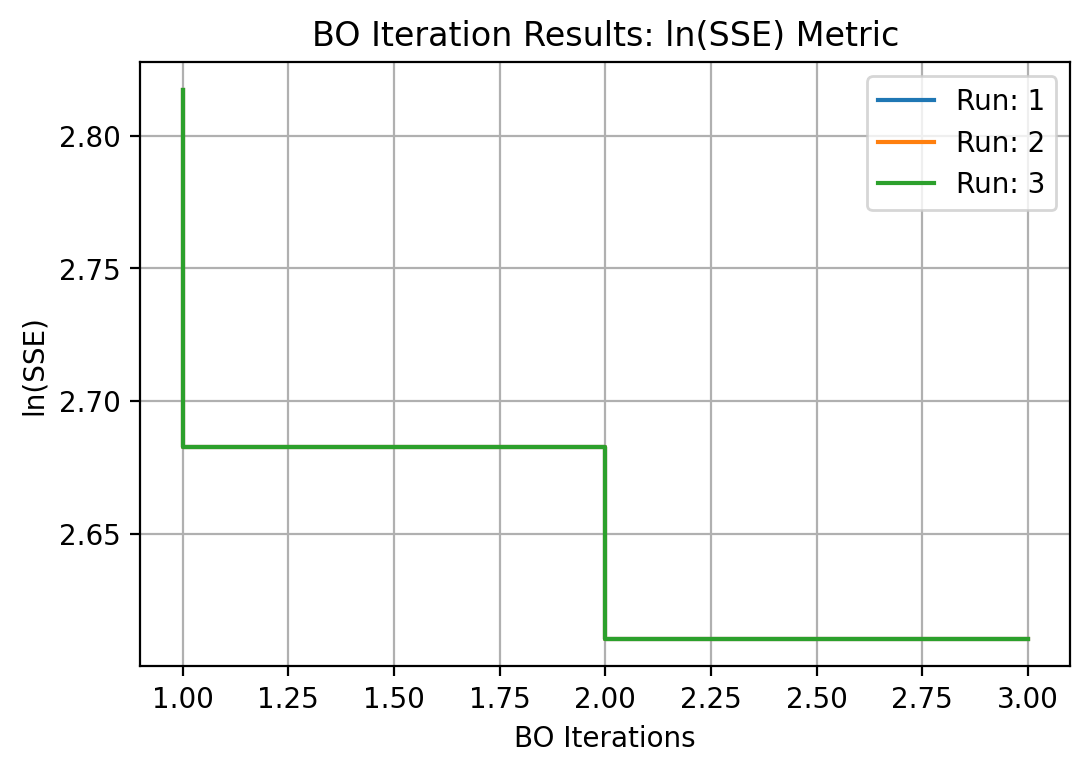

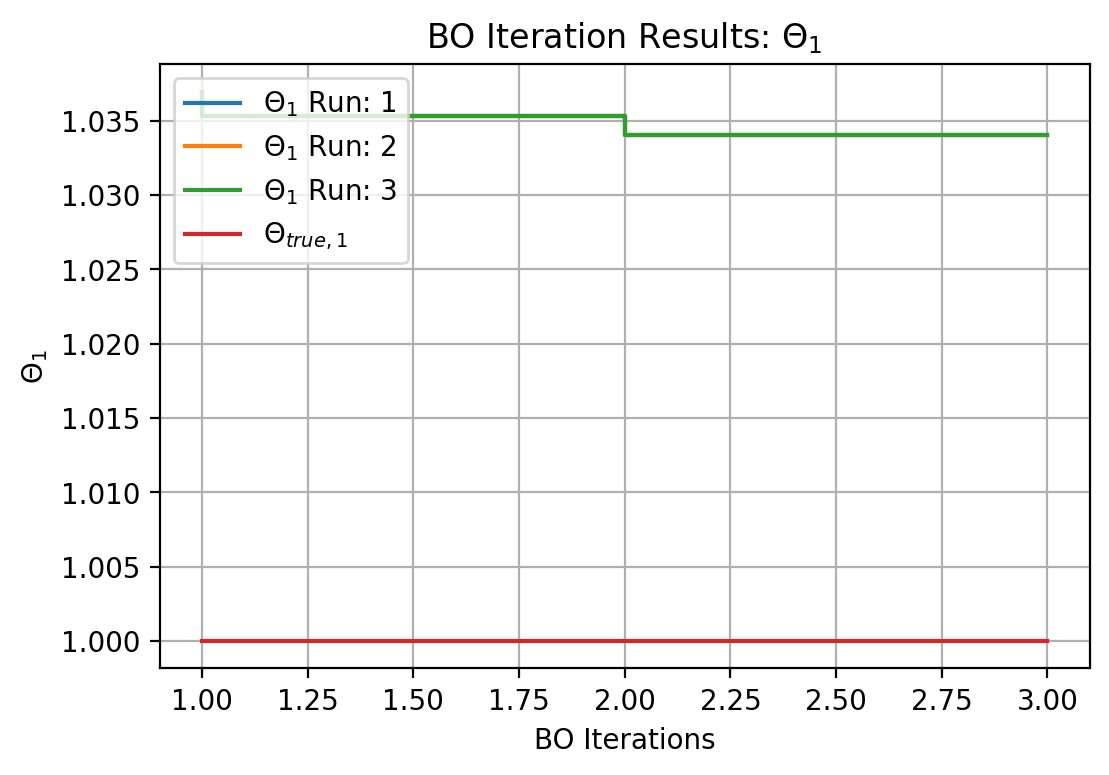

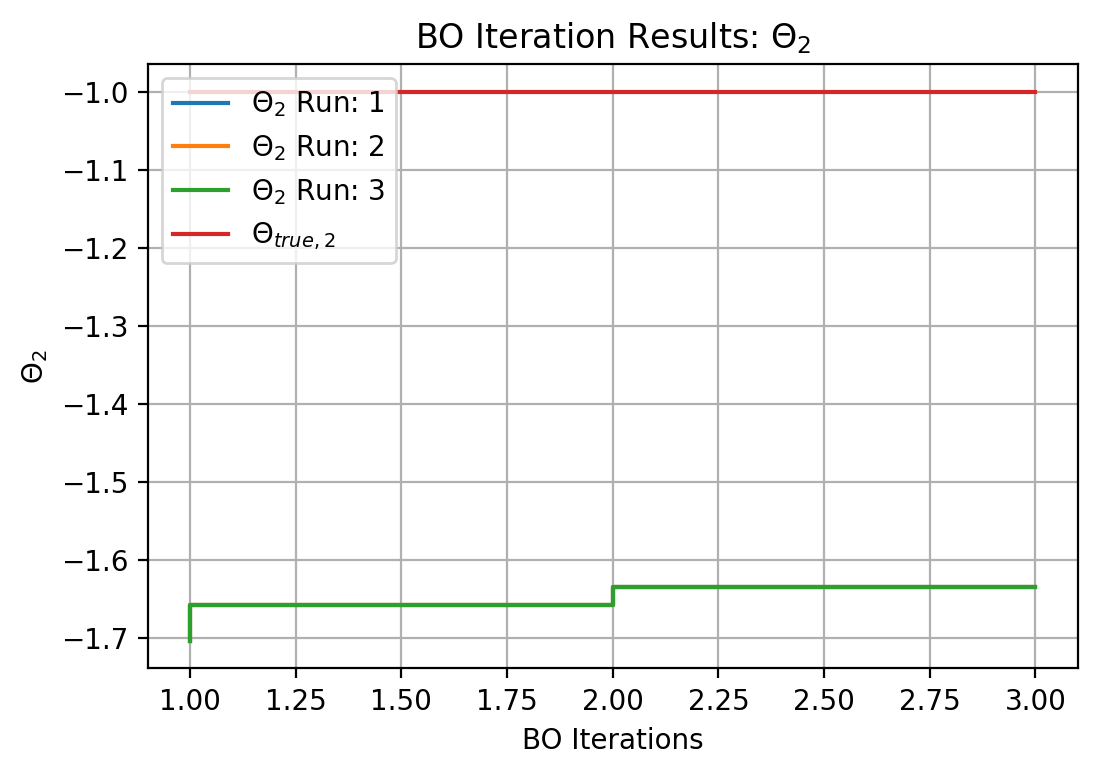

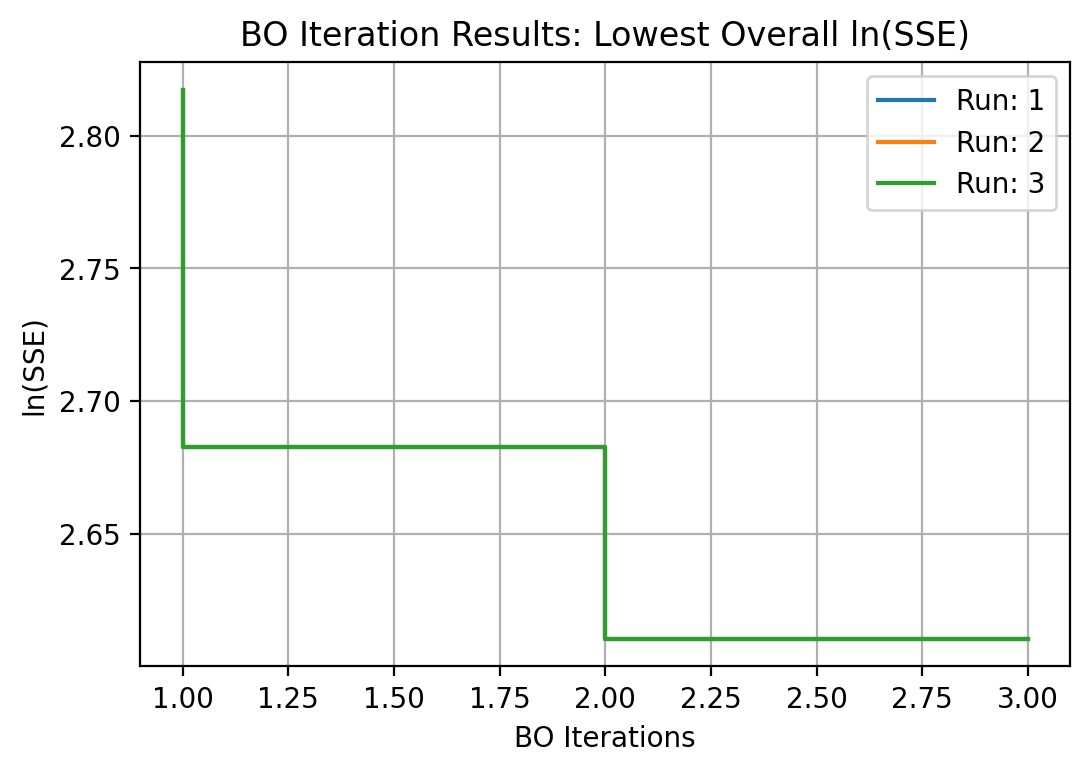

The GP predicts the lowest SSE of 1.360e+01 occurs at θ = [ 1.03404982 -1.63552934] during Run 1 at BO iteration 3
At this point, the highest EI occurs at θ = [ 1.03359819 -1.64635028]
CPU times: user 40 s, sys: 383 ms, total: 40.4 s
Wall time: 40.5 s


In [5]:
%%time

obj = "obj"        
t = 20
all_data_doc = find_train_doc_path(emulator, obj, t)
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=",")) 

print("Runs:", runs)
print("BO Iters:",BO_iters)
print("------------------------------")
for i in range(len(set_lengthscale)):
    for j in range(len(explore_bias)):
        print("Lengthscale Set To:", set_lengthscale)
        print("Explore Bias:", explore_bias[j])
        results = bo_iter_w_runs(BO_iters,all_data_doc,t,theta_mesh,Theta_True,train_iter,explore_bias[j], Xexp, Yexp,
                                     noise_std, obj, runs, sparse_grid, emulator, set_lengthscale[i], verbose,save_fig, 
                                     shuffle_seed)
        print("The GP predicts the lowest SSE of", "{:.3e}".format(np.exp(results[3])), "occurs at \u03B8 =", results[2][0], 
              "during Run", results[1], "at BO iteration", results[0])
        print("At this point, the highest EI occurs at \u03B8 =", results[4][0])